In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df_sweep_astro = pd.read_csv('results/final/final_astropy.csv')

In [4]:
df_sweep_laptrack = pd.read_csv('results/final/final_laptrack.csv')

## Make a heat map with the parameter tested 

In [25]:
df_heat = df_sweep_laptrack.copy()
for l,i in enumerate(df_heat.iloc):
    c = i.param
    df_heat.loc[l,'mins'] = float(c[5:8])
    df_heat.loc[l,'maxs'] = int(c[14])
    df_heat.loc[l,'threshold'] = float(c[26:30])

df_heat

Unnamed: 0.1  Unnamed: 0  precision  negative_predicted_value  \
0               0           0        1.0                  0.000723   
1               1           1        1.0                  0.000837   
2               2           2        1.0                  0.000760   
3               3           3        1.0                  0.000904   
4               4           4        1.0                  0.000714   
..            ...         ...        ...                       ...   
995             5           5        0.0                  0.000000   
996             6           6        1.0                  0.000600   
997             7           7        1.0                  0.000687   
998             8           8        1.0                  0.000710   
999             9           9        1.0                  0.000818   

     sensitivity  specificity  accuracy                          param  mins  \
0       0.053425          1.0  0.054073  mins_0.4_maxs_2_threshold_0.1   0.4   
1       0.055380          1.0  0.056126  mins_0.4_maxs_2_threshold_0.1   0.4   
2       0.092541          1.0  0.093168  mins_0.4_maxs_2_threshold_0.1   0.4   
3       0.138737          1.0  0.139408  mins_0.4_maxs_2_threshold_0.1   0.4   
4       0.097938          1.0  0.098519  mins_0.4_maxs_2_threshold_0.1   0.4   
..           ...          ...       ...                            ...   ...   
995     0.000000          0.0  0.000000  mins_0.5_maxs_3_threshold_0.5   0.5   
996     0.001200          1.0  0.001799  mins_0.5_maxs_3_threshold_0.5   0.5   
997     0.001373          1.0  0.002058  mins_0.5_maxs_3_threshold_0.5   0.5   
998     0.002128          1.0  0.002835  mins_0.5_maxs_3_threshold_0.5   0.5   
999     0.001635          1.0  0.002451  mins_0.5_maxs_3_threshold_0.5   0.5   

     maxs  threshold  
0     2.0        0.1  
1     2.0        0.1  
2     2.0        0.1  
3     2.0        0.1  
4     2.0        0.1  
..    ...        ...  
995   3.0        0.5  
996   3.0        0.5  
997   3.0        0.5  
998   3.0        0.5  
999   3.0        0.5  

[1000 rows x 11 columns]

In [14]:
mins_thresh = []
mins_maxs = []
maxs_threshold =  []

# for i in set(df_heat.mins.values):
#     for j in set(df_heat.threshold.values):
#         mins_thresh.append([i,j,np.mean(df_heat.loc[(df_heat.mins == i) & (df_heat.threshold == j),'accuracy'])])

for i in set(df_heat.mins.values):
    for j in set(df_heat.maxs.values):
        for k in set(df_heat.threshold.values): 
                mins_maxs.append([k,i,j,np.mean(df_heat.loc[(df_heat.mins == i) & (df_heat.maxs == j) & (df_heat.threshold == k),'accuracy'])])

# for i in set(df_heat.maxs.values):
#     for j in set(df_heat.threshold.values):
#         maxs_threshold.append([i,j,np.mean(df_heat.loc[(df_heat.maxs == i) & (df_heat.threshold == j),'accuracy'])])


In [30]:
d = pd.DataFrame(mins_maxs)[pd.DataFrame(mins_maxs)[pd.DataFrame(mins_maxs).columns[0]] == 0.1].drop(columns=0)
d

1    2         3
0   0.4  1.0  0.093859
5   0.4  2.0  0.094431
10  0.4  3.0  0.079091
15  0.4  4.0  0.063946
20  0.6  1.0  0.788492
25  0.6  2.0  0.723997
30  0.6  3.0  0.530868
35  0.6  4.0  0.307152
40  0.8  1.0  0.916421
45  0.8  2.0  0.894878
50  0.8  3.0  0.880587
55  0.8  4.0  0.862204
60  0.5  1.0  0.492099
65  0.5  2.0  0.455654
70  0.5  3.0  0.443105
75  0.5  4.0  0.249724
80  0.7  1.0  0.812357
85  0.7  2.0  0.708364
90  0.7  3.0  0.637721
95  0.7  4.0  0.585331

In [264]:
# dataframes

# df_mins_thresh = pd.DataFrame(mins_thresh).pivot(index=0, columns=1,values=2)
# df_mins_thresh.columns.name = 'Absolute threshold' # 2item looped 
# df_mins_thresh.index.rename('mins',inplace=True) #1st item looped

df_mins_maxs = pd.DataFrame(mins_maxs).pivot(index=0, columns=1,values=2)
df_mins_maxs.columns.name = 'maxs'
df_mins_maxs.index.rename('mins',inplace=True)

# df_maxs_thresh = pd.DataFrame(maxs_threshold).pivot(index=0, columns=1,values=2)
# df_maxs_thresh.columns.name = 'Absolute threshold'
# df_maxs_thresh.index.rename('maxs',inplace=True)



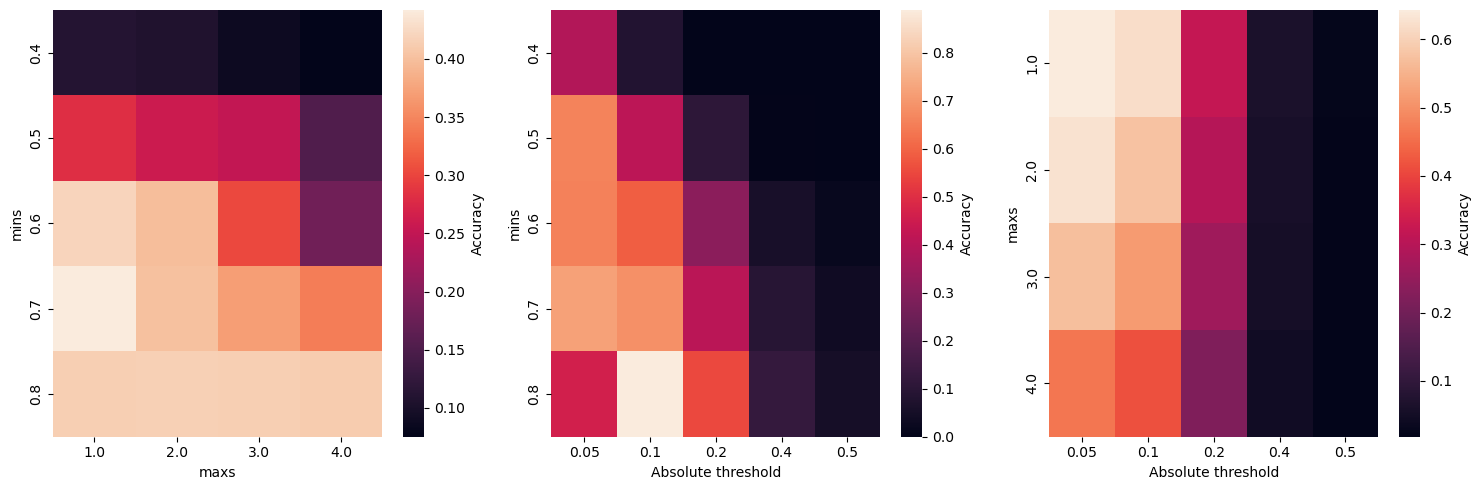

In [266]:
fig,ax = plt.subplots(1,3 , figsize=(15,5))

sns.heatmap(df_mins_maxs,ax=ax[0],cbar_kws={'label': 'Accuracy'})
sns.heatmap(df_mins_thresh,ax=ax[1],cbar_kws={'label': 'Accuracy'})
sns.heatmap(df_maxs_thresh,ax=ax[2],cbar_kws={'label': 'Accuracy'})

plt.tight_layout()
plt.show()

## Filter the best parameter set for 2D's heatmap

In [3]:
def plot_heatmap2D(df,col):
    mins_thresh = []
    mins_maxs = []
    maxs_threshold =  []

    # for i in set(df.mins.values):
    #     for j in set(df.threshold.values):
    #         mins_thresh.append([i,j,np.mean(df.loc[(df.mins == i) & (df.threshold == j),col])])

    for i in sorted(set(df.mins.values)):
        for j in sorted(set(df.maxs.values)):
            for k in sorted(set(df.threshold.values)): 
                mins_maxs.append([k,i,j,np.mean(df.loc[(df.mins == i) & (df.maxs == j) & (df.threshold == k),col])])

    # for i in set(df.maxs.values):
    #     for j in set(df.threshold.values):
    #         maxs_threshold.append([i,j,np.mean(df.loc[(df.maxs == i) & (df.threshold == j) & (df.mins == 0.7),col])])
    # dataframes

    # df_mins_thresh = pd.DataFrame(mins_thresh).pivot(index=0, columns=1,values=2)
    # df_mins_thresh.columns.name = 'Absolute threshold' # 2item looped 
    # df_mins_thresh.index.rename('mins',inplace=True) #1st item looped
    fig1,ax = plt.subplots(1,len(set(df.threshold.values)) , figsize=(100,5))

    for l,i in enumerate(sorted(set(df.threshold.values))):
        df_mins_maxs = pd.DataFrame(mins_maxs)[pd.DataFrame(mins_maxs)[pd.DataFrame(mins_maxs).columns[0]] == i].drop(columns=0).pivot(index=1, columns=2,values=3)
        df_mins_maxs.columns.name = 'maxs'
        df_mins_maxs.index.rename('mins',inplace=True)
        sns.heatmap(df_mins_maxs,ax=ax[l],vmin=0,vmax=1.,cbar_kws={'label': col},cmap='rocket_r',annot=True)
        ax[l].set_title(f'Threshold value : {i}')
    
    # fig.show()
    
    for i in sorted(set(df.maxs.values)):
        for j in sorted(set(df.threshold.values)):
            for k in sorted(set(df.mins.values)): 
                maxs_threshold.append([k,i,j,np.mean(df.loc[(df.mins == k) & (df.maxs == i) & (df.threshold == j),col])])

    fig2,ax = plt.subplots(1,len(set(df.mins.values)) , figsize=(100,5))

    for l,i in enumerate(sorted(set(df.mins.values))):
        df_maxs_threshold = pd.DataFrame(maxs_threshold)[pd.DataFrame(maxs_threshold)[pd.DataFrame(maxs_threshold).columns[0]] == i].drop(columns=0).pivot(index=1, columns=2,values=3)
        df_maxs_threshold.columns.name = 'threshold'
        df_maxs_threshold.index.rename('mins',inplace=True)
        sns.heatmap(df_maxs_threshold,ax=ax[l],vmin=0,vmax=1.,cbar_kws={'label': col},cmap='rocket_r',annot=True)
        ax[l].set_title(f'Minimum sigma value : {i}')
    
    # fig.show()  

    for i in sorted(set(df.mins.values)):
        for j in sorted(set(df.threshold.values)):
            for k in sorted(set(df.maxs.values)): 
                mins_thresh.append([k,i,j,np.mean(df.loc[(df.mins == i) & (df.maxs == k) & (df.threshold == j),col])])

    fig3,ax = plt.subplots(1,len(set(df.maxs.values)) , figsize=(100,5))
    for l,i in enumerate(sorted(set(df.maxs.values))):
        df_mins_threshold = pd.DataFrame(mins_thresh)[pd.DataFrame(mins_thresh)[pd.DataFrame(mins_thresh).columns[0]] == i].drop(columns=0).pivot(index=1, columns=2,values=3)
        df_mins_threshold.columns.name = 'threshold'
        df_mins_threshold.index.rename('mins',inplace=True)
        sns.heatmap(df_mins_threshold,ax=ax[l],vmin=0,vmax=1.,cbar_kws={'label': col},cmap='rocket_r',annot=True)
        ax[l].set_title(f'Maximum sigma value : {i}')
        
    
    for l,i in enumerate([fig1,fig2,fig3]):
        #i.savefig(f'../benchmark_spot_detection/results/plots/parameter_sweep_heatmaps_{l}.png',dpi=300)
        i.show()
    #fig.show()  

    # df_maxs_thresh = pd.DataFrame(maxs_threshold).pivot(index=0, columns=1,values=2)
    # df_maxs_thresh.columns.name = 'Absolute threshold'
    # df_maxs_thresh.index.rename('maxs',inplace=True)

    

    # sns.heatmap(df_mins_thresh,ax=ax[1],vmin=0,vmax=1.,cbar_kws={'label': col},cmap='rocket_r',annot=True)
    # sns.heatmap(df_maxs_thresh,ax=ax[2],vmin=0,vmax=1.,cbar_kws={'label': col},cmap='rocket_r',annot=True)

    plt.tight_layout()
    #plt.show()

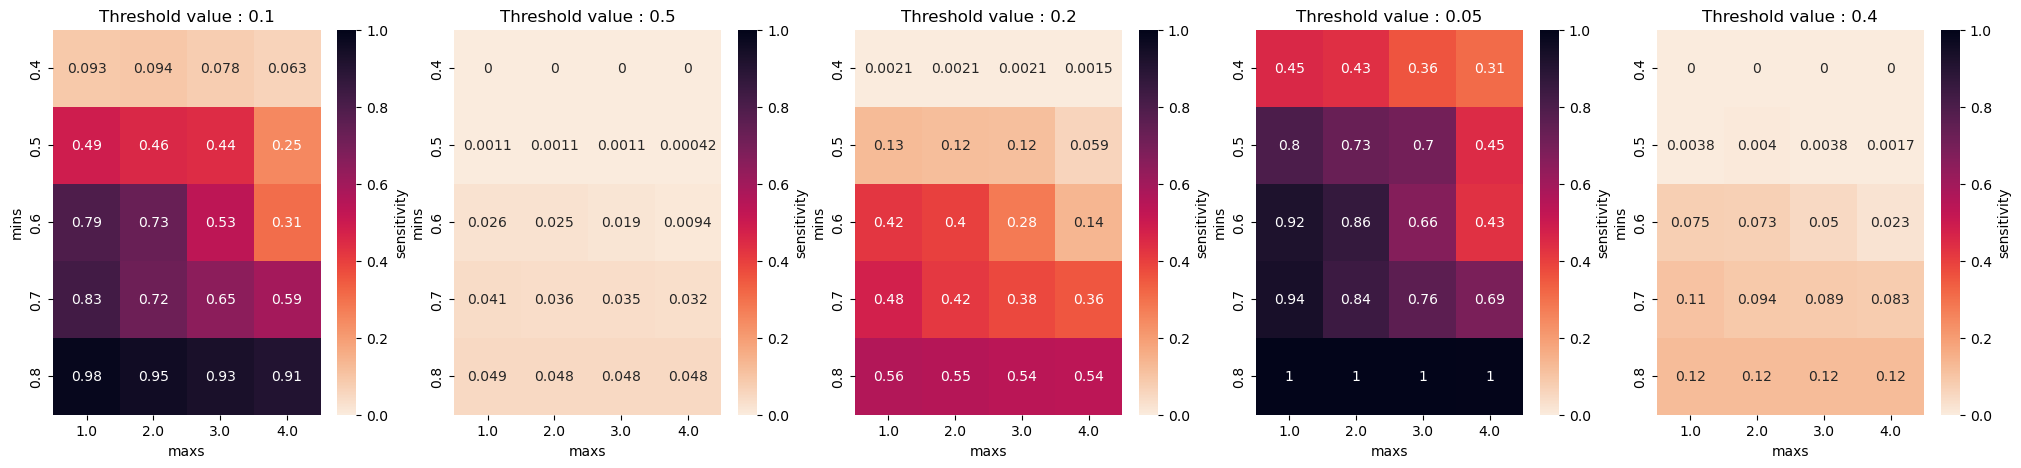

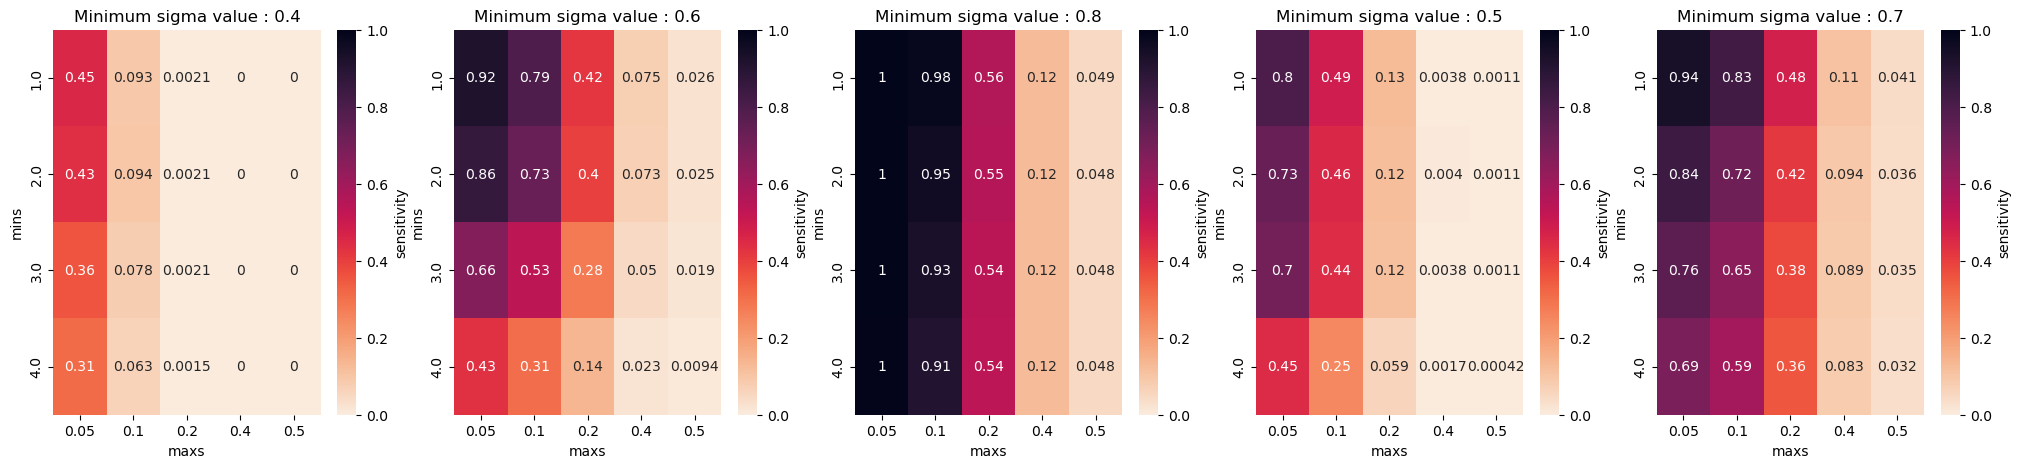

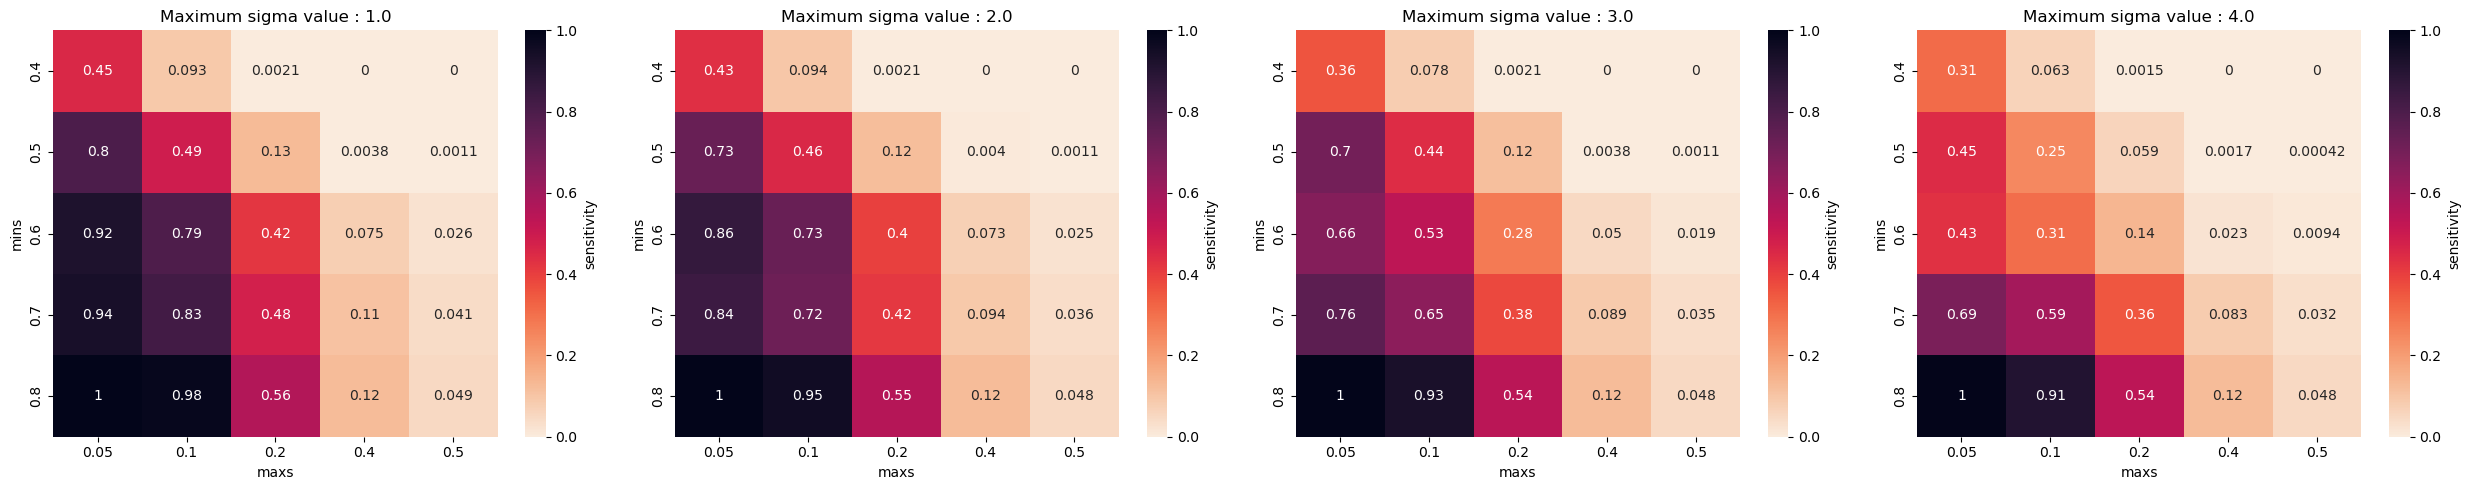

In [34]:
plot_heatmap2D(df_heat,'sensitivity')


## Plot the best heatmaps

In [4]:
def plot_heatmap(df,col,best_maxs,best_mins,best_tresh):
    fig,ax = plt.subplots(1,3,figsize=(25,10))
    mins_thresh = []
    mins_maxs = []
    maxs_threshold =  []

    for i in sorted(set(df.mins.values)):
        for j in sorted(set(df.threshold.values)):
            mins_thresh.append([i,j,np.mean(df.loc[(df.mins == i) & (df.threshold == j) & (df.maxs == best_maxs),col])])

    for i in sorted(set(df.mins.values)):
            for j in sorted(set(df.maxs.values)):
                mins_maxs.append([i,j,np.mean(df.loc[(df.mins == i) & (df.maxs == j)  & (df.threshold == best_tresh),col])])

    for i in sorted(set(df.maxs.values)):
        for j in sorted(set(df.threshold.values)):
            maxs_threshold.append([i,j,np.mean(df.loc[(df.maxs == i) & (df.threshold == j) & (df.mins == best_mins),col])])
    
    # dataframes

    df_mins_thresh = pd.DataFrame(mins_thresh).pivot(index=0, columns=1,values=2)
    df_mins_thresh.columns.name = 'Absolute threshold' # 2item looped 
    df_mins_thresh.index.rename('Minimum sigma',inplace=True) #1st item looped

    df_maxs_thresh = pd.DataFrame(maxs_threshold).pivot(index=0, columns=1,values=2)
    df_maxs_thresh.columns.name = 'Absolute threshold'
    df_maxs_thresh.index.rename('Maximum sigma',inplace=True)

    df_maxs_mins = pd.DataFrame(mins_maxs).pivot(index=0, columns=1,values=2)
    df_maxs_mins.columns.name = 'Maximum sigma'
    df_maxs_mins.index.rename('Minimum sigma',inplace=True)

    title = [f'Mimimum sigma - threshold \n fixed maximum sigma : {best_maxs} ',f'Maximum sigma- threshold \n fixed minimum sigma : {best_mins} ',f'Minimum sigma - maximum sigma \n fixed relative threshold : {best_tresh}']
    for l,i in enumerate([df_mins_thresh,df_maxs_thresh,df_maxs_mins]):
        sns.heatmap(i,ax=ax[l],vmin=0,vmax=1.,cbar_kws={'label': col},cmap='rocket_r',annot=True)
        ax[l].set_title(title[l])
    
    fig.suptitle('Heatmaps of the swept parameters')
    plt.tight_layout()




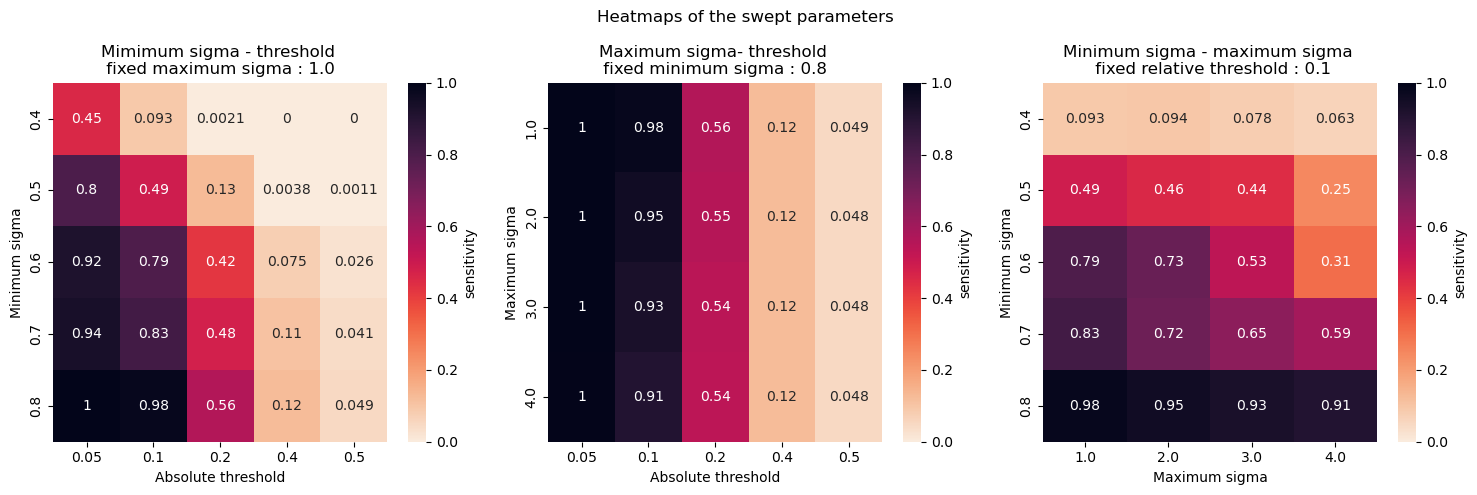

In [40]:
plot_heatmap(df_heat,'sensitivity',best_maxs=1.,best_mins=0.8,best_tresh=0.1)
#plt.savefig('../benchmark_spot_detection/results/plots/parameter_sweep_heatmaps_combined.png')

## Image normalization parameter sweep

In [62]:
df_sweep_laptrack_norm = pd.read_csv('results/final/normalized/final_laptrack.csv')
df_sweep_laptrack_norm['Unnamed: 0'] = [0,9]*400
df_sweep_laptrack_norm['Unnamed: 0.1'] = [1,1,3,3,5,5,7,7,9,9] * int(len(df_sweep_laptrack_norm.index)/len([0,0,3,3,5,5,7,7,9,9]))
df_sweep_laptrack_norm.rename(columns={'Unnamed: 0':'Frame','Unnamed: 0.1':'Image'},inplace=True)

df_heat_norm = df_sweep_laptrack_norm.copy()
for l,i in enumerate(df_heat_norm.iloc):
    c = i.param
    df_heat_norm.loc[l,'mins'] = float(c[5:9].replace('_','0'))
    df_heat_norm.loc[l,'maxs'] = float(c[14:19].replace('_','0').replace('t','0'))
    df_heat_norm.loc[l,'threshold'] = float(c[29:34].replace('_','0'))

df_heat_norm

Image  Frame  precision  negative_predicted_value  sensitivity  \
0        1      0   0.000000                  0.000000     0.000000   
1        1      9   0.000000                  0.000000     0.000000   
2        3      0   0.000000                  0.000000     0.000000   
3        3      9   0.000000                  0.000000     0.000000   
4        5      0   0.000000                  0.000000     0.000000   
..     ...    ...        ...                       ...          ...   
795      5      9   0.996279                  0.003984     0.810749   
796      7      0   0.883204                  0.012500     0.952609   
797      7      9   1.000000                  0.000874     0.215511   
798      9      0   1.000000                  0.002242     0.684397   
799      9      9   1.000000                  0.001025     0.202780   

     specificity  accuracy                              param  mins  maxs  \
0       0.000000  0.000000  mins_1.05_maxs_1.4_threshold_0.75  1.05  1.40   
1       0.000000  0.000000  mins_1.05_maxs_1.4_threshold_0.75  1.05  1.40   
2       0.000000  0.000000  mins_1.05_maxs_1.4_threshold_0.75  1.05  1.40   
3       0.000000  0.000000  mins_1.05_maxs_1.4_threshold_0.75  1.05  1.40   
4       0.000000  0.000000  mins_1.05_maxs_1.4_threshold_0.75  1.05  1.40   
..           ...       ...                                ...   ...   ...   
795     0.200000  0.808446  mins_1.1_maxs_1.45_threshold_0.85  1.10  1.45   
796     0.004739  0.846113  mins_1.1_maxs_1.45_threshold_0.85  1.10  1.45   
797     1.000000  0.216049  mins_1.1_maxs_1.45_threshold_0.85  1.10  1.45   
798     1.000000  0.684621  mins_1.1_maxs_1.45_threshold_0.85  1.10  1.45   
799     1.000000  0.203431  mins_1.1_maxs_1.45_threshold_0.85  1.10  1.45   

     threshold  
0         0.75  
1         0.75  
2         0.75  
3         0.75  
4         0.75  
..         ...  
795       0.85  
796       0.85  
797       0.85  
798       0.85  
799       0.85  

[800 rows x 11 columns]

<AxesSubplot: >

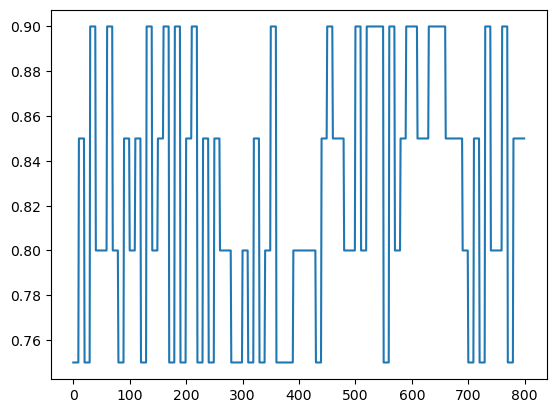

In [53]:
df_heat_norm.threshold.plot()

In [31]:
print(c)
print(c[14:18])

mins_1.1_maxs_1.45_threshold_0.85
1.45


(0.8, 1.05)

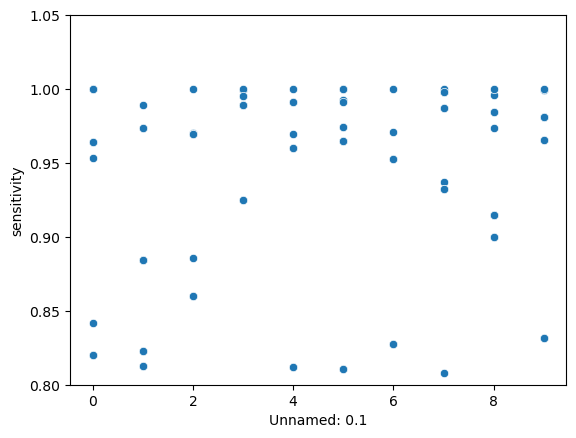

In [6]:
sns.scatterplot(data=df_heat_norm,x='Unnamed: 0.1',y='sensitivity')
plt.ylim(0.8,1.05)

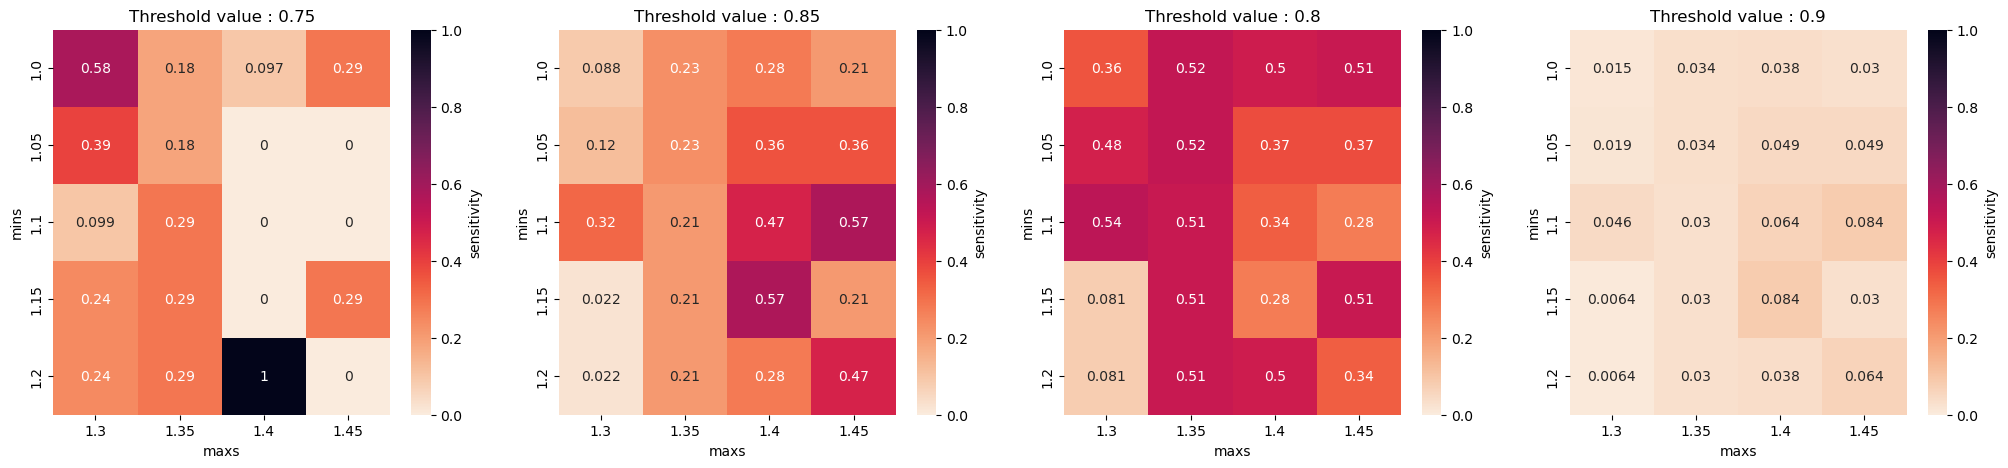

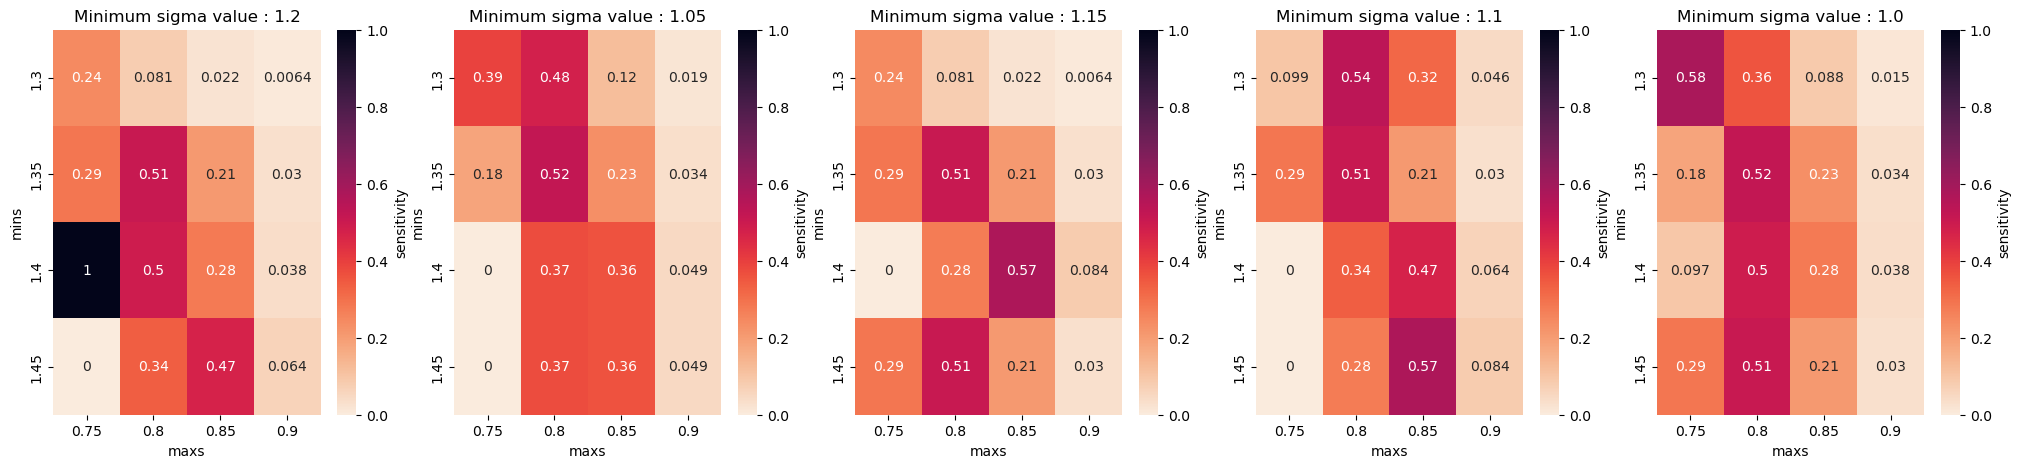

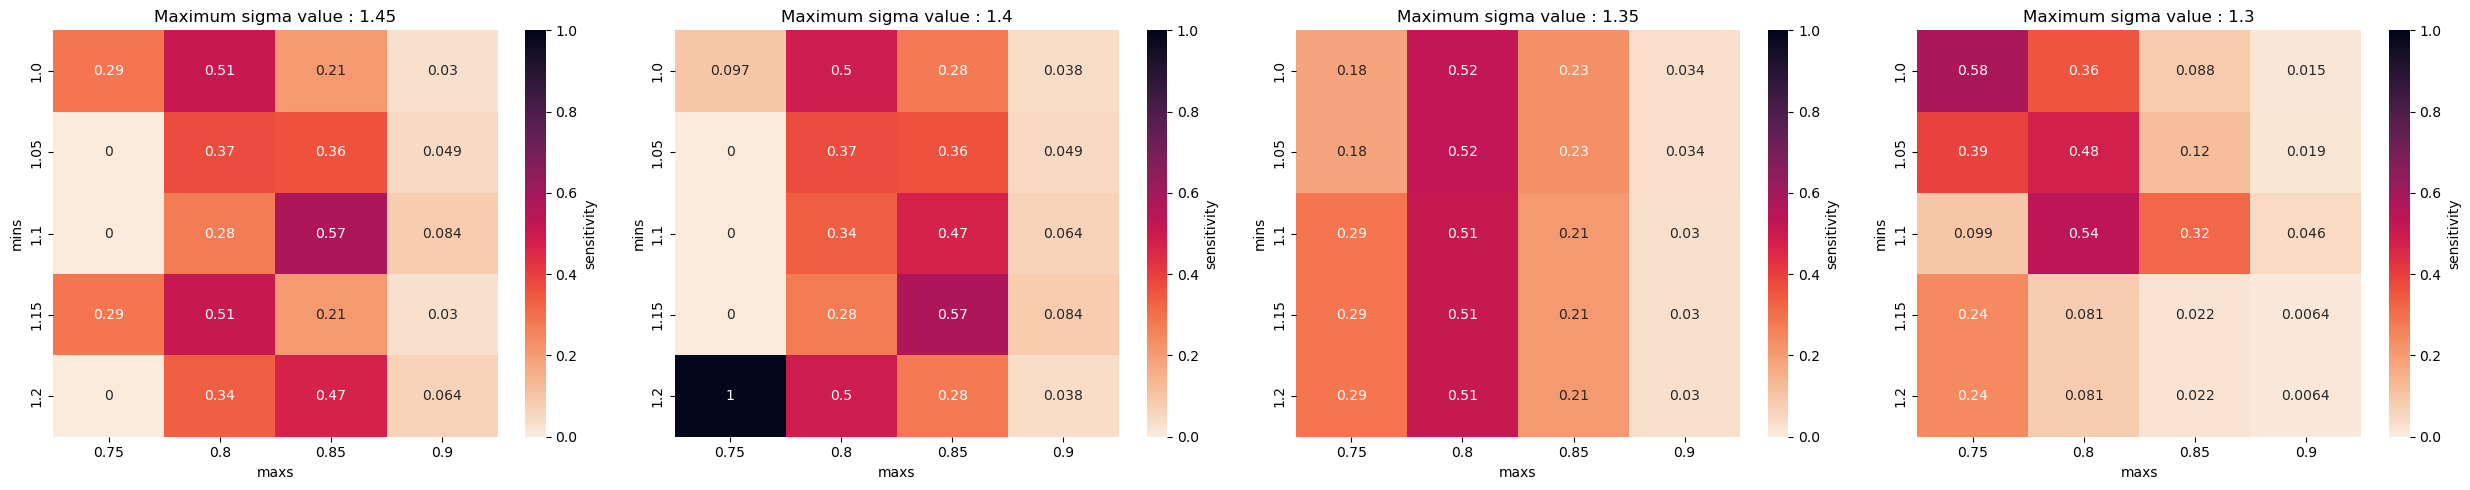

In [54]:
plot_heatmap2D(df_heat_norm,'sensitivity')

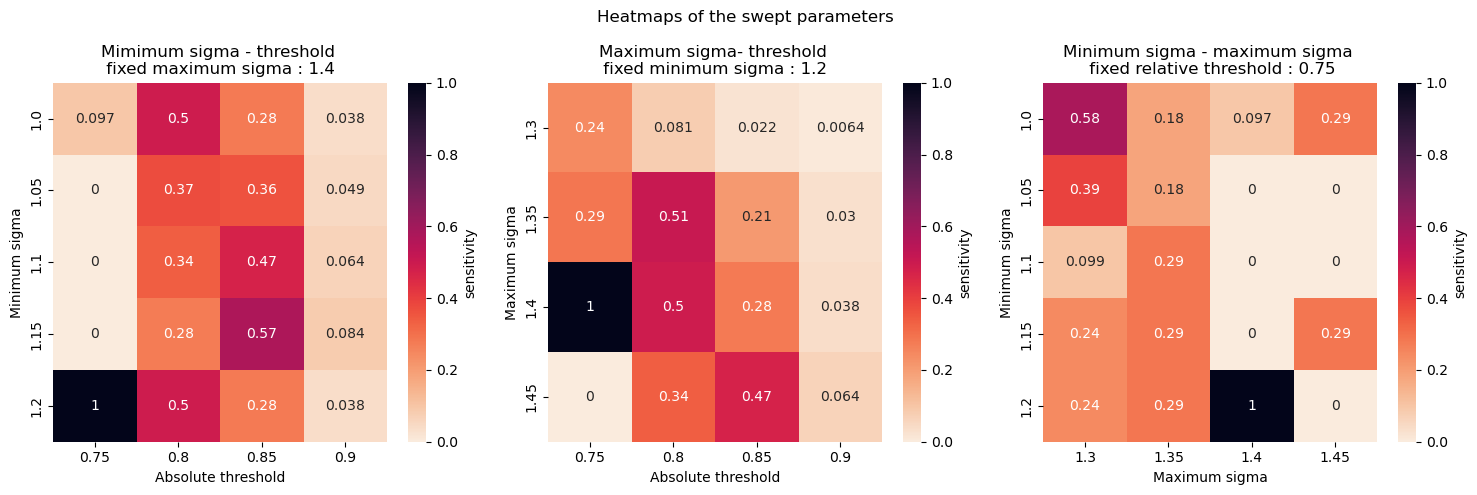

In [57]:
plot_heatmap(df_heat_norm,'sensitivity',best_tresh=0.75,best_maxs=1.4,best_mins=1.2)

In [78]:
df_heat_norm['ranking'] = df_heat_norm['precision'].rank(method='first',ascending=False)
df_heat_norm = df_heat_norm.sort_values(by='ranking')
# df_heat_norm

# Get the 4 top parameters 

param = df_heat_norm.iloc[0].param

best_params = [df_heat_norm.iloc[0].param] #list of the best params

for i in df_heat_norm.iloc:
    if i.param not in best_params :
        best_params.append(i.param)
        if len(best_params) > 4: # check that you only take 4
            break                                                    

df_best_params = pd.DataFrame()

for l,i in enumerate(best_params):
    df = df_heat_norm[df_heat_norm.param == i]
    df.loc[:,'top'] = l+1
    df_best_params = pd.concat([df_best_params,df])

df_best_params.reset_index(inplace=True,drop=True)
df_best_params

/scratch/louaness/ipykernel_309933/1289418159.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_309933/1289418159.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_309933/1289418159.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Image  Frame  precision  negative_predicted_value  sensitivity  \
0       1      0   1.000000                  0.000791     0.134932   
1       1      9   1.000000                  0.000830     0.047468   
2       3      0   1.000000                  0.000825     0.163674   
3       3      9   1.000000                  0.001595     0.512081   
4       5      0   1.000000                  0.001712     0.624356   
5       5      9   1.000000                  0.001212     0.376230   
6       7      0   1.000000                  0.001157     0.482304   
7       7      9   1.000000                  0.000739     0.072066   
8       9      0   1.000000                  0.000980     0.277305   
9       9      9   1.000000                  0.000892     0.084219   
10      1      9   1.000000                  0.001280     0.382911   
11      9      9   1.000000                  0.002445     0.666394   
12      7      9   0.986272                  0.010753     0.936857   
13      1      0   0.964657                  0.014493     0.953425   
14      3      0   0.940428                  0.022727     0.970304   
15      3      9   0.000000                  0.000000     0.000000   
16      5      0   0.000000                  0.000000     0.000000   
17      5      9   0.000000                  0.000000     0.000000   
18      7      0   0.000000                  0.000000     0.000000   
19      9      0   0.000000                  0.000000     0.000000   
20      1      0   1.000000                  0.000694     0.013699   
21      1      9   1.000000                  0.000795     0.005538   
22      3      0   1.000000                  0.000701     0.015193   
23      3      9   1.000000                  0.000873     0.108340   
24      5      0   1.000000                  0.000708     0.090206   
25      5      9   1.000000                  0.000796     0.049962   
26      7      0   1.000000                  0.000628     0.045591   
27      7      9   1.000000                  0.000690     0.005491   
28      9      0   1.000000                  0.000734     0.034043   
29      9      9   1.000000                  0.000826     0.011447   
30      1      9   1.000000                  0.001018     0.223892   
31      3      0   1.000000                  0.001976     0.651243   
32      7      9   1.000000                  0.001124     0.389842   
33      9      9   1.000000                  0.001221     0.331153   
34      1      0   0.998885                  0.001770     0.613699   
35      9      0   0.965569                  0.008264     0.914894   
36      5      9   0.888502                  0.021277     0.965178   
37      3      9   0.761705                  0.066667     0.989088   
38      5      0   0.000000                  0.000000     0.000000   
39      7      0   0.000000                  0.000000     0.000000   
40      1      0   1.000000                  0.000693     0.011644   
41      1      9   1.000000                  0.000794     0.004747   
42      3      0   1.000000                  0.000699     0.012431   
43      3      9   1.000000                  0.000849     0.082619   
44      5      0   1.000000                  0.000692     0.068943   
45      5      9   1.000000                  0.000789     0.040878   
46      7      0   1.000000                  0.000620     0.032993   
47      7      9   1.000000                  0.000689     0.004804   
48      9      0   1.000000                  0.000730     0.029078   
49      9      9   1.000000                  0.000823     0.007359   

    specificity  accuracy                              param  mins  maxs  \
0      1.000000  0.135524   mins_1.0_maxs_1.4_threshold_0.85  1.00  1.40   
1      1.000000  0.048221   mins_1.0_maxs_1.4_threshold_0.85  1.00  1.40   
2      1.000000  0.164251   mins_1.0_maxs_1.4_threshold_0.85  1.00  1.40   
3      1.000000  0.512461   mins_1.0_maxs_1.4_threshold_0.85  1.00  1.40   
4      1.000000  0.624598   mins_1.0_maxs_1.4_thresho

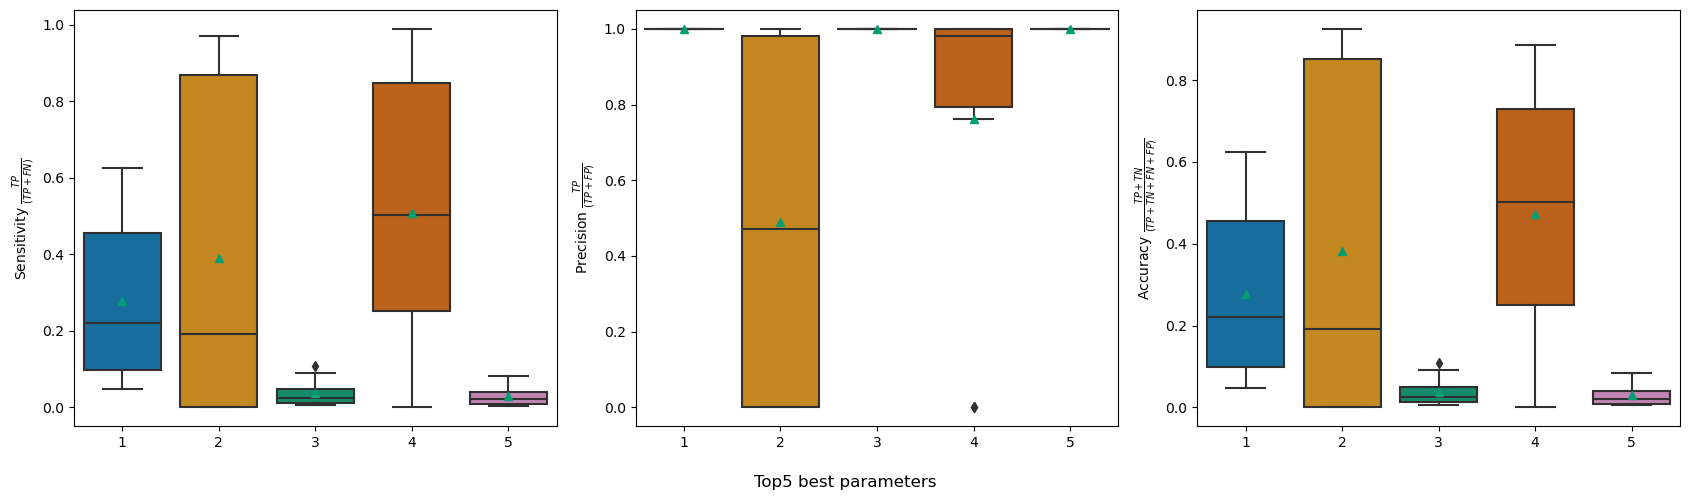

In [69]:
fig,ax = plt.subplots(1,3,figsize=(17,5))
sns.set_palette('colorblind')

sns.boxplot(data=df_best_params,x='top',y='sensitivity',showmeans=True,ax= ax[0])
sns.boxplot(data=df_best_params,x='top',y='precision',showmeans=True,ax= ax[1])
sns.boxplot(data=df_best_params,x='top',y='accuracy',showmeans=True,ax= ax[2])
ax[0].set_ylabel(r'Sensitivity $\frac{TP}{(TP+FN)}$')
ax[1].set_ylabel(r'Precision $\frac{TP}{(TP+FP)}$')
ax[2].set_ylabel(r'Accuracy $\frac{TP+TN}{(TP+TN+FN+FP)}$')
fig.supxlabel('Top5 best parameters')
for ax in ax:
    ax.set_xlabel('')

plt.tight_layout()
#plt.savefig('results/plots/laptrack_top5_params.png',dpi=300)
plt.show()

## V3 using above results

In [77]:
df_sweep_laptrack_norm_bis = pd.read_csv('results/final/normalized/v2/final_laptrack.csv')
df_sweep_laptrack_norm_bis['Unnamed: 0'] = [0,9]*500
df_sweep_laptrack_norm_bis['Unnamed: 0.1'] = [1,1,3,3,5,5,7,7,9,9] * int(len(df_sweep_laptrack_norm_bis.index)/len([0,0,3,3,5,5,7,7,9,9]))
df_sweep_laptrack_norm_bis.rename(columns={'Unnamed: 0':'Frame','Unnamed: 0.1':'Image'},inplace=True)

df_heat_norm_bis = df_sweep_laptrack_norm_bis.copy()
for l,i in enumerate(df_heat_norm_bis.iloc):
    c = i.param
    df_heat_norm_bis.loc[l,'mins'] = float(c[5:9].replace('_','0'))
    df_heat_norm_bis.loc[l,'maxs'] = float(c[14:19].replace('_','0').replace('t','0').replace('s','0'))
    df_heat_norm_bis.loc[l,'threshold'] = float(c[29:34].replace('_','0').replace('d','0'))

df_heat_norm_bis

Image  Frame  precision  negative_predicted_value  sensitivity  \
0        1      0        0.0                       0.0          0.0   
1        1      9        0.0                       0.0          0.0   
2        3      0        0.0                       0.0          0.0   
3        3      9        0.0                       0.0          0.0   
4        5      0        0.0                       0.0          0.0   
..     ...    ...        ...                       ...          ...   
995      5      9        0.0                       0.0          0.0   
996      7      0        0.0                       0.0          0.0   
997      7      9        0.0                       0.0          0.0   
998      9      0        0.0                       0.0          0.0   
999      9      9        0.0                       0.0          0.0   

     specificity  accuracy                                param  mins  maxs  \
0            0.0       0.0     mins_1.2_maxs_1.35_threshold_0.7  1.20  1.35   
1            0.0       0.0     mins_1.2_maxs_1.35_threshold_0.7  1.20  1.35   
2            0.0       0.0     mins_1.2_maxs_1.35_threshold_0.7  1.20  1.35   
3            0.0       0.0     mins_1.2_maxs_1.35_threshold_0.7  1.20  1.35   
4            0.0       0.0     mins_1.2_maxs_1.35_threshold_0.7  1.20  1.35   
..           ...       ...                                  ...   ...   ...   
995          0.0       0.0  mins_1.25_maxs_1.45_threshold_0.725  1.25  1.45   
996          0.0       0.0  mins_1.25_maxs_1.45_threshold_0.725  1.25  1.45   
997          0.0       0.0  mins_1.25_maxs_1.45_threshold_0.725  1.25  1.45   
998          0.0       0.0  mins_1.25_maxs_1.45_threshold_0.725  1.25  1.45   
999          0.0       0.0  mins_1.25_maxs_1.45_threshold_0.725  1.25  1.45   

     threshold  
0         0.70  
1         0.70  
2         0.70  
3         0.70  
4         0.70  
..         ...  
995       0.72  
996       0.72  
997       0.72  
998       0.72  
999       0.72  

[1000 rows x 11 columns]

In [79]:
df_heat_norm_bis['ranking'] = df_heat_norm_bis['precision'].rank(method='first',ascending=False)
df_heat_norm_bis = df_heat_norm_bis.sort_values(by='ranking')
# df_heat_norm

# Get the 4 top parameters 

param = df_heat_norm_bis.iloc[0].param

best_params = [df_heat_norm_bis.iloc[0].param] #list of the best params

for i in df_heat_norm_bis.iloc:
    if i.param not in best_params :
        best_params.append(i.param)
        if len(best_params) > 4: # check that you only take 4
            break                                                    

df_best_params = pd.DataFrame()

for l,i in enumerate(best_params):
    df = df_heat_norm_bis[df_heat_norm_bis.param == i]
    df.loc[:,'top'] = l+1
    df_best_params = pd.concat([df_best_params,df])

df_best_params.reset_index(inplace=True,drop=True)
df_best_params

/scratch/louaness/ipykernel_309933/1800333799.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_309933/1800333799.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_309933/1800333799.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Image  Frame  precision  negative_predicted_value  sensitivity  \
0       1      0   1.000000                  0.001185     0.422603   
1       1      9   1.000000                  0.000959     0.175633   
2       3      0   1.000000                  0.001202     0.426105   
3       5      9   1.000000                  0.003195     0.763815   
4       7      9   1.000000                  0.000972     0.294441   
5       9      0   1.000000                  0.001976     0.641844   
6       9      9   1.000000                  0.001101     0.258381   
7       3      9   0.977234                  0.008000     0.903352   
8       7      0   0.946570                  0.009174     0.935213   
9       5      0   0.829508                  0.028571     0.978093   
10      1      9   1.000000                  0.001499     0.473101   
11      9      9   1.000000                  0.002427     0.663941   
12      7      9   0.998274                  0.003322     0.794097   
13      1      0   0.832066                  0.025641     0.973973   
14      3      0   0.773946                  0.028571     0.976519   
15      3      9   0.000000                  0.000000     0.000000   
16      5      0   0.000000                  0.000000     0.000000   
17      5      9   0.000000                  0.000000     0.000000   
18      7      0   0.000000                  0.000000     0.000000   
19      9      0   0.000000                  0.000000     0.000000   
20      1      9   1.000000                  0.001018     0.223892   
21      3      0   1.000000                  0.001976     0.651243   
22      7      9   1.000000                  0.001124     0.389842   
23      9      9   1.000000                  0.001221     0.331153   
24      1      0   0.998885                  0.001770     0.613699   
25      9      0   0.965569                  0.008264     0.914894   
26      5      9   0.888502                  0.021277     0.965178   
27      3      9   0.761705                  0.066667     0.989088   
28      5      0   0.000000                  0.000000     0.000000   
29      7      0   0.000000                  0.000000     0.000000   
30      1      9   1.000000                  0.001018     0.223892   
31      3      0   1.000000                  0.001976     0.651243   
32      7      9   1.000000                  0.001124     0.389842   
33      9      9   1.000000                  0.001221     0.331153   
34      1      0   0.998885                  0.001770     0.613699   
35      9      0   0.965569                  0.008264     0.914894   
36      5      9   0.888502                  0.021277     0.965178   
37      3      9   0.761705                  0.066667     0.989088   
38      5      0   0.000000                  0.000000     0.000000   
39      7      0   0.000000                  0.000000     0.000000   
40      1      9   1.000000                  0.001499     0.473101   
41      9      9   1.000000                  0.002427     0.663941   
42      7      9   0.998274                  0.003322     0.794097   
43      1      0   0.832066                  0.025641     0.973973   
44      3      0   0.773946                  0.028571     0.976519   
45      3      9   0.000000                  0.000000     0.000000   
46      5      0   0.000000                  0.000000     0.000000   
47      5      9   0.000000                  0.000000     0.000000   
48      7      0   0.000000                  0.000000     0.000000   
49      9      0   0.000000                  0.000000     0.000000   

    specificity  accuracy                                param  mins  maxs  \
0      1.000000  0.422998      mins_1.2_maxs_1.3_threshold_0.7  1.20  1.30   
1      1.000000  0.176285      mins_1.2_maxs_1.3_threshold_0.7  1.20  1.30   
2      1.000000  0.426501      mins_1.2_maxs_1.3_threshold_0.7  1.20  1.30   
3      1.000000  0.763994      mins_1.2_maxs_1.3_threshold_0.7  1.20  1.30   
4      1.000000  0.294925      mins_1.2_max

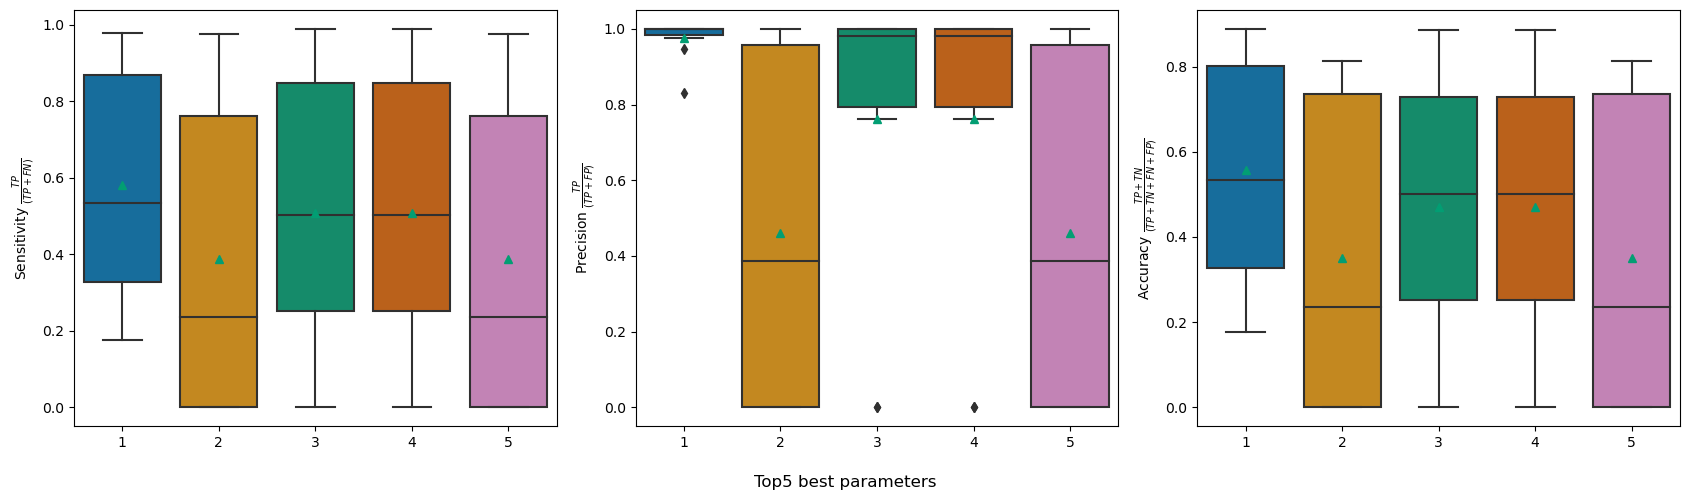

In [80]:
fig,ax = plt.subplots(1,3,figsize=(17,5))
sns.set_palette('colorblind')

sns.boxplot(data=df_best_params,x='top',y='sensitivity',showmeans=True,ax= ax[0])
sns.boxplot(data=df_best_params,x='top',y='precision',showmeans=True,ax= ax[1])
sns.boxplot(data=df_best_params,x='top',y='accuracy',showmeans=True,ax= ax[2])
ax[0].set_ylabel(r'Sensitivity $\frac{TP}{(TP+FN)}$')
ax[1].set_ylabel(r'Precision $\frac{TP}{(TP+FP)}$')
ax[2].set_ylabel(r'Accuracy $\frac{TP+TN}{(TP+TN+FN+FP)}$')
fig.supxlabel('Top5 best parameters')
for ax in ax:
    ax.set_xlabel('')

plt.tight_layout()
#plt.savefig('results/plots/laptrack_top5_params.png',dpi=300)
plt.show()

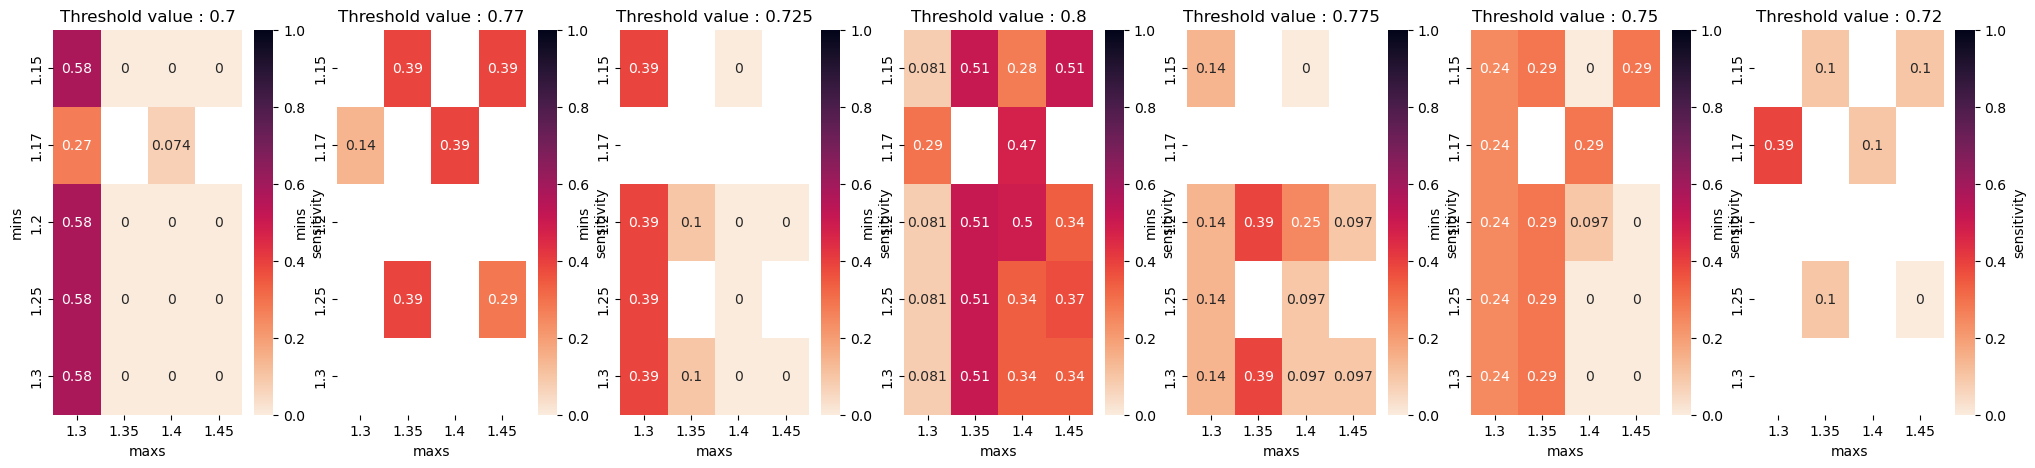

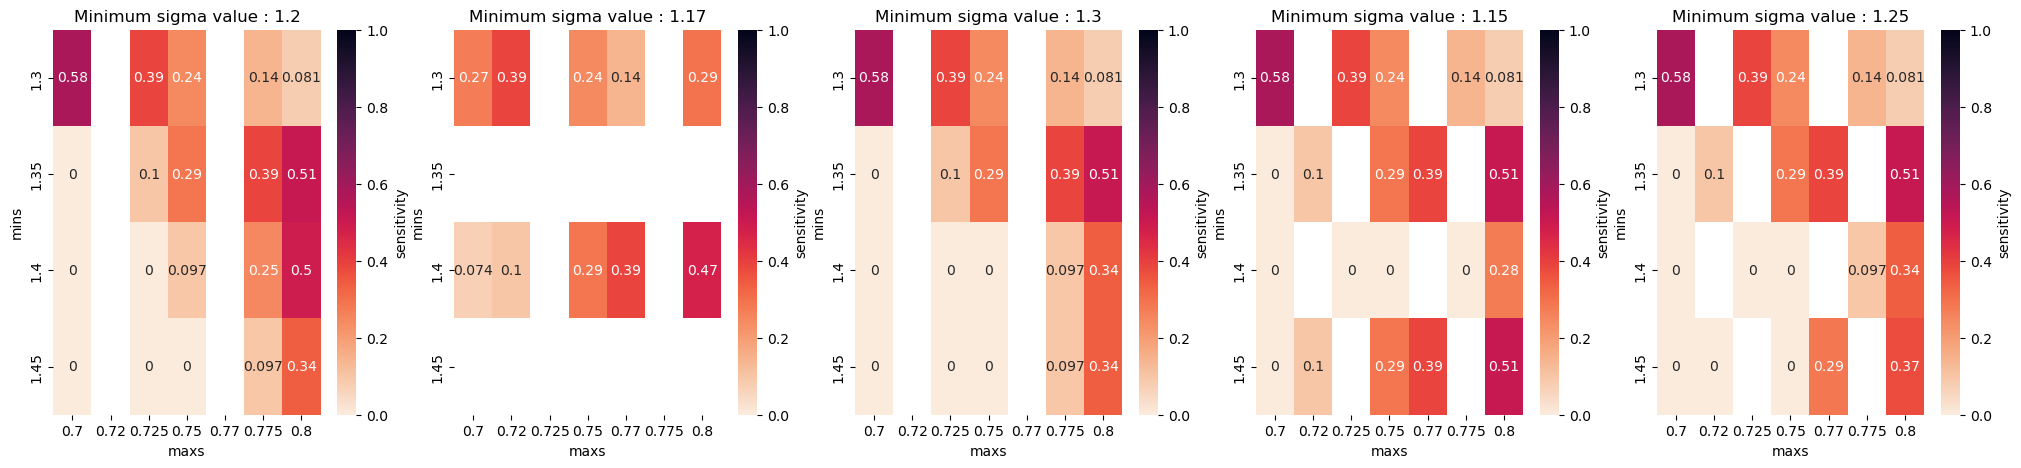

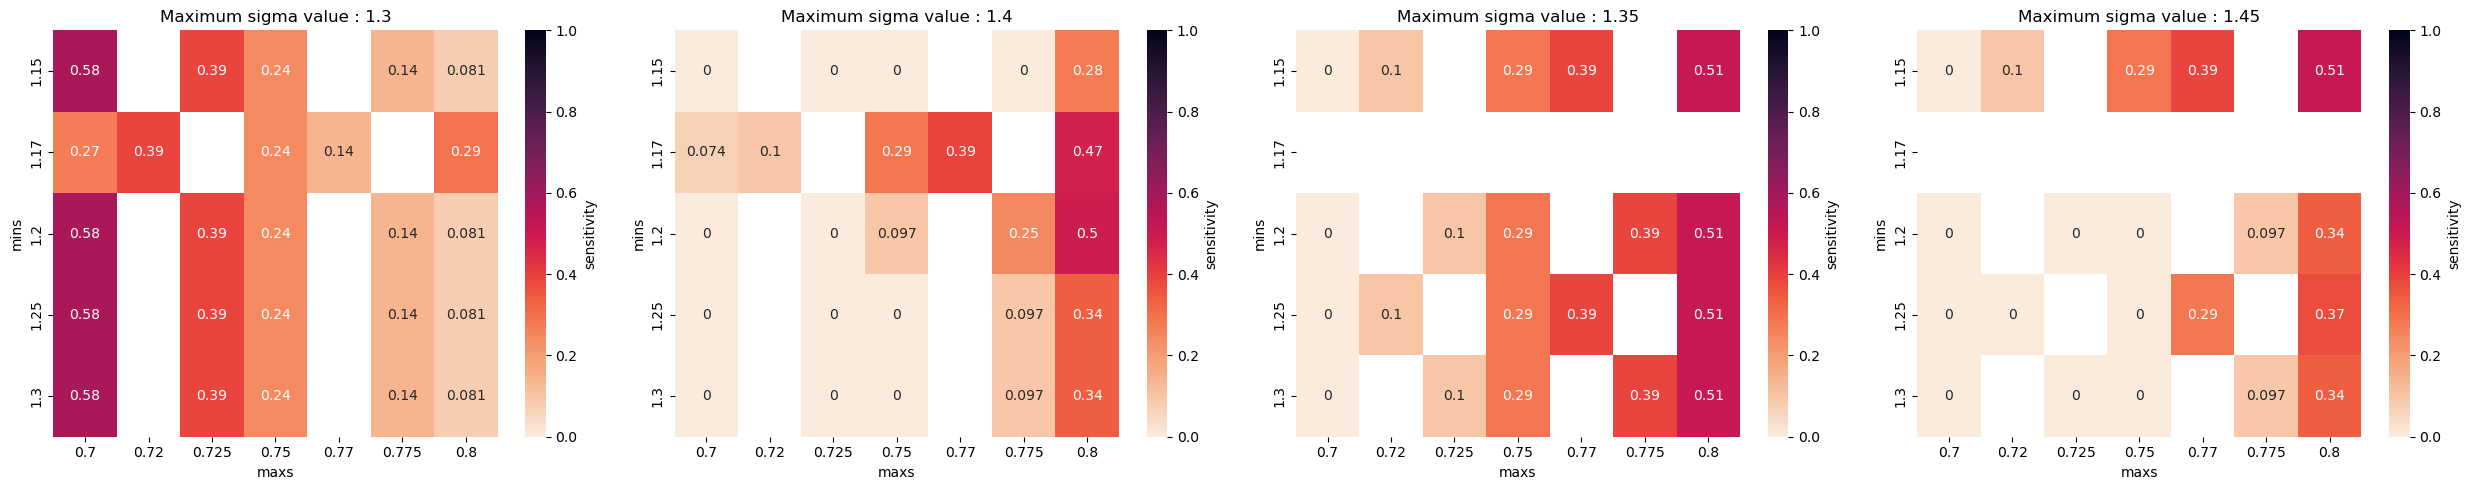

: 

In [81]:
plot_heatmap2D(df_heat_norm_bis,'sensitivity')

## Wider sweep

In [3]:
df_sweep_laptrack_norm_wide = pd.read_csv('results/final/normalized/large_sweep/final_laptrack.csv')
df_sweep_laptrack_norm_wide['Unnamed: 0'] = [0,9]*400
df_sweep_laptrack_norm_wide['Unnamed: 0.1'] = [1,1,3,3,5,5,7,7,9,9] * int(len(df_sweep_laptrack_norm_wide.index)/len([0,0,3,3,5,5,7,7,9,9]))
df_sweep_laptrack_norm_wide.rename(columns={'Unnamed: 0':'Frame','Unnamed: 0.1':'Image'},inplace=True)

df_heat_norm_wide = df_sweep_laptrack_norm_wide.copy()
for l,i in enumerate(df_heat_norm_wide.iloc):
    c = i.param
    df_heat_norm_wide.loc[l,'mins'] = float(c[5:9].replace('_','0'))
    df_heat_norm_wide.loc[l,'maxs'] = float(c[14:19].replace('_','0').replace('t','0').replace('s','0'))
    df_heat_norm_wide.loc[l,'threshold'] = float(c[29:34].replace('_','0').replace('d','0'))

df_heat_norm_wide

Image  Frame  precision  negative_predicted_value  sensitivity  \
0        1      0   1.000000                  0.000825     0.170548   
1        1      9   1.000000                  0.000826     0.042722   
2        3      0   1.000000                  0.000806     0.144337   
3        3      9   0.998387                  0.001504     0.482463   
4        5      0   1.000000                  0.000912     0.294459   
..     ...    ...        ...                       ...          ...   
795      5      9   0.000000                  0.000000     0.000000   
796      7      0   0.000000                  0.000000     0.000000   
797      7      9   0.000000                  0.000000     0.000000   
798      9      0   0.000000                  0.000000     0.000000   
799      9      9   0.000000                  0.000000     0.000000   

     specificity  accuracy                              param  mins  maxs  \
0            1.0  0.171116  mins_1.73_maxs_2.11_threshold_0.9  1.73  2.11   
1            1.0  0.043478  mins_1.73_maxs_2.11_threshold_0.9  1.73  2.11   
2            1.0  0.144928  mins_1.73_maxs_2.11_threshold_0.9  1.73  2.11   
3            0.5  0.482490  mins_1.73_maxs_2.11_threshold_0.9  1.73  2.11   
4            1.0  0.294913  mins_1.73_maxs_2.11_threshold_0.9  1.73  2.11   
..           ...       ...                                ...   ...   ...   
795          0.0  0.000000  mins_0.59_maxs_1.06_threshold_0.3  0.59  1.06   
796          0.0  0.000000  mins_0.59_maxs_1.06_threshold_0.3  0.59  1.06   
797          0.0  0.000000  mins_0.59_maxs_1.06_threshold_0.3  0.59  1.06   
798          0.0  0.000000  mins_0.59_maxs_1.06_threshold_0.3  0.59  1.06   
799          0.0  0.000000  mins_0.59_maxs_1.06_threshold_0.3  0.59  1.06   

     threshold  
0          0.9  
1          0.9  
2          0.9  
3          0.9  
4          0.9  
..         ...  
795        0.3  
796        0.3  
797        0.3  
798        0.3  
799        0.3  

[800 rows x 11 columns]

In [4]:
df_heat_norm_wide['ranking'] = df_heat_norm_wide['sensitivity'].rank(method='first',ascending=False)
df_heat_norm_wide = df_heat_norm_wide.sort_values(by='ranking')
# df_heat_norm

# Get the 4 top parameters 

param = df_heat_norm_wide.iloc[0].param

best_params = [df_heat_norm_wide.iloc[0].param] #list of the best params

for i in df_heat_norm_wide.iloc:
    if i.param not in best_params :
        best_params.append(i.param)
        if len(best_params) > 4: # check that you only take 4
            break                                                    

df_best_params = pd.DataFrame()

for l,i in enumerate(best_params):
    df = df_heat_norm_wide[df_heat_norm_wide.param == i]
    df.loc[:,'top'] = l+1
    df_best_params = pd.concat([df_best_params,df])

df_best_params.reset_index(inplace=True,drop=True)
df_best_params

/scratch/louaness/ipykernel_226930/1018872951.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_226930/1018872951.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_226930/1018872951.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Image  Frame  precision  negative_predicted_value  sensitivity  \
0       3      9   0.356344                  0.111111     0.993765   
1       5      9   0.365492                  0.066667     0.989402   
2       1      9   0.345877                  0.066667     0.988924   
3       3      0   0.396949                  0.055556     0.988260   
4       9      9   0.325519                  0.062500     0.987735   
5       5      0   0.430344                  0.037037     0.983247   
6       1      0   0.398720                  0.035714     0.981507   
7       7      9   0.397207                  0.027778     0.975978   
8       9      0   0.376300                  0.027778     0.975177   
9       7      0   0.446145                  0.010638     0.944211   
10      3      9   0.356444                  0.111111     0.993765   
11      5      9   0.365492                  0.066667     0.989402   
12      1      9   0.347608                  0.066667     0.988924   
13      3      0   0.397059                  0.055556     0.988260   
14      9      9   0.325519                  0.062500     0.987735   
15      5      0   0.430344                  0.037037     0.983247   
16      1      0   0.398720                  0.035714     0.981507   
17      7      9   0.397207                  0.027778     0.975978   
18      9      0   0.376300                  0.027778     0.975177   
19      7      0   0.446145                  0.010638     0.944211   
20      7      0   0.818632                  0.062500     0.991002   
21      5      0   0.858909                  0.040000     0.984536   
22      3      9   1.000000                  0.005208     0.851130   
23      5      9   1.000000                  0.002747     0.725208   
24      9      0   1.000000                  0.001733     0.591489   
25      7      9   1.000000                  0.001206     0.431709   
26      3      0   1.000000                  0.001168     0.409530   
27      1      0   1.000000                  0.001121     0.389726   
28      9      9   1.000000                  0.001193     0.315617   
29      1      9   1.000000                  0.000947     0.165348   
30      5      0   0.769907                  0.015625     0.959407   
31      3      9   0.906923                  0.009524     0.918940   
32      5      9   0.934211                  0.008696     0.913702   
33      9      0   0.961692                  0.004854     0.854610   
34      7      0   0.953691                  0.004049     0.852430   
35      3      0   0.990027                  0.002801     0.754144   
36      1      0   0.998856                  0.001701     0.597945   
37      9      9   1.000000                  0.001323     0.382666   
38      7      9   1.000000                  0.000969     0.292382   
39      1      9   1.000000                  0.001092     0.276108   
40      3      9   0.903646                  0.004115     0.811380   
41      9      0   0.901846                  0.002976     0.762411   
42      7      0   0.945946                  0.001949     0.692861   
43      5      9   0.993671                  0.001441     0.475397   
44      9      9   0.992453                  0.001433     0.430090   
45      1      0   1.000000                  0.001110     0.383562   
46      5      0   0.998069                  0.000965     0.333119   
47      7      9   1.000000                  0.000889     0.228552   
48      1      9   1.000000                  0.000978     0.192247   
49      3      0   1.000000                  0.000802     0.139503   

    specificity  accuracy                               param  mins  maxs  \
0      0.000434  0.355729   mins_1.73_maxs_3.31_threshold_0.3  1.73  3.31   
1      0.000441  0.364244   mins_1.73_maxs_3.31_threshold_0.3  1.73  3.31   
2      0.000423  0.344723   mins_1.73_maxs_3.31_threshold_0.3  1.73  3.31   
3      0.000460  0.395253   mins_1.73_maxs_3.31_threshold_0.3  1.73  3.31   
4      0.000399  0.324390   mins_1.73_maxs_3.31_

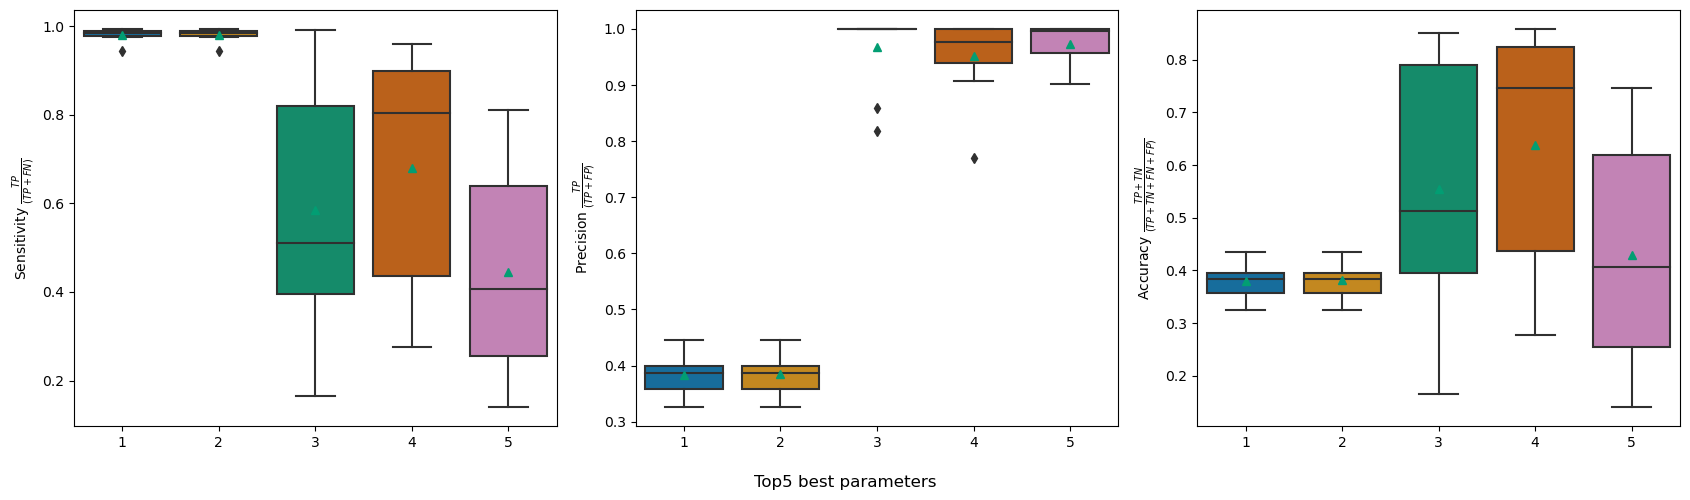

In [5]:
fig,ax = plt.subplots(1,3,figsize=(17,5))
sns.set_palette('colorblind')

sns.boxplot(data=df_best_params,x='top',y='sensitivity',showmeans=True,ax= ax[0])
sns.boxplot(data=df_best_params,x='top',y='precision',showmeans=True,ax= ax[1])
sns.boxplot(data=df_best_params,x='top',y='accuracy',showmeans=True,ax= ax[2])
ax[0].set_ylabel(r'Sensitivity $\frac{TP}{(TP+FN)}$')
ax[1].set_ylabel(r'Precision $\frac{TP}{(TP+FP)}$')
ax[2].set_ylabel(r'Accuracy $\frac{TP+TN}{(TP+TN+FN+FP)}$')
fig.supxlabel('Top5 best parameters')
for ax in ax:
    ax.set_xlabel('')

plt.tight_layout()
#plt.savefig('results/plots/laptrack_top5_params.png',dpi=300)
plt.show()

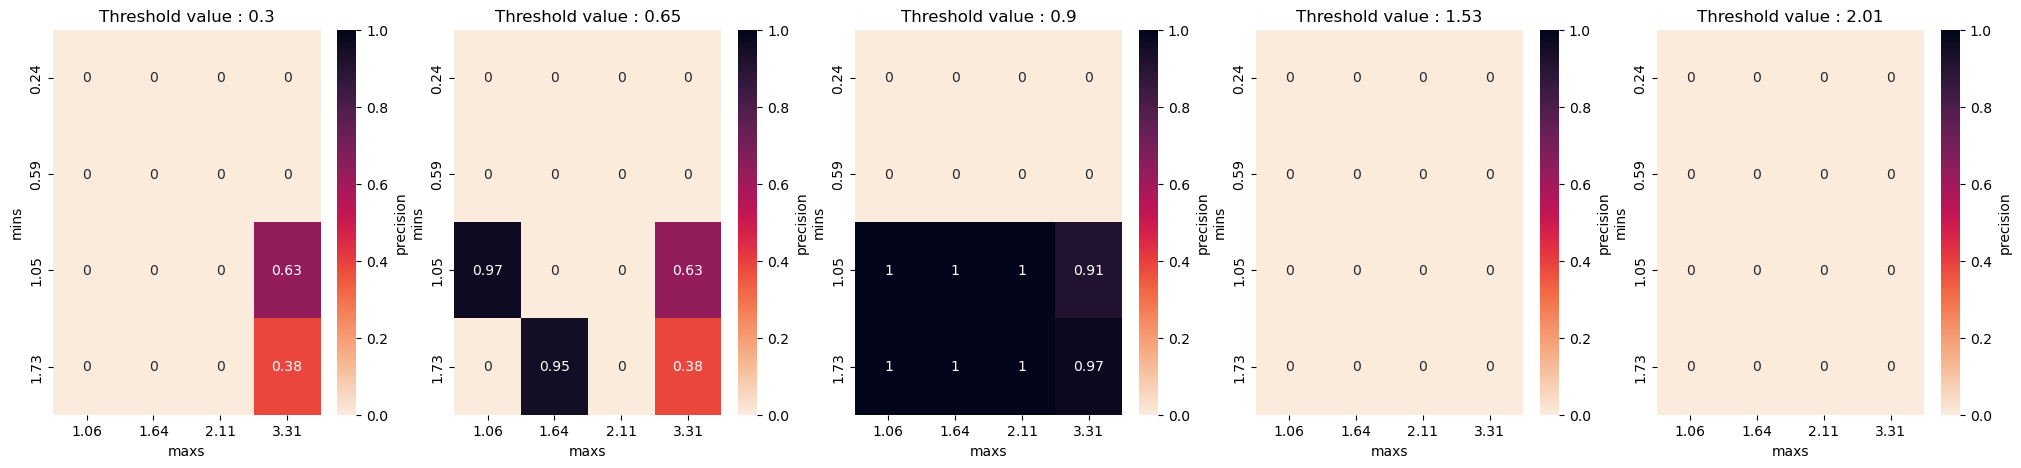

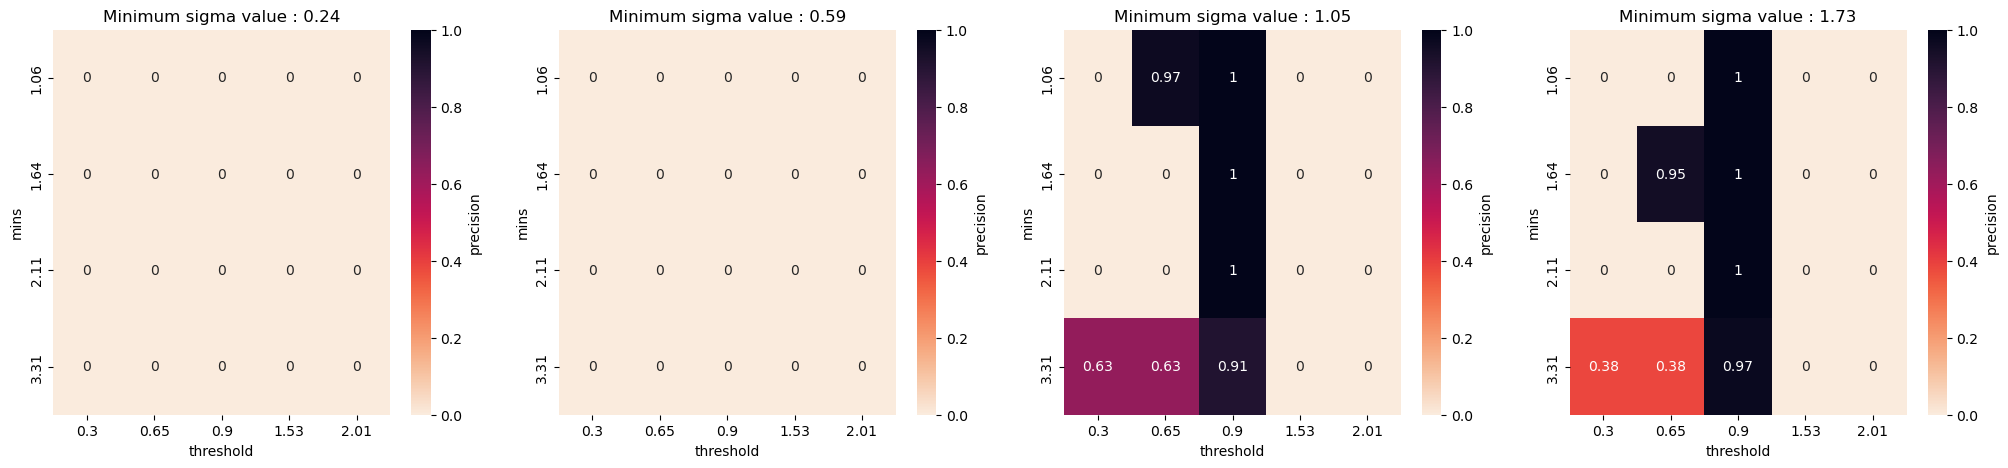

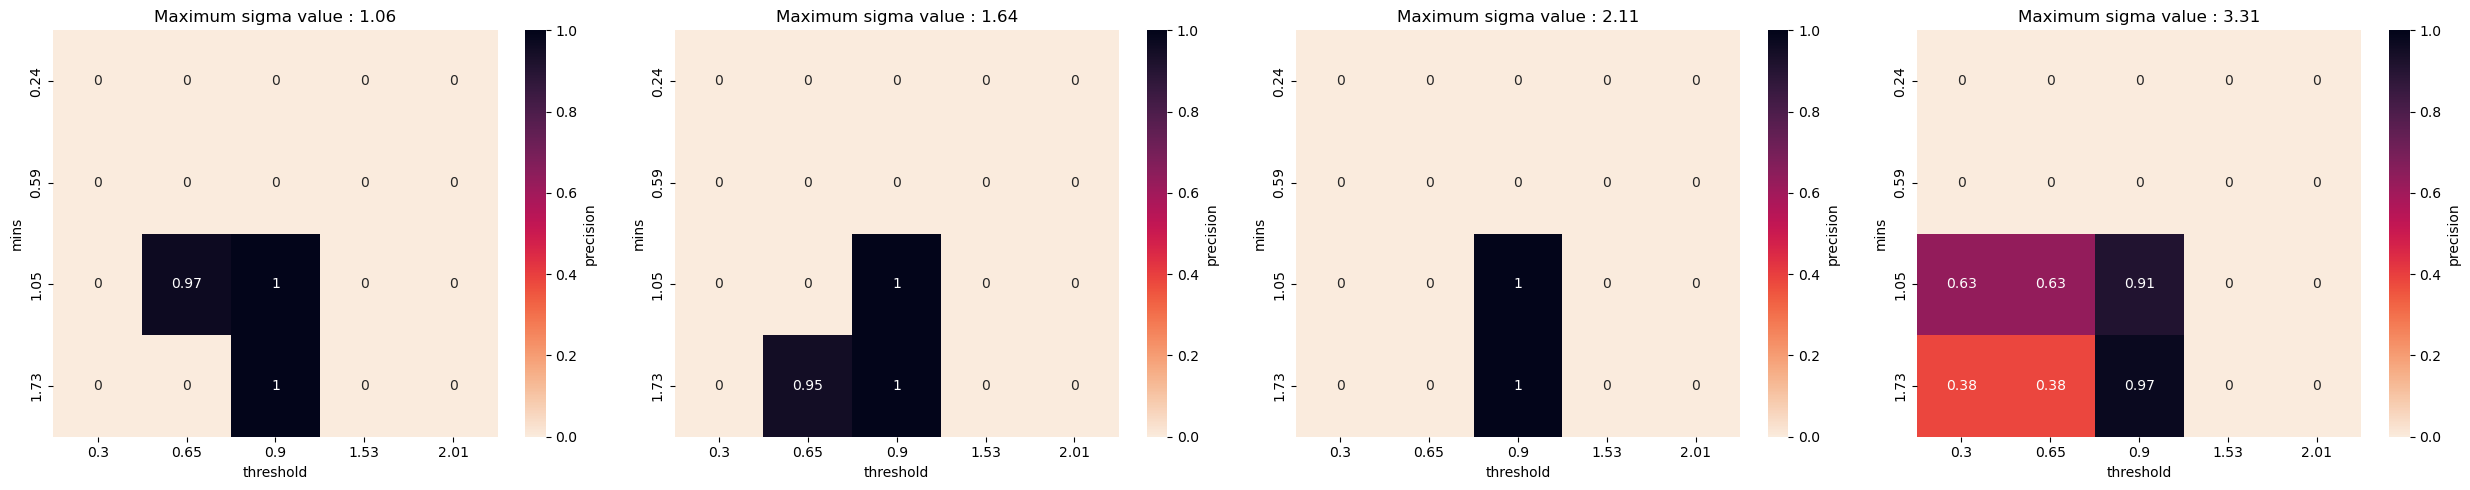

In [9]:
plot_heatmap2D(df_heat_norm_wide,'precision')

## Finer search

In [39]:
df_sweep_laptrack_norm_fine = pd.read_csv('results/final/normalized/finer_sweep/final_laptrack.csv')
df_sweep_laptrack_norm_fine['Unnamed: 0'] = [0,9]*625
df_sweep_laptrack_norm_fine['Unnamed: 0.1'] = [1,1,3,3,5,5,7,7,9,9] * int(len(df_sweep_laptrack_norm_fine.index)/len([0,0,3,3,5,5,7,7,9,9]))
df_sweep_laptrack_norm_fine.rename(columns={'Unnamed: 0':'Frame','Unnamed: 0.1':'Image'},inplace=True)

df_heat_norm_fine = df_sweep_laptrack_norm_fine.copy()
for l,i in enumerate(df_heat_norm_fine.iloc):
    c = i.param
    df_heat_norm_fine.loc[l,'mins'] = float(c[5:9].replace('_','0'))
    df_heat_norm_fine.loc[l,'maxs'] = float(c[14:19].replace('_','0').replace('t','0').replace('s','0'))
    df_heat_norm_fine.loc[l,'threshold'] = float(c[29:34].replace('_','0').replace('d','0'))

df_heat_norm_fine

Image  Frame  precision  negative_predicted_value  sensitivity  \
0         1      0        0.0                       0.0          0.0   
1         1      9        0.0                       0.0          0.0   
2         3      0        0.0                       0.0          0.0   
3         3      9        0.0                       0.0          0.0   
4         5      0        0.0                       0.0          0.0   
...     ...    ...        ...                       ...          ...   
1245      5      9        0.0                       0.0          0.0   
1246      7      0        0.0                       0.0          0.0   
1247      7      9        0.0                       0.0          0.0   
1248      9      0        0.0                       0.0          0.0   
1249      9      9        0.0                       0.0          0.0   

      specificity  accuracy                              param  mins  maxs  \
0             0.0       0.0  mins_1.4_maxs_2.11_threshold_0.65   1.4  2.11   
1             0.0       0.0  mins_1.4_maxs_2.11_threshold_0.65   1.4  2.11   
2             0.0       0.0  mins_1.4_maxs_2.11_threshold_0.65   1.4  2.11   
3             0.0       0.0  mins_1.4_maxs_2.11_threshold_0.65   1.4  2.11   
4             0.0       0.0  mins_1.4_maxs_2.11_threshold_0.65   1.4  2.11   
...           ...       ...                                ...   ...   ...   
1245          0.0       0.0   mins_1.4_maxs_2.11_threshold_0.1   1.4  2.11   
1246          0.0       0.0   mins_1.4_maxs_2.11_threshold_0.1   1.4  2.11   
1247          0.0       0.0   mins_1.4_maxs_2.11_threshold_0.1   1.4  2.11   
1248          0.0       0.0   mins_1.4_maxs_2.11_threshold_0.1   1.4  2.11   
1249          0.0       0.0   mins_1.4_maxs_2.11_threshold_0.1   1.4  2.11   

      threshold  
0          0.65  
1          0.65  
2          0.65  
3          0.65  
4          0.65  
...         ...  
1245       0.10  
1246       0.10  
1247       0.10  
1248       0.10  
1249       0.10  

[1250 rows x 11 columns]

In [40]:
df_heat_norm_fine['ranking'] = df_heat_norm_fine['sensitivity'].rank(method='first',ascending=False)
df_heat_norm_fine = df_heat_norm_fine.sort_values(by='ranking')
# df_heat_norm

# Get the 4 top parameters 

param = df_heat_norm_fine.iloc[0].param

best_params = [df_heat_norm_fine.iloc[0].param] #list of the best params

for i in df_heat_norm_fine.iloc:
    if i.param not in best_params :
        best_params.append(i.param)
        if len(best_params) > 4: # check that you only take 4
            break                                                    

df_best_params = pd.DataFrame()

for l,i in enumerate(best_params):
    df = df_heat_norm_fine[df_heat_norm_fine.param == i]
    df.loc[:,'top'] = l+1
    df_best_params = pd.concat([df_best_params,df])

df_best_params.reset_index(inplace=True,drop=True)
df_best_params

/scratch/louaness/ipykernel_125285/884771234.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_125285/884771234.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_125285/884771234.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Image  Frame  precision  negative_predicted_value  sensitivity  \
0       3      9   0.320401                  0.250000     0.997662   
1       3      0   0.362676                  0.142857     0.995856   
2       5      9   0.328664                  0.125000     0.994701   
3       5      0   0.387446                  0.062500     0.990335   
4       7      9   0.362765                  0.050000     0.986960   
5       7      0   0.410805                  0.017857     0.967007   
6       1      0   0.000000                  0.000000     0.000000   
7       1      9   0.000000                  0.000000     0.000000   
8       9      0   0.000000                  0.000000     0.000000   
9       9      9   0.000000                  0.000000     0.000000   
10      3      9   0.320401                  0.250000     0.997662   
11      3      0   0.362676                  0.142857     0.995856   
12      5      9   0.328664                  0.125000     0.994701   
13      5      0   0.387446                  0.062500     0.990335   
14      7      9   0.362765                  0.050000     0.986960   
15      7      0   0.410805                  0.017857     0.967007   
16      1      0   0.000000                  0.000000     0.000000   
17      1      9   0.000000                  0.000000     0.000000   
18      9      0   0.000000                  0.000000     0.000000   
19      9      9   0.000000                  0.000000     0.000000   
20      5      9   0.345770                  0.166667     0.996215   
21      3      0   0.377988                  0.100000     0.993785   
22      3      9   0.335351                  0.100000     0.992985   
23      1      0   0.376728                  0.058824     0.989041   
24      1      9   0.325013                  0.066667     0.988924   
25      9      9   0.307399                  0.066667     0.988553   
26      5      0   0.407073                  0.045455     0.986469   
27      7      9   0.379365                  0.041667     0.984214   
28      9      0   0.358085                  0.037037     0.981560   
29      7      0   0.425896                  0.013158     0.955009   
30      5      9   0.345770                  0.166667     0.996215   
31      3      0   0.377988                  0.100000     0.993785   
32      3      9   0.335351                  0.100000     0.992985   
33      1      0   0.376728                  0.058824     0.989041   
34      1      9   0.325013                  0.066667     0.988924   
35      9      9   0.307399                  0.066667     0.988553   
36      5      0   0.407073                  0.045455     0.986469   
37      7      9   0.379365                  0.041667     0.984214   
38      9      0   0.358085                  0.037037     0.981560   
39      7      0   0.425896                  0.013158     0.955009   
40      3      9   0.332466                  0.166667     0.996103   
41      5      9   0.340233                  0.142857     0.995458   
42      1      9   0.321639                  0.111111     0.993671   
43      3      0   0.370743                  0.083333     0.992403   
44      5      0   0.400782                  0.062500     0.990335   
45      7      9   0.371126                  0.047619     0.986273   
46      1      0   0.370590                  0.045455     0.985616   
47      9      0   0.352538                  0.045455     0.985106   
48      7      0   0.419827                  0.015873     0.962807   
49      9      9   0.000000                  0.000000     0.000000   

    specificity  accuracy                             param  mins  maxs  \
0      0.000368  0.320330   mins_2.0_maxs_4.0_threshold_0.1   2.0  4.00   
1      0.000394  0.362290   mins_2.0_maxs_4.0_threshold_0.1   2.0  4.00   
2      0.000372  0.328258   mins_2.0_maxs_4.0_threshold_0.1   2.0  4.00   
3      0.000411  0.386141   mins_2.0_maxs_4.0_threshold_0.1   2.0  4.00   
4      0.000396  0.361195   mins_2.0_maxs_4.0_threshold_0.

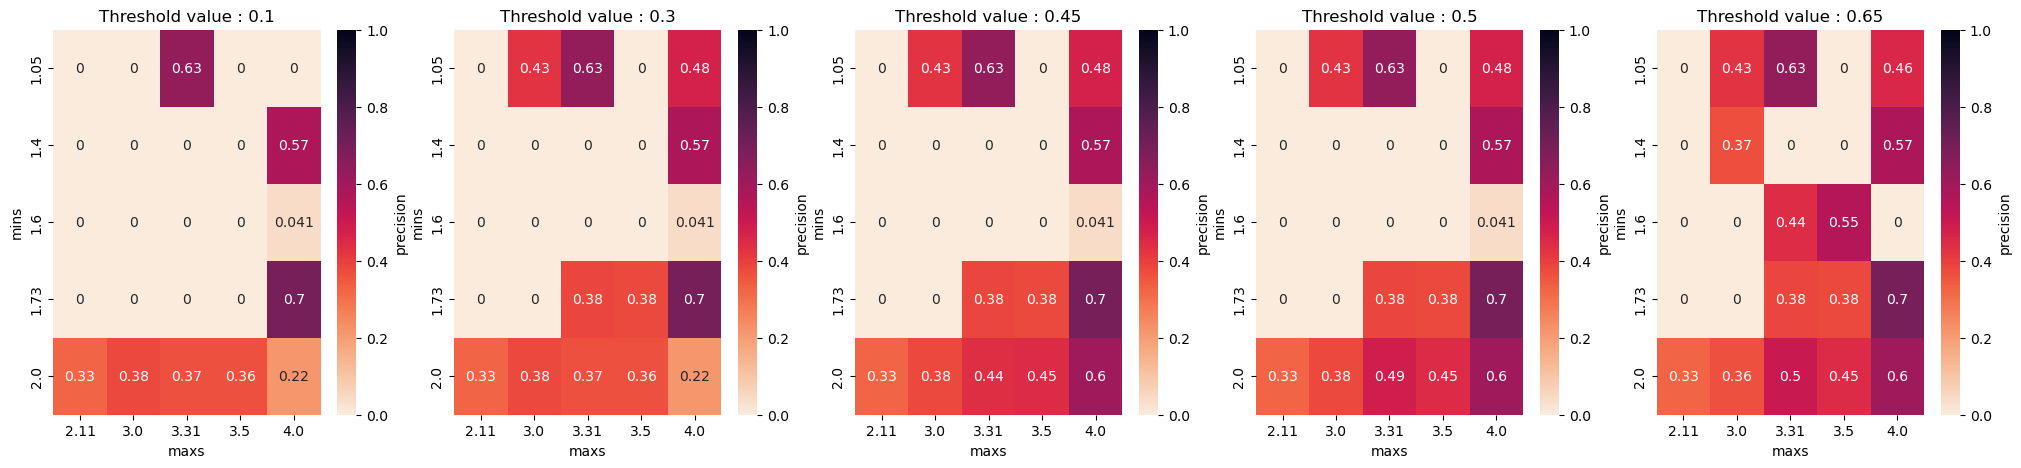

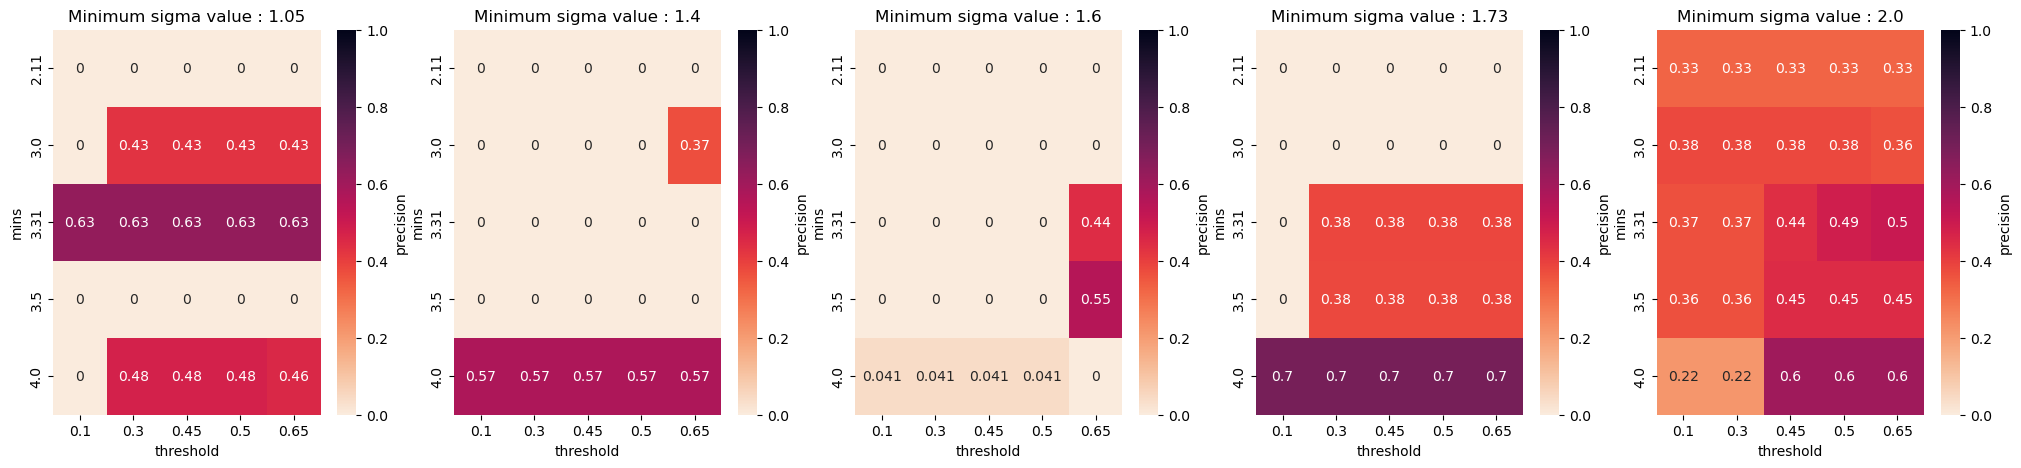

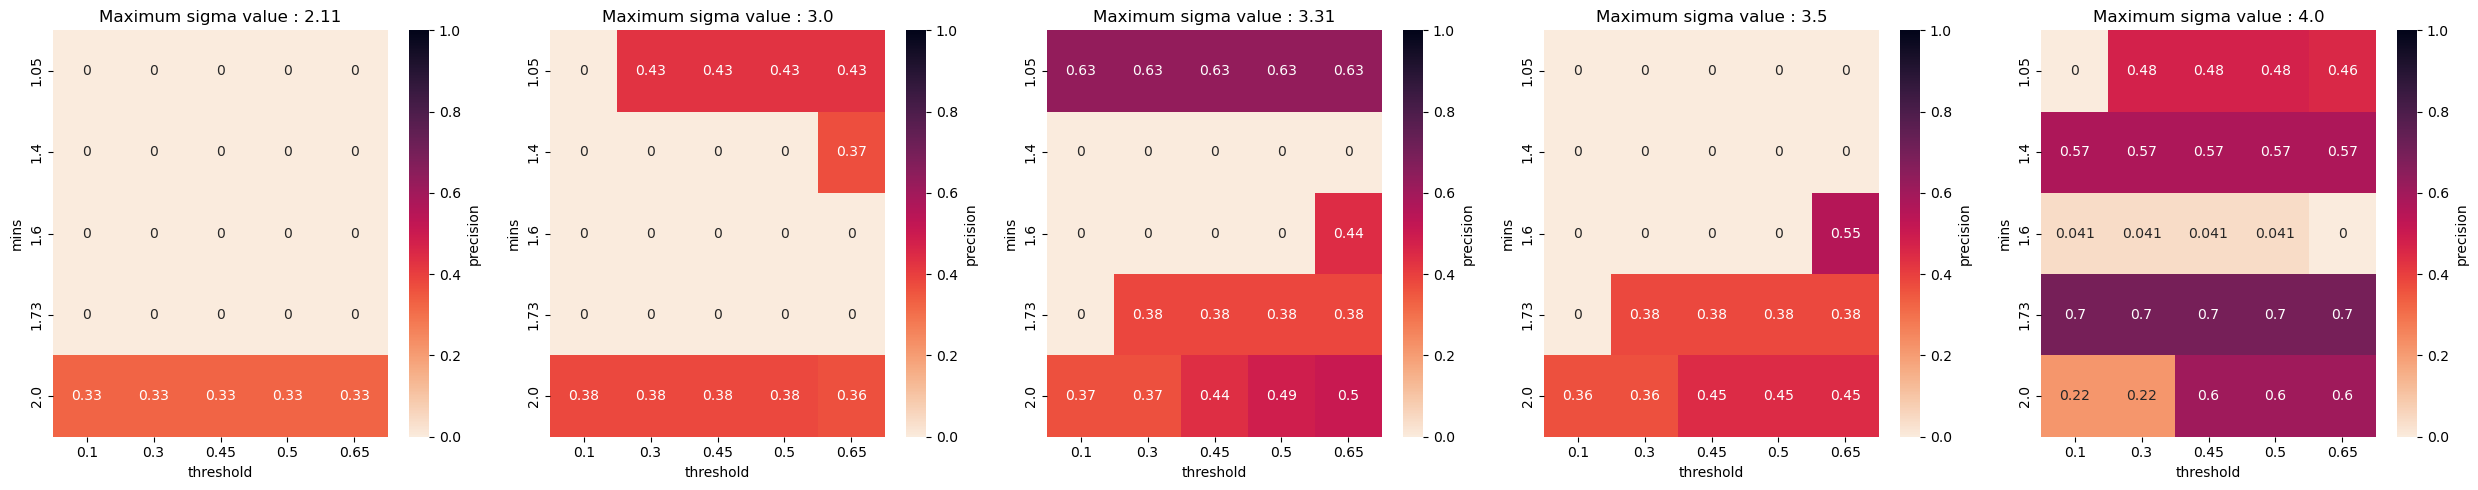

In [42]:
plot_heatmap2D(df_heat_norm_fine,'precision')

## Sweep for higher threshold and for more values 

In [3]:
import re 
df_sweep_laptrack_norm_big = pd.read_csv('results/final/normalized/finer_sweep/final_laptrack.csv')
df_sweep_laptrack_norm_big['Unnamed: 0'] = [0,9]*40000
df_sweep_laptrack_norm_big['Unnamed: 0.1'] = [1,1,3,3,5,5,7,7,9,9] * int(len(df_sweep_laptrack_norm_big.index)/len([0,0,3,3,5,5,7,7,9,9]))
df_sweep_laptrack_norm_big.rename(columns={'Unnamed: 0':'Frame','Unnamed: 0.1':'Image'},inplace=True)

df_heat_norm_big = df_sweep_laptrack_norm_big.copy()
for l,i in enumerate(df_heat_norm_big.iloc):
    c = i.param
    df_heat_norm_big.loc[l,'mins'] = round(float(re.findall(r"[-+]?\d*\.*\d+",c)[0]),3)
    df_heat_norm_big.loc[l,'maxs'] = round(float(re.findall(r"[-+]?\d*\.*\d+",c)[1]),3)
    df_heat_norm_big.loc[l,'threshold'] = round(float(re.findall(r"[-+]?\d*\.*\d+",c)[2]),3)

In [4]:
df_heat_norm_big['ranking'] = df_heat_norm_big['precision'].rank(method='first',ascending=False)
df_heat_norm_big = df_heat_norm_big.sort_values(by='ranking')
# df_heat_norm

# Get the 4 top parameters 

param = df_heat_norm_big.iloc[0].param

best_params = [df_heat_norm_big.iloc[0].param] #list of the best params

for i in df_heat_norm_big.iloc:
    if i.param not in best_params :
        best_params.append(i.param)
        if len(best_params) > 20: # check that you only take 4
            break                                                    

df_best_params = pd.DataFrame()

for l,i in enumerate(best_params):
    df = df_heat_norm_big[df_heat_norm_big.param == i]
    df.loc[:,'top'] = l+1
    df_best_params = pd.concat([df_best_params,df])

df_best_params.reset_index(inplace=True,drop=True)
df_best_params

/scratch/louaness/ipykernel_161126/2848320435.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_161126/2848320435.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_161126/2848320435.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Image  Frame  precision  negative_predicted_value  sensitivity  \
0        1      0   1.000000                  0.000686     0.002740   
1        1      9   1.000000                  0.000792     0.002373   
2        3      0   1.000000                  0.000691     0.001381   
3        3      9   1.000000                  0.000794     0.019486   
4        5      0   1.000000                  0.000645     0.001289   
..     ...    ...        ...                       ...          ...   
205      1      0   0.993088                  0.000971     0.295205   
206      5      9   0.991266                  0.001152     0.343679   
207      9      9   0.990698                  0.001253     0.348324   
208      3      9   0.983051                  0.001220     0.361652   
209      7      0   0.976023                  0.001025     0.415117   

     specificity  accuracy                                              param  \
0       1.000000  0.003422  mins_2.58947368_maxs_3.52631579_threshold_0.97...   
1       1.000000  0.003162  mins_2.58947368_maxs_3.52631579_threshold_0.97...   
2       1.000000  0.002070  mins_2.58947368_maxs_3.52631579_threshold_0.97...   
3       1.000000  0.020249  mins_2.58947368_maxs_3.52631579_threshold_0.97...   
4       1.000000  0.001932  mins_2.58947368_maxs_3.52631579_threshold_0.97...   
..           ...       ...                                                ...   
205     0.250000  0.295082  mins_2.65789474_maxs_3.84210526_threshold_0.93...   
206     0.200000  0.343137  mins_2.65789474_maxs_3.84210526_threshold_0.93...   
207     0.200000  0.347720  mins_2.65789474_maxs_3.84210526_threshold_0.93...   
208     0.111111  0.359907  mins_2.65789474_maxs_3.84210526_threshold_0.93...   
209     0.055556  0.411276  mins_2.65789474_maxs_3.84210526_threshold_0.93...   

      mins   maxs  threshold  ranking  top  
0    2.589  3.526      0.979      1.0    1  
1    2.589  3.526      0.979      2.0    1  
2    2.589  3.526      0.979      3.0    1  
3    2.589  3.526      0.979      4.0    1  
4    2.589  3.526      0.979      5.0    1  
..     ...    ...        ...      ...  ...  
205  2.658  3.842      0.932   7303.0   21  
206  2.658  3.842      0.932   7406.0   21  
207  2.658  3.842      0.932   7439.0   21  
208  2.658  3.842      0.932   7815.0   21  
209  2.658  3.842      0.932   8041.0   21  

[210 rows x 13 columns]

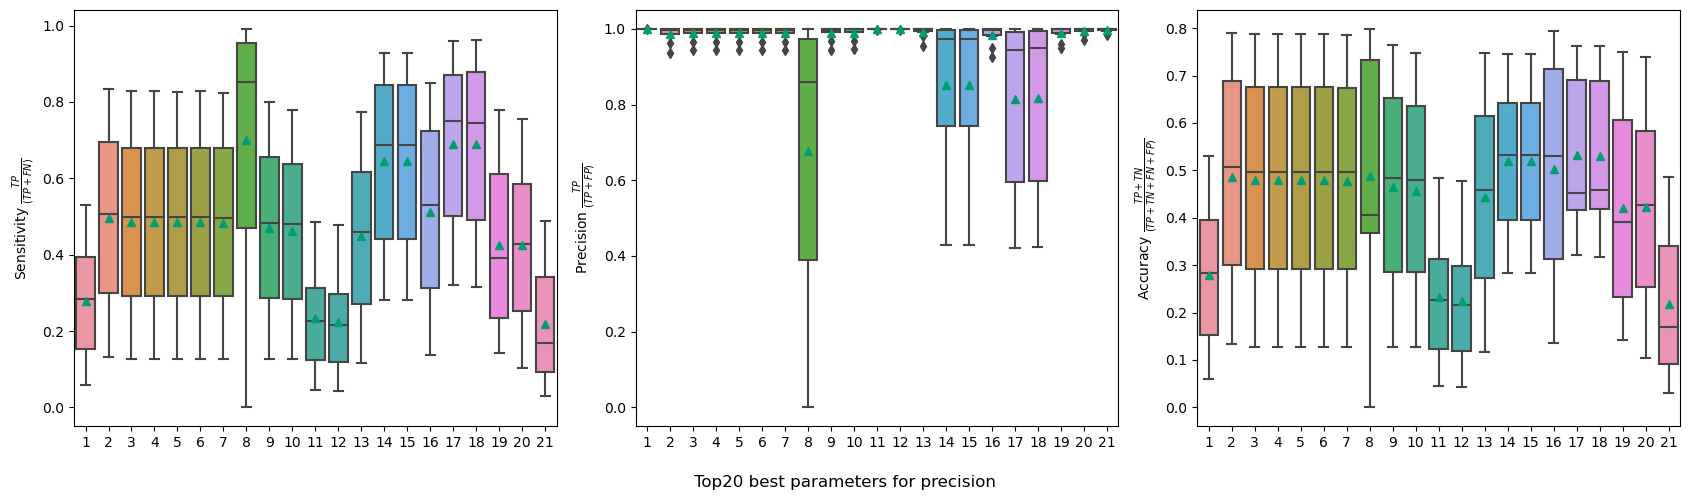

In [14]:
fig,ax = plt.subplots(1,3,figsize=(17,5))
sns.set_palette('colorblind')

sns.boxplot(data=df_best_params,x='top',y='sensitivity',showmeans=True,ax= ax[0])
sns.boxplot(data=df_best_params,x='top',y='precision',showmeans=True,ax= ax[1])
sns.boxplot(data=df_best_params,x='top',y='accuracy',showmeans=True,ax= ax[2])
ax[0].set_ylabel(r'Sensitivity $\frac{TP}{(TP+FN)}$')
ax[1].set_ylabel(r'Precision $\frac{TP}{(TP+FP)}$')
ax[2].set_ylabel(r'Accuracy $\frac{TP+TN}{(TP+TN+FN+FP)}$')
fig.supxlabel('Top20 best parameters for precision')
for ax in ax:
    ax.set_xlabel('')

plt.tight_layout()
#plt.savefig('results/plots/laptrack_top20_params.png',dpi=300)
plt.show()

In [18]:
df_best_params[df_best_params.top == 17].param.values[0]

'mins_1.97368421_maxs_3.73684211_threshold_0.88421053'

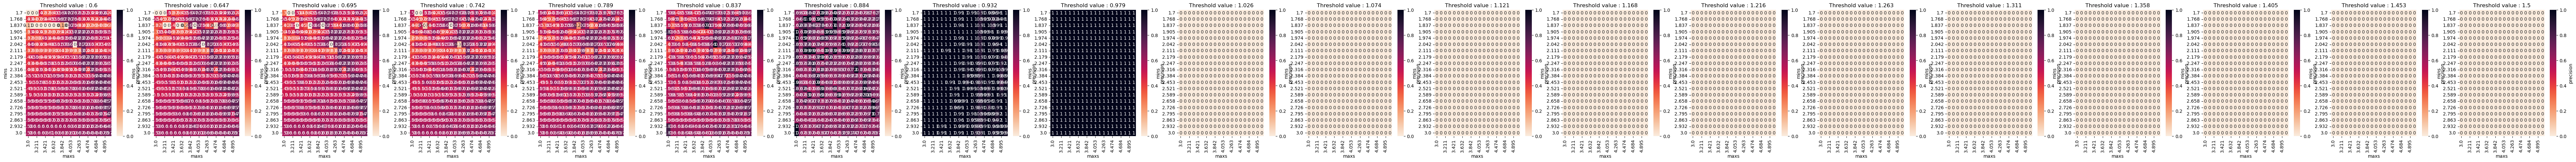

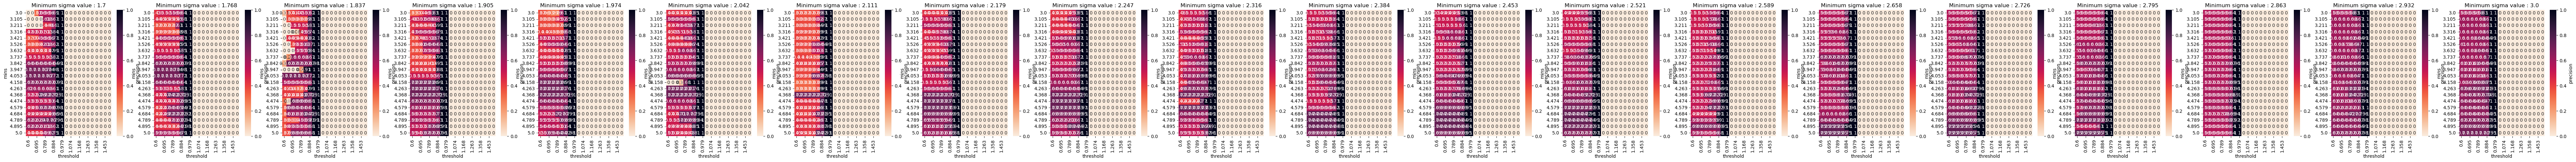

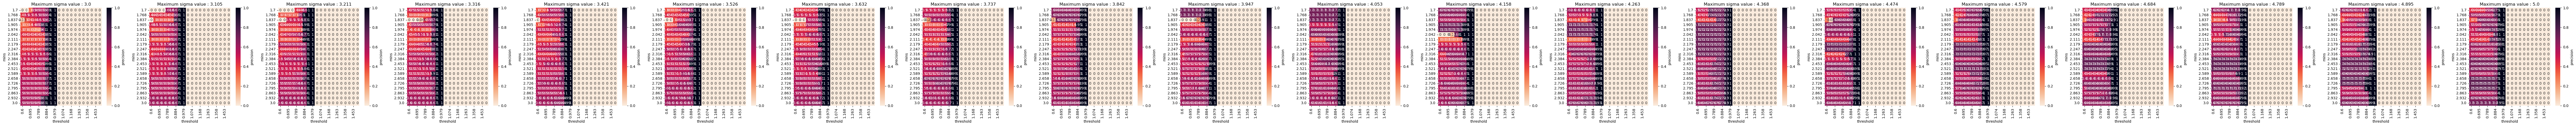

In [53]:
plot_heatmap2D(df_heat_norm_big,'precision')

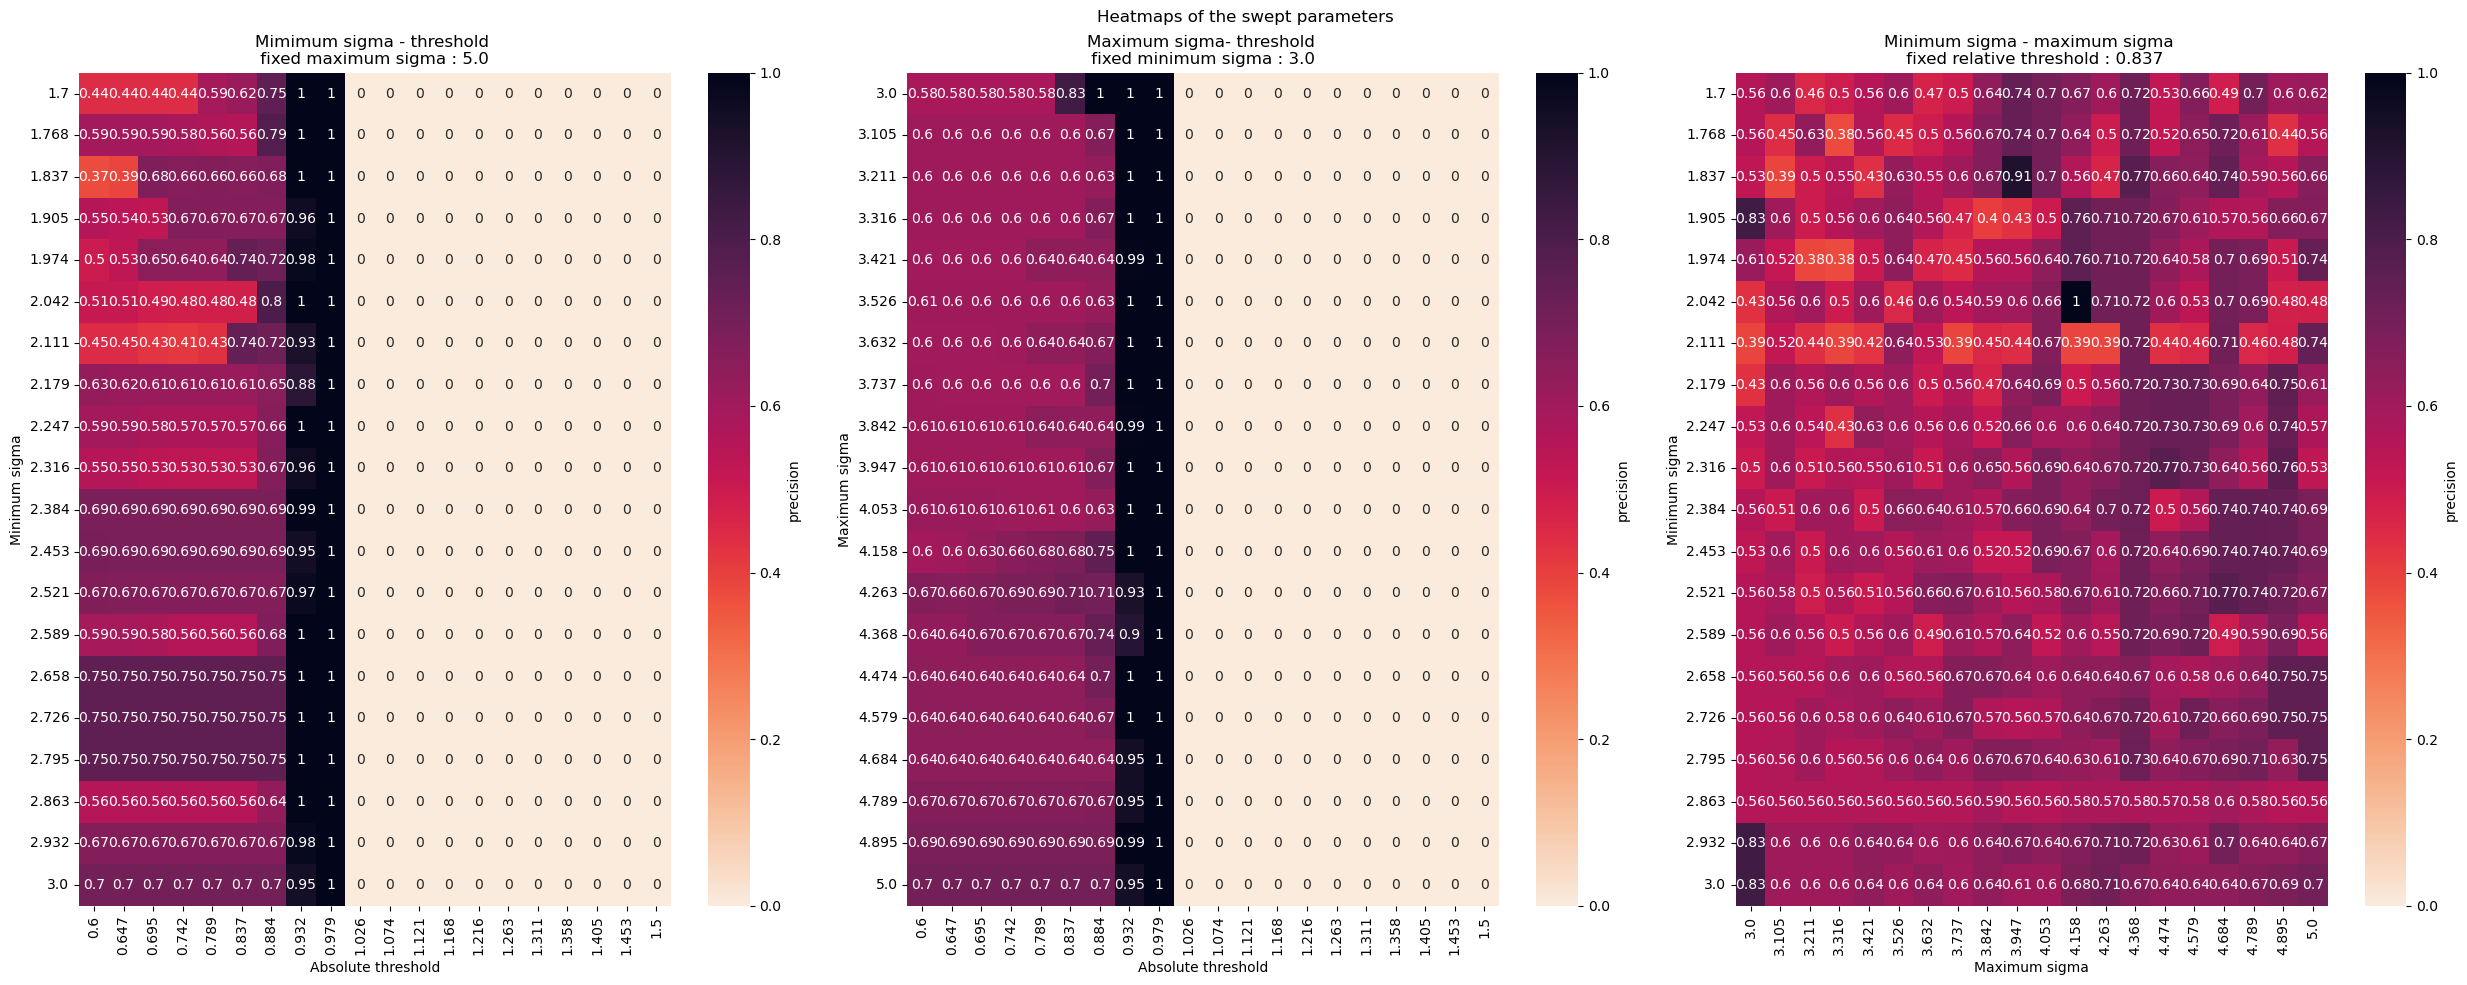

In [71]:
plot_heatmap(df_heat_norm_big,col='precision',best_maxs=5.,best_mins=3.,best_tresh=0.837)
#plt.savefig('../../spt/plots/best_params_normalized_heatmap.png',dpi=300)

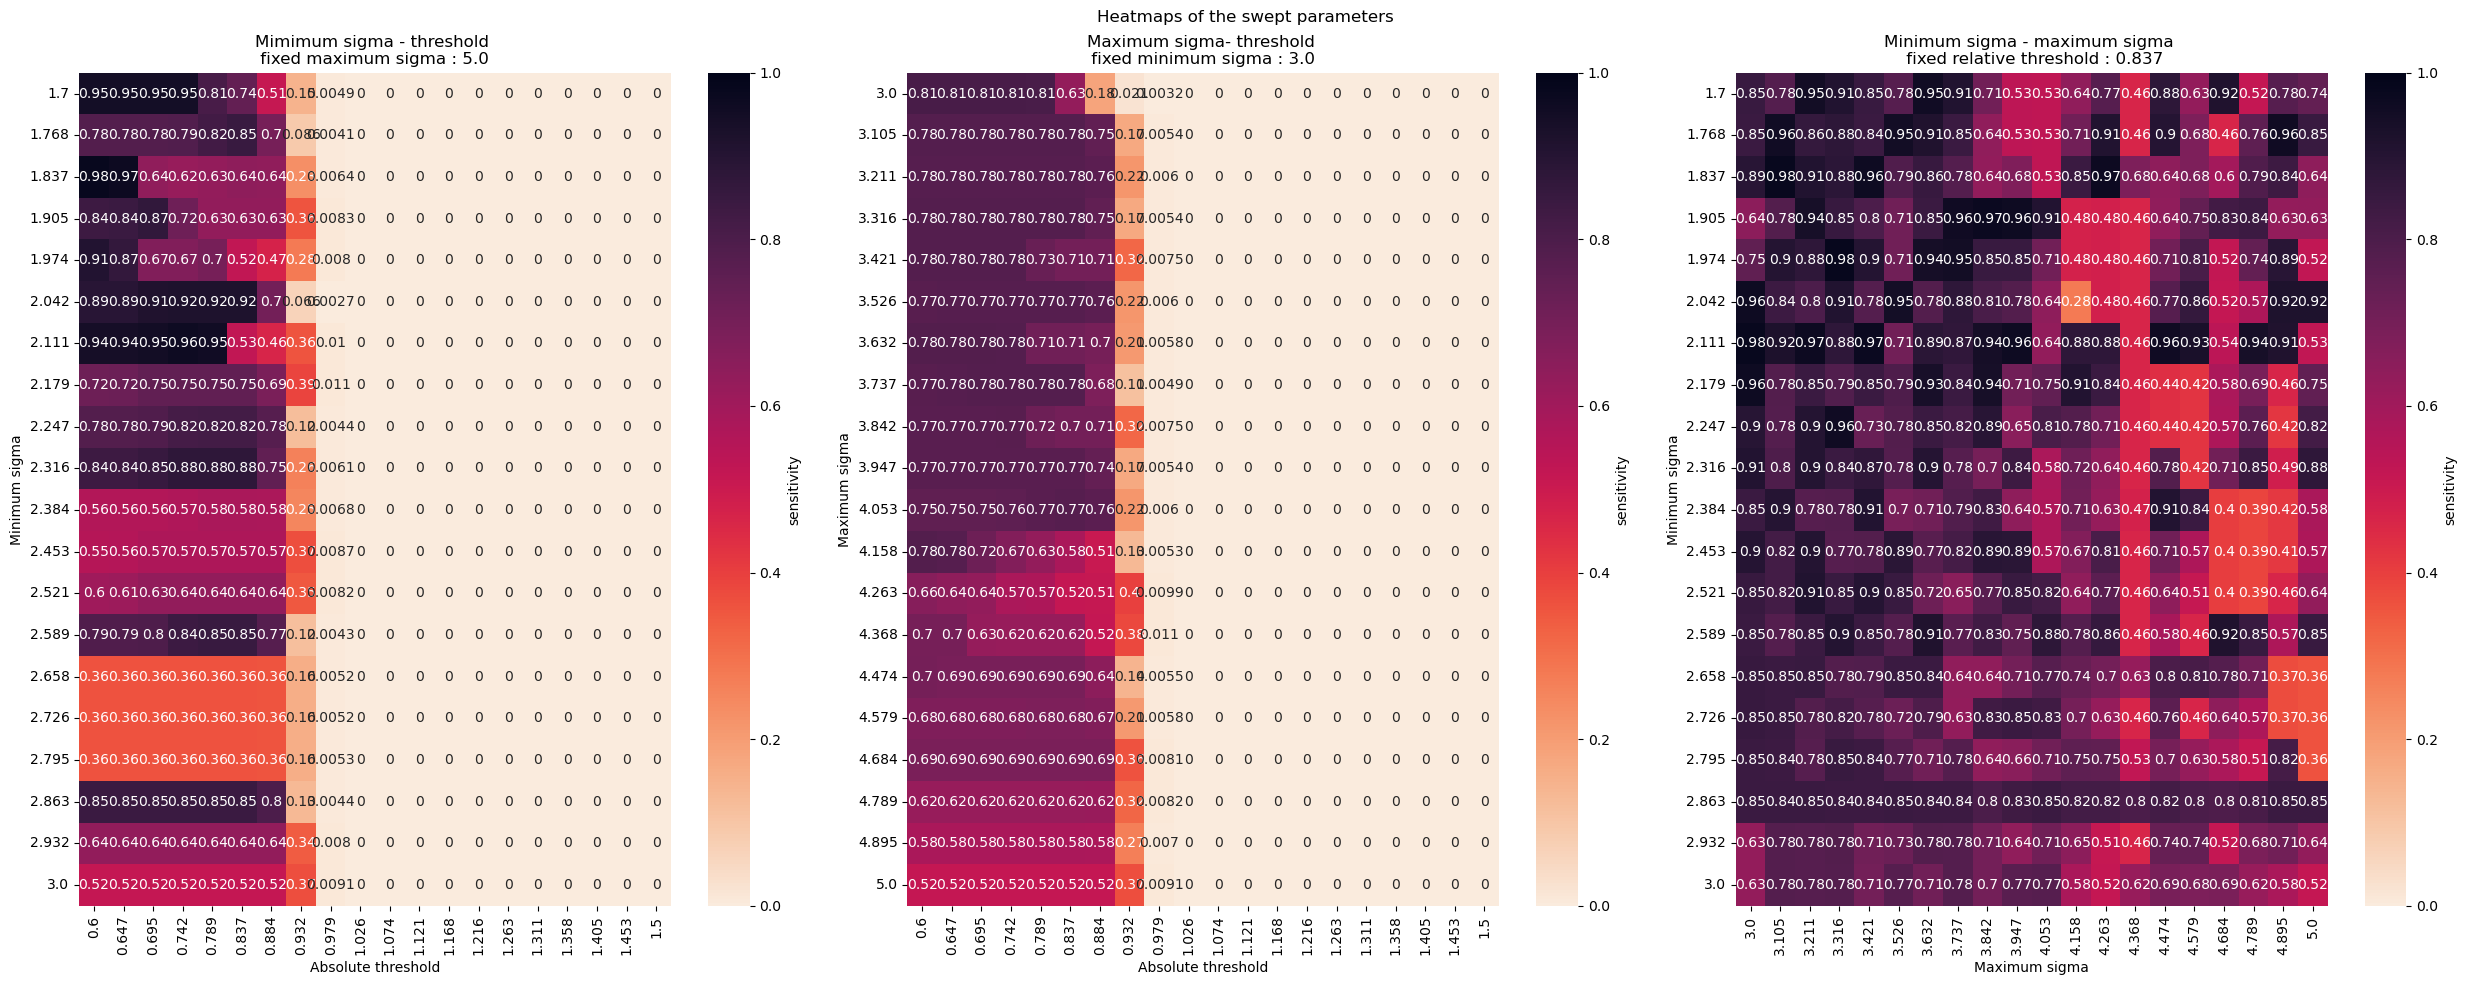

In [70]:
plot_heatmap(df_heat_norm_big,col='sensitivity',best_maxs=5.,best_mins=3.,best_tresh=0.837)

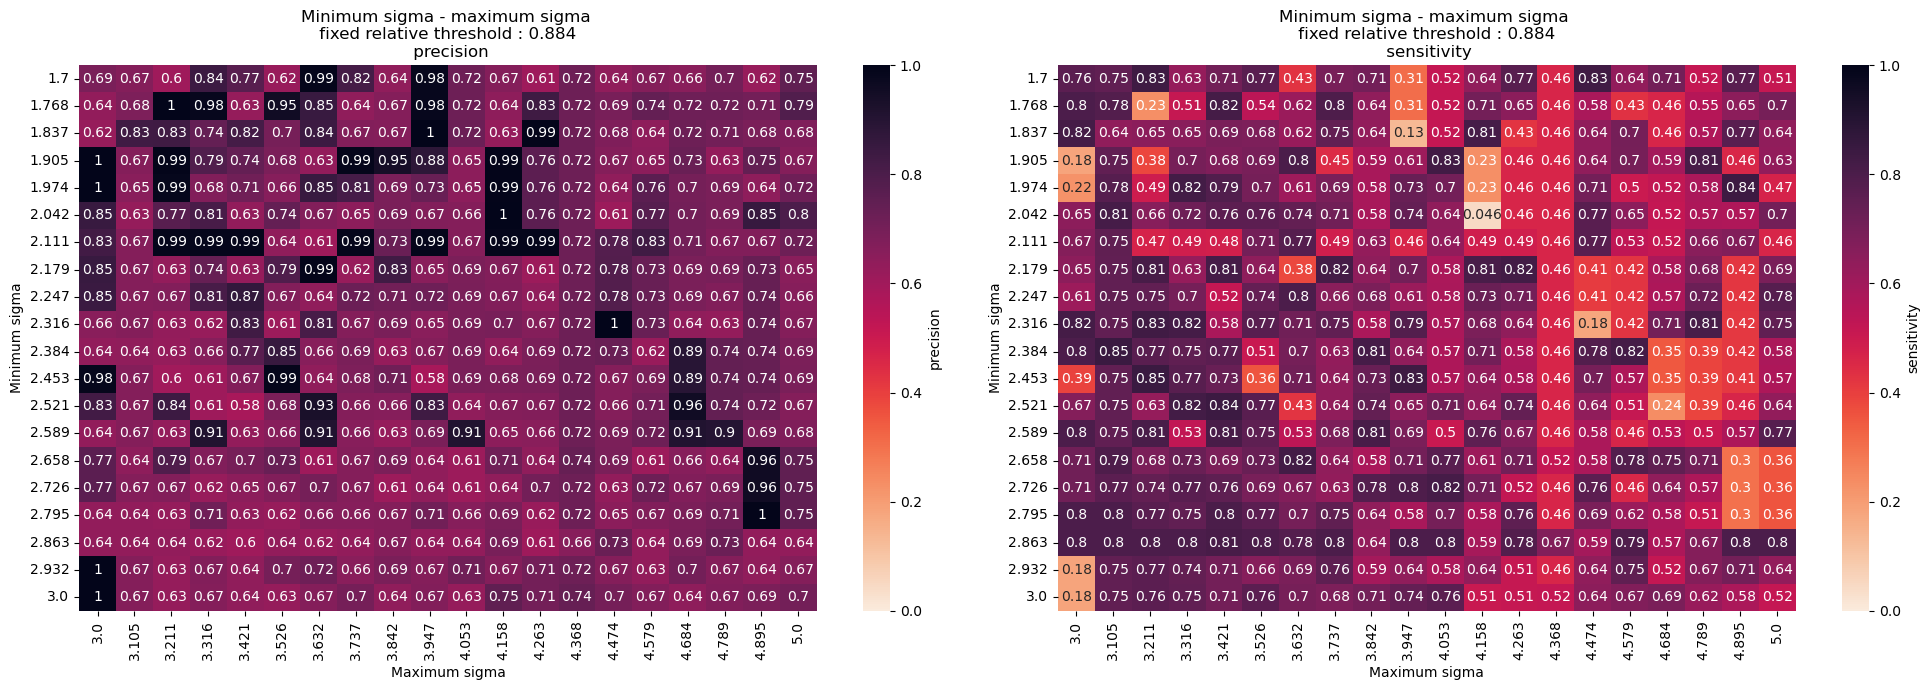

In [9]:
best_tresh = 0.884
col = 'precision'
col_2 = 'sensitivity'
df = df_heat_norm_big.copy()

fig,ax = plt.subplots(1,2,figsize=(20,7))
mins_maxs = []
mins_maxs2 = []


for i in sorted(set(df.mins.values)):
        for j in sorted(set(df.maxs.values)):
            mins_maxs.append([i,j,np.mean(df.loc[(df.mins == i) & (df.maxs == j)  & (df.threshold == best_tresh),col])])
            mins_maxs2.append([i,j,np.mean(df.loc[(df.mins == i) & (df.maxs == j)  & (df.threshold == best_tresh),col_2])])

# dataframes

df_maxs_mins = pd.DataFrame(mins_maxs).pivot(index=0, columns=1,values=2)
df_maxs_mins.columns.name = 'Maximum sigma'
df_maxs_mins.index.rename('Minimum sigma',inplace=True)

df_maxs_mins2 = pd.DataFrame(mins_maxs2).pivot(index=0, columns=1,values=2)
df_maxs_mins2.columns.name = 'Maximum sigma'
df_maxs_mins2.index.rename('Minimum sigma',inplace=True)

title = [f'Minimum sigma - maximum sigma \n fixed relative threshold : {best_tresh} \n {col}',f'Minimum sigma - maximum sigma \n fixed relative threshold : {best_tresh} \n {col_2}']
sns.heatmap(df_maxs_mins,ax=ax[0],vmin=0,vmax=1.,cbar_kws={'label': col},cmap='rocket_r',annot=True)
sns.heatmap(df_maxs_mins2,ax=ax[1],vmin=0,vmax=1.,cbar_kws={'label': col_2},cmap='rocket_r',annot=True)
ax[0].set_title(title[0])
ax[1].set_title(title[1])

plt.tight_layout()
# plt.savefig('../../../spt/plots/best_heatmap_normalized_fixed_thresh.png',dpi=300)

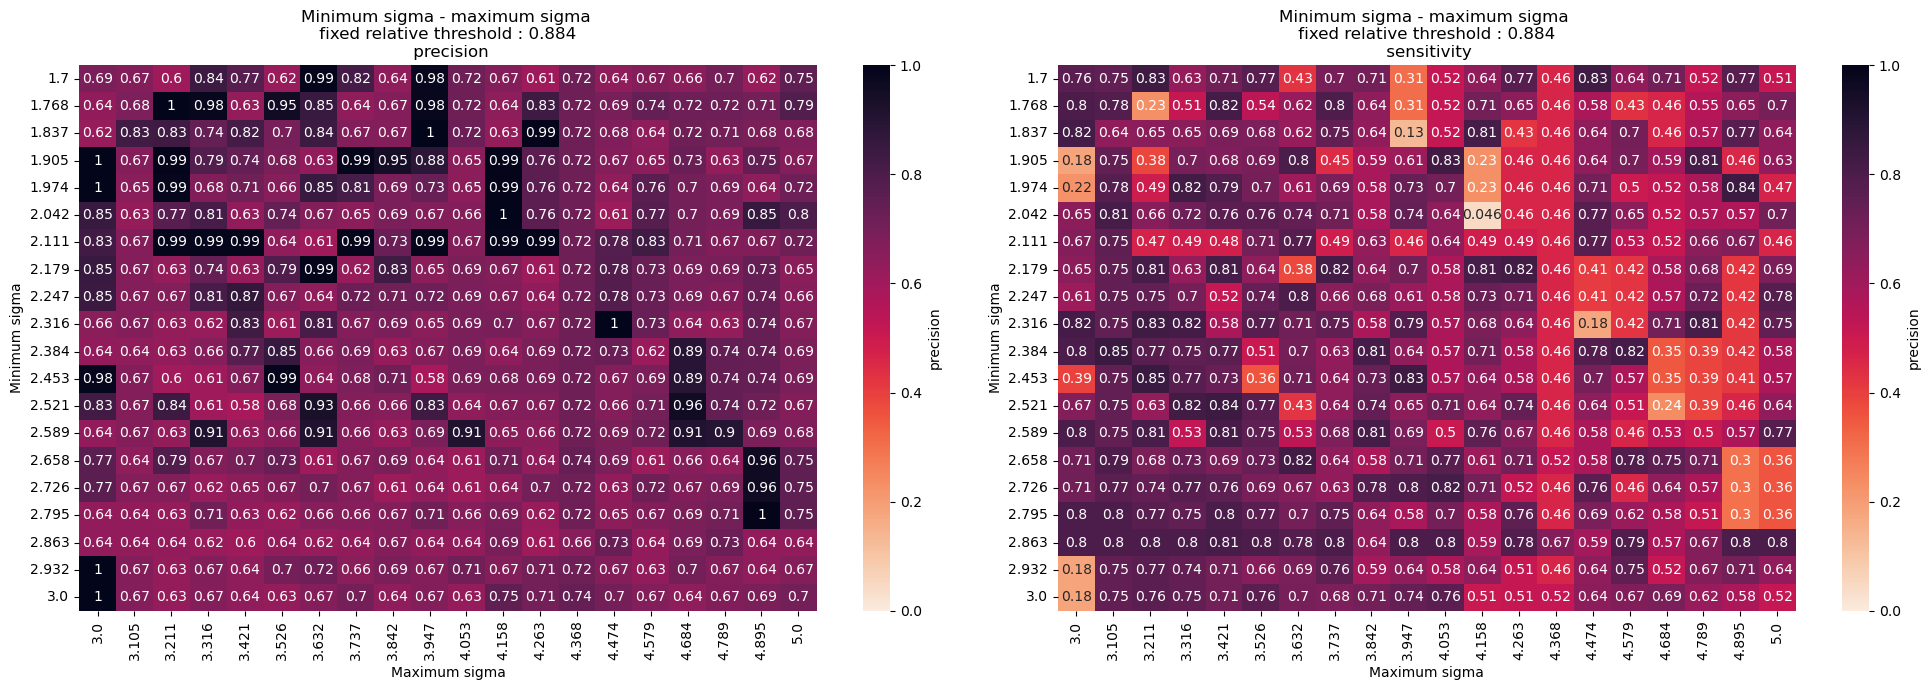

In [81]:
best_tresh = 0.884
col = 'precision'
col_2 = 'sensitivity'
df = df_heat_norm_big.copy()

fig,ax = plt.subplots(1,2,figsize=(20,7))
mins_maxs = []
mins_maxs2 = []


for i in sorted(set(df.mins.values)):
        for j in sorted(set(df.maxs.values)):
            mins_maxs.append([i,j,np.mean(df.loc[(df.mins == i) & (df.maxs == j)  & (df.threshold == best_tresh),col])])
            mins_maxs2.append([i,j,np.mean(df.loc[(df.mins == i) & (df.maxs == j)  & (df.threshold == best_tresh),col_2])])

# dataframes

df_maxs_mins = pd.DataFrame(mins_maxs).pivot(index=0, columns=1,values=2)
df_maxs_mins.columns.name = 'Maximum sigma'
df_maxs_mins.index.rename('Minimum sigma',inplace=True)

df_maxs_mins2 = pd.DataFrame(mins_maxs2).pivot(index=0, columns=1,values=2)
df_maxs_mins2.columns.name = 'Maximum sigma'
df_maxs_mins2.index.rename('Minimum sigma',inplace=True)

title = [f'Minimum sigma - maximum sigma \n fixed relative threshold : {best_tresh} \n {col}',f'Minimum sigma - maximum sigma \n fixed relative threshold : {best_tresh} \n {col_2}']
sns.heatmap(df_maxs_mins,ax=ax[0],vmin=0,vmax=1.,cbar_kws={'label': col},cmap='rocket_r',annot=True)
sns.heatmap(df_maxs_mins2,ax=ax[1],vmin=0,vmax=1.,cbar_kws={'label': col},cmap='rocket_r',annot=True)
ax[0].set_title(title[0])
ax[1].set_title(title[1])

plt.tight_layout()
plt.savefig('../../spt/plots/best_heatmap_normalized_fixed_thresh:png',dpi=300)

In [22]:
df_best_param = df_heat_norm_big[(df_heat_norm_big.threshold == 0.884) & (df_heat_norm_big.mins == 2.247) & (df_heat_norm_big.maxs == 3.316)]
df_best_param

Image  Frame  precision  negative_predicted_value  sensitivity  \
15701      1      9   1.000000                  0.001176     0.328323   
15707      7      9   0.998255                  0.001129     0.392588   
15702      3      0   0.996997                  0.001274     0.458564   
15709      9      9   0.975148                  0.002500     0.673753   
15700      1      0   0.954987                  0.002639     0.741096   
15704      5      0   0.925532                  0.002985     0.784794   
15705      5      9   0.914358                  0.004292     0.824375   
15706      7      0   0.488327                  0.006173     0.903419   
15703      3      9   0.434859                  0.025641     0.970382   
15708      9      0   0.422406                  0.012500     0.943972   

       specificity  accuracy  \
15701     1.000000  0.328854   
15707     0.500000  0.392735   
15702     0.333333  0.458305   
15709     0.045455  0.662651   
15700     0.019231  0.716270   
15704     0.010101  0.738340   
15705     0.009709  0.765449   
15706     0.000633  0.464264   
15703     0.000618  0.429359   
15708     0.000549  0.412256   

                                                   param   mins   maxs  \
15701  mins_2.24736842_maxs_3.31578947_threshold_0.88...  2.247  3.316   
15707  mins_2.24736842_maxs_3.31578947_threshold_0.88...  2.247  3.316   
15702  mins_2.24736842_maxs_3.31578947_threshold_0.88...  2.247  3.316   
15709  mins_2.24736842_maxs_3.31578947_threshold_0.88...  2.247  3.316   
15700  mins_2.24736842_maxs_3.31578947_threshold_0.88...  2.247  3.316   
15704  mins_2.24736842_maxs_3.31578947_threshold_0.88...  2.247  3.316   
15705  mins_2.24736842_maxs_3.31578947_threshold_0.88...  2.247  3.316   
15706  mins_2.24736842_maxs_3.31578947_threshold_0.88...  2.247  3.316   
15703  mins_2.24736842_maxs_3.31578947_threshold_0.88...  2.247  3.316   
15708  mins_2.24736842_maxs_3.31578947_threshold_0.88...  2.247  3.316   

       threshold  ranking  
15701      0.884   1344.0  
15707      0.884   6776.0  
15702      0.884   6917.0  
15709      0.884   8058.0  
15700      0.884   8346.0  
15704      0.884   8629.0  
15705      0.884   8677.0  
15706      0.884  30812.0  
15703      0.884  33139.0  
15708      0.884  33588.0

In [23]:
df_best_param.to_csv('../../spt/dataframes/parameter_sweep_clean_best_param_normalized.csv')

## Sweep on the denoised image

In [5]:
import re 
df_sweep_laptrack_norm_big = pd.read_csv('results/final/normalized/denoised_sweep/final/final_laptrack_denoised.csv')
df_sweep_laptrack_norm_big['Unnamed: 0'] = [0,9]*100
df_sweep_laptrack_norm_big['Unnamed: 0.1'] = [1,1,3,3,5,5,7,7,9,9] * int(len(df_sweep_laptrack_norm_big.index)/len([0,0,3,3,5,5,7,7,9,9]))
df_sweep_laptrack_norm_big.rename(columns={'Unnamed: 0':'Frame','Unnamed: 0.1':'Image'},inplace=True)

df_heat_norm_big = df_sweep_laptrack_norm_big.copy()
for l,i in enumerate(df_heat_norm_big.iloc):
    c = i.param
    df_heat_norm_big.loc[l,'mins'] = round(float(re.findall(r"[-+]?\d*\.*\d+",c)[0]),3)
    df_heat_norm_big.loc[l,'maxs'] = round(float(re.findall(r"[-+]?\d*\.*\d+",c)[1]),3)
    df_heat_norm_big.loc[l,'threshold'] = round(float(re.findall(r"[-+]?\d*\.*\d+",c)[2]),3)

In [8]:
df_heat_norm_big['ranking'] = df_heat_norm_big['precision'].rank(method='first',ascending=False)
df_heat_norm_big = df_heat_norm_big.sort_values(by='ranking')
# df_heat_norm

# Get the 4 top parameters 

param = df_heat_norm_big.iloc[0].param

best_params = [df_heat_norm_big.iloc[0].param] #list of the best params

for i in df_heat_norm_big.iloc:
    if i.param not in best_params :
        best_params.append(i.param)
        if len(best_params) > 20: # check that you only take 4
            break                                                    

df_best_params = pd.DataFrame()

for l,i in enumerate(best_params):
    df = df_heat_norm_big[df_heat_norm_big.param == i]
    df.loc[:,'top'] = l+1
    df_best_params = pd.concat([df_best_params,df])

df_best_params.reset_index(inplace=True,drop=True)
df_best_params

/scratch/louaness/ipykernel_100871/2848320435.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_100871/2848320435.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_100871/2848320435.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Image  Frame  precision  negative_predicted_value  sensitivity  \
0        1      0        1.0                  0.000685     0.001370   
1        1      9        1.0                  0.000792     0.002373   
2        3      0        1.0                  0.000691     0.001381   
3        3      9        1.0                  0.000781     0.002338   
4        5      0        1.0                  0.000646     0.003222   
..     ...    ...        ...                       ...          ...   
195      5      9        0.0                  0.000000     0.000000   
196      7      0        0.0                  0.000000     0.000000   
197      7      9        0.0                  0.000000     0.000000   
198      9      0        0.0                  0.000000     0.000000   
199      9      9        0.0                  0.000000     0.000000   

     specificity  accuracy                                            param  \
0            1.0  0.002053  mins_2.24736842_maxs_3.316_threshold_0.97894737   
1            1.0  0.003162  mins_2.24736842_maxs_3.316_threshold_0.97894737   
2            1.0  0.002070  mins_2.24736842_maxs_3.316_threshold_0.97894737   
3            1.0  0.003115  mins_2.24736842_maxs_3.316_threshold_0.97894737   
4            1.0  0.003863  mins_2.24736842_maxs_3.316_threshold_0.97894737   
..           ...       ...                                              ...   
195          0.0  0.000000  mins_2.24736842_maxs_3.316_threshold_1.07368421   
196          0.0  0.000000  mins_2.24736842_maxs_3.316_threshold_1.07368421   
197          0.0  0.000000  mins_2.24736842_maxs_3.316_threshold_1.07368421   
198          0.0  0.000000  mins_2.24736842_maxs_3.316_threshold_1.07368421   
199          0.0  0.000000  mins_2.24736842_maxs_3.316_threshold_1.07368421   

      mins   maxs  threshold  ranking  top  
0    2.247  3.316      0.979      1.0    1  
1    2.247  3.316      0.979      2.0    1  
2    2.247  3.316      0.979      3.0    1  
3    2.247  3.316      0.979      4.0    1  
4    2.247  3.316      0.979      5.0    1  
..     ...    ...        ...      ...  ...  
195  2.247  3.316      1.074    196.0   20  
196  2.247  3.316      1.074    197.0   20  
197  2.247  3.316      1.074    198.0   20  
198  2.247  3.316      1.074    199.0   20  
199  2.247  3.316      1.074    200.0   20  

[200 rows x 13 columns]

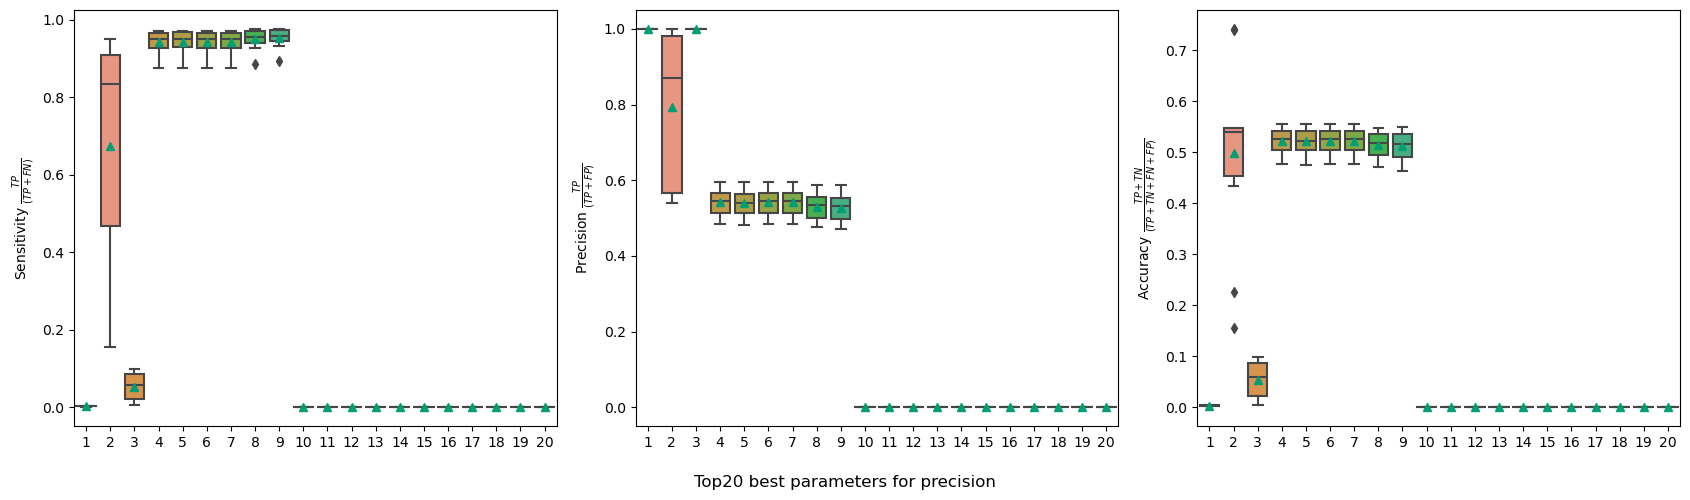

In [9]:
fig,ax = plt.subplots(1,3,figsize=(17,5))
sns.set_palette('colorblind')

sns.boxplot(data=df_best_params,x='top',y='sensitivity',showmeans=True,ax= ax[0])
sns.boxplot(data=df_best_params,x='top',y='precision',showmeans=True,ax= ax[1])
sns.boxplot(data=df_best_params,x='top',y='accuracy',showmeans=True,ax= ax[2])
ax[0].set_ylabel(r'Sensitivity $\frac{TP}{(TP+FN)}$')
ax[1].set_ylabel(r'Precision $\frac{TP}{(TP+FP)}$')
ax[2].set_ylabel(r'Accuracy $\frac{TP+TN}{(TP+TN+FN+FP)}$')
fig.supxlabel('Top20 best parameters for precision')
for ax in ax:
    ax.set_xlabel('')

plt.tight_layout()
#plt.savefig('results/plots/laptrack_top20_params.png',dpi=300)
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

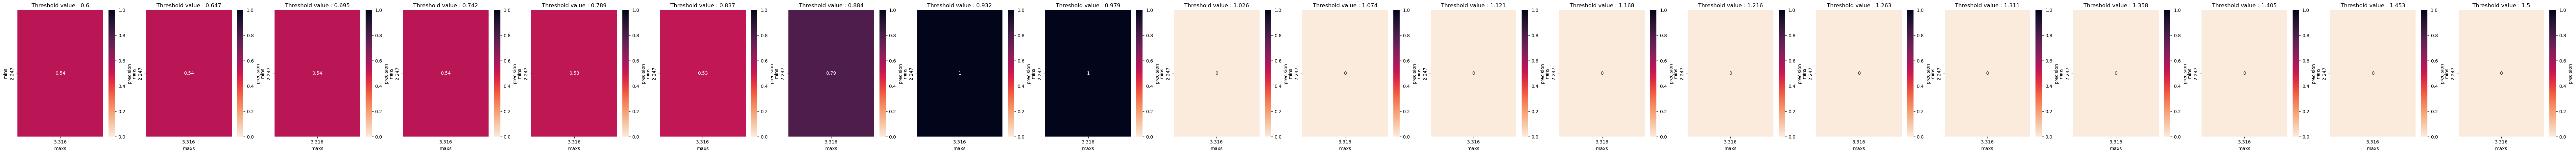

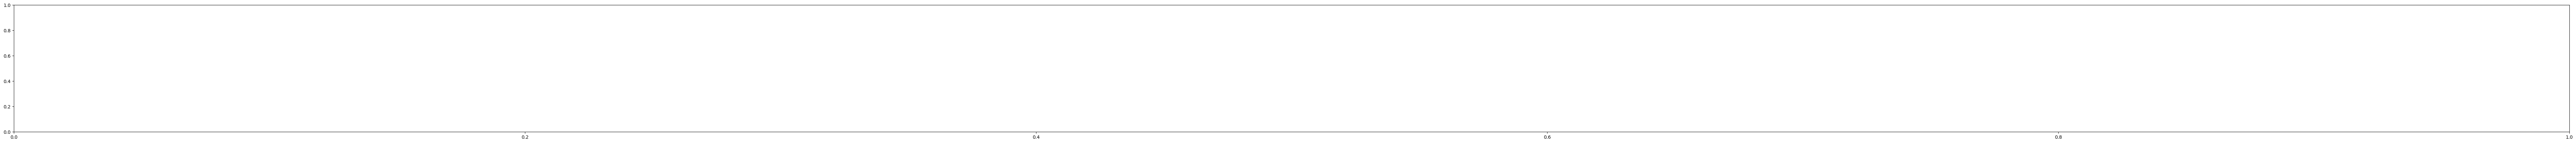

In [13]:
plot_heatmap2D(df_heat_norm_big,'precision')

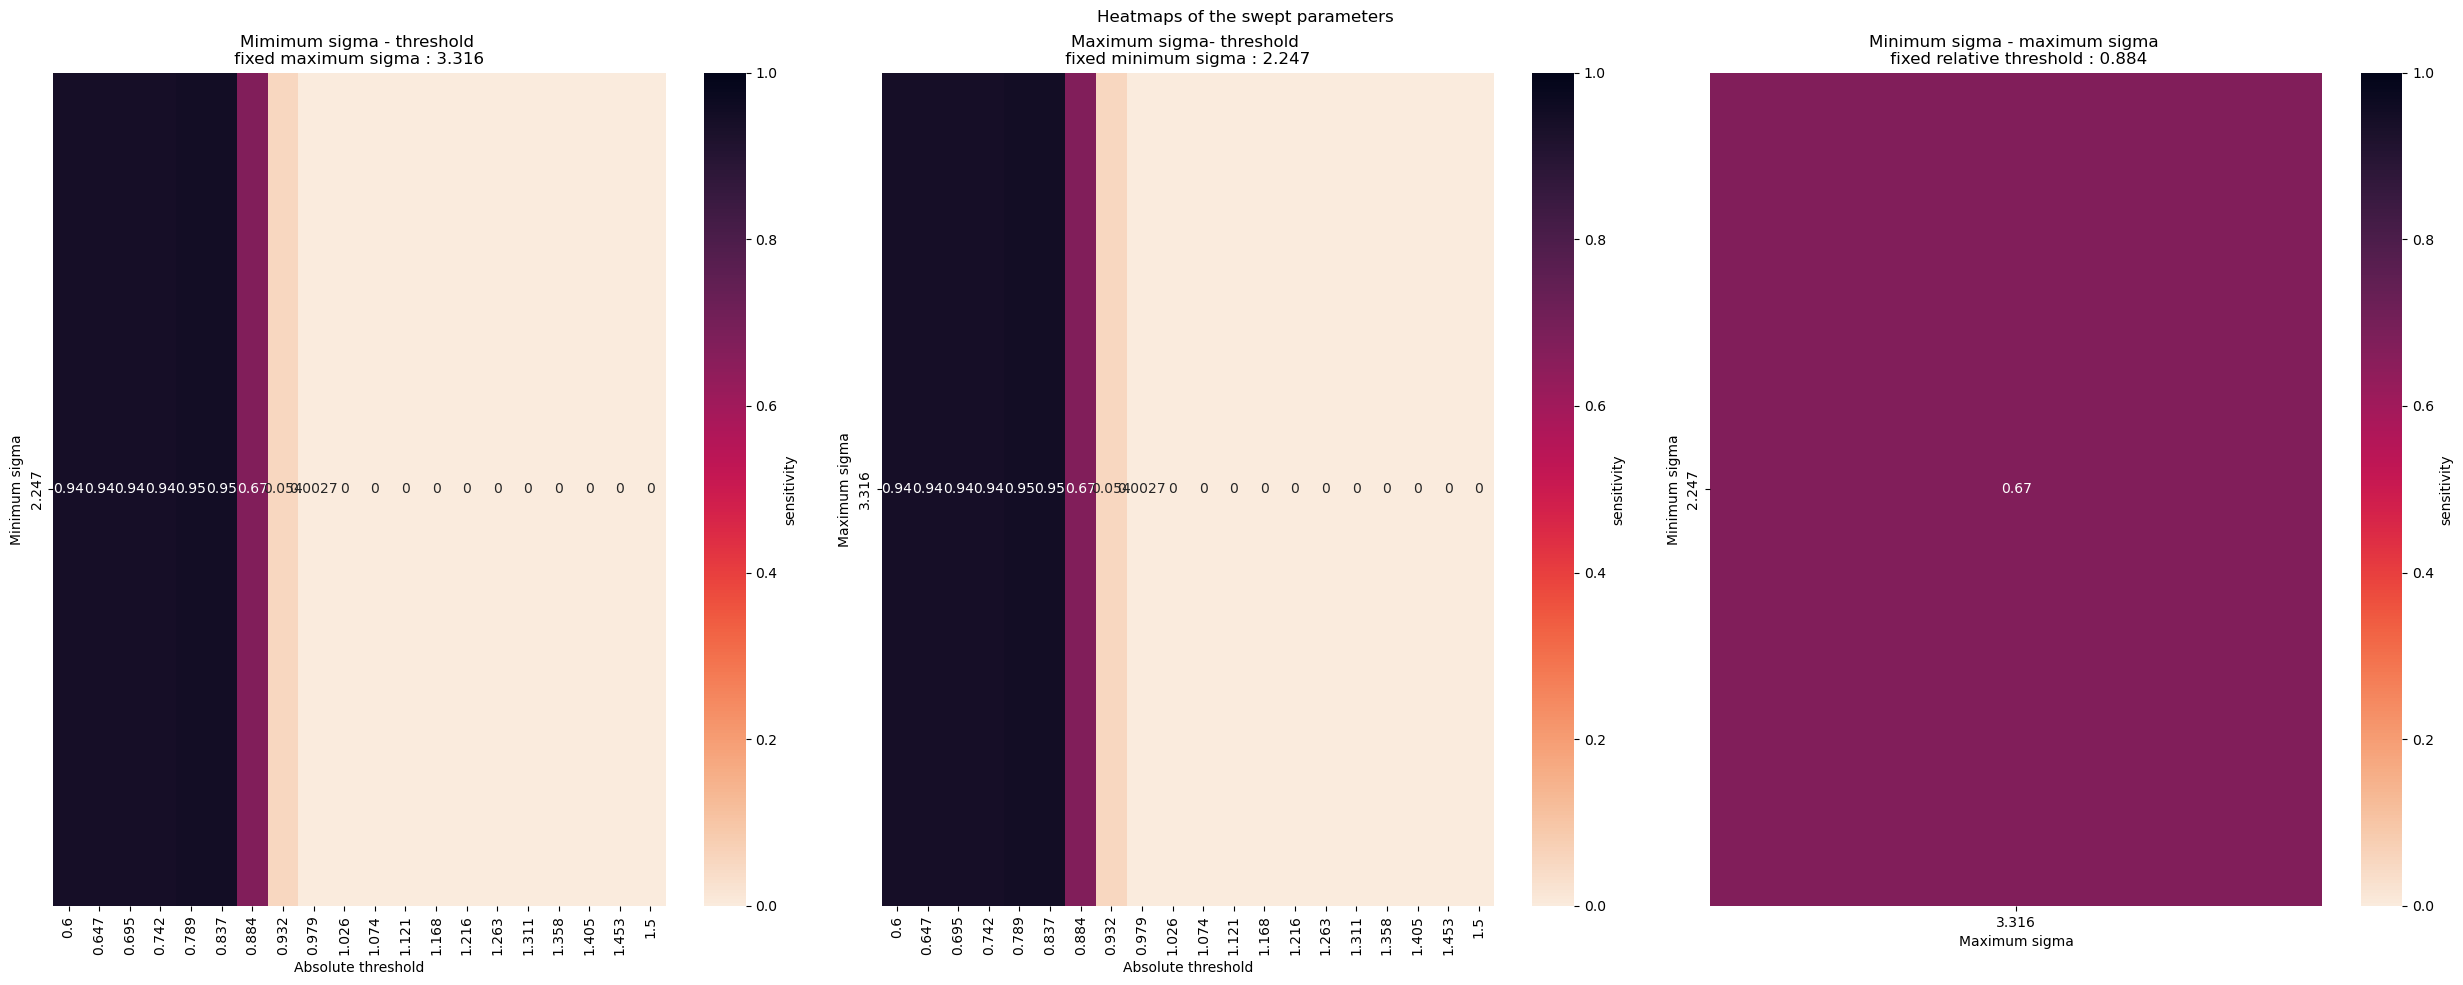

In [16]:
plot_heatmap(df_heat_norm_big,'sensitivity',best_maxs=3.316, best_mins=2.247,best_tresh=0.884)

#### F1 score:


$\frac{2* precision*sensitivity}{precision+sensitivity}$

/scratch/louaness/ipykernel_100871/9848648.py:1: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_heat_norm_big.precision.values*df_heat_norm_big.sensitivity.values)/(df_heat_norm_big.precision.values+df_heat_norm_big.sensitivity.values)))


Image  Frame  precision  negative_predicted_value  sensitivity  \
40       1      0        1.0                  0.000685     0.001370   
41       1      9        1.0                  0.000792     0.002373   
42       3      0        1.0                  0.000691     0.001381   
43       3      9        1.0                  0.000781     0.002338   
44       5      0        1.0                  0.000646     0.003222   
..     ...    ...        ...                       ...          ...   
185      5      9        0.0                  0.000000     0.000000   
186      7      0        0.0                  0.000000     0.000000   
187      7      9        0.0                  0.000000     0.000000   
188      9      0        0.0                  0.000000     0.000000   
189      9      9        0.0                  0.000000     0.000000   

     specificity  accuracy                                            param  \
40           1.0  0.002053  mins_2.24736842_maxs_3.316_threshold_0.97894737   
41           1.0  0.003162  mins_2.24736842_maxs_3.316_threshold_0.97894737   
42           1.0  0.002070  mins_2.24736842_maxs_3.316_threshold_0.97894737   
43           1.0  0.003115  mins_2.24736842_maxs_3.316_threshold_0.97894737   
44           1.0  0.003863  mins_2.24736842_maxs_3.316_threshold_0.97894737   
..           ...       ...                                              ...   
185          0.0  0.000000  mins_2.24736842_maxs_3.316_threshold_1.07368421   
186          0.0  0.000000  mins_2.24736842_maxs_3.316_threshold_1.07368421   
187          0.0  0.000000  mins_2.24736842_maxs_3.316_threshold_1.07368421   
188          0.0  0.000000  mins_2.24736842_maxs_3.316_threshold_1.07368421   
189          0.0  0.000000  mins_2.24736842_maxs_3.316_threshold_1.07368421   

      mins   maxs  threshold  ranking        f1  
40   2.247  3.316      0.979      1.0  0.002736  
41   2.247  3.316      0.979      2.0  0.004736  
42   2.247  3.316      0.979      3.0  0.002759  
43   2.247  3.316      0.979      4.0  0.004666  
44   2.247  3.316      0.979      5.0  0.006423  
..     ...    ...        ...      ...       ...  
185  2.247  3.316      1.074    196.0       NaN  
186  2.247  3.316      1.074    197.0       NaN  
187  2.247  3.316      1.074    198.0       NaN  
188  2.247  3.316      1.074    199.0       NaN  
189  2.247  3.316      1.074    200.0       NaN  

[200 rows x 13 columns]

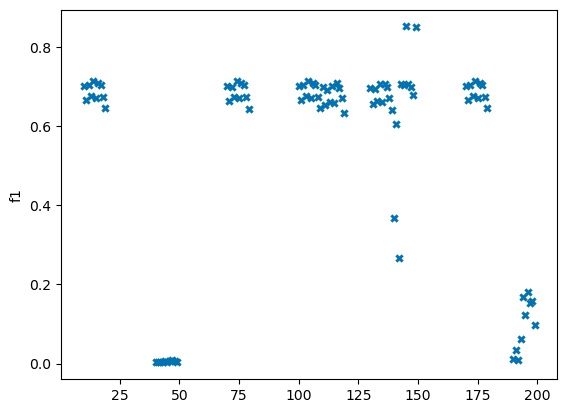

In [26]:
f1  = np.array(2*((df_heat_norm_big.precision.values*df_heat_norm_big.sensitivity.values)/(df_heat_norm_big.precision.values+df_heat_norm_big.sensitivity.values)))

df_heat_norm_big['f1'] = f1


sns.scatterplot(data=df_heat_norm_big,x=df_heat_norm_big.index.values,y="f1",marker='X',linewidth=0)

df_heat_norm_big

In [ ]:
df_heat_norm_big['ranking'] = df_heat_norm_big['f1'].rank(method='first',ascending=False)
df_heat_norm_big = df_heat_norm_big.sort_values(by='ranking')
# df_heat_norm

# Get the 4 top parameters 

param = df_heat_norm_big.iloc[0].param

best_params = [df_heat_norm_big.iloc[0].param] #list of the best params

for i in df_heat_norm_big.iloc:
    if i.param not in best_params :
        best_params.append(i.param)
        if len(best_params) > 20: # check that you only take 4
            break                                                    

df_best_params = pd.DataFrame()

for l,i in enumerate(best_params):
    df = df_heat_norm_big[df_heat_norm_big.param == i]
    df.loc[:,'top'] = l+1
    df_best_params = pd.concat([df_best_params,df])

df_best_params.reset_index(inplace=True,drop=True)
df_best_params

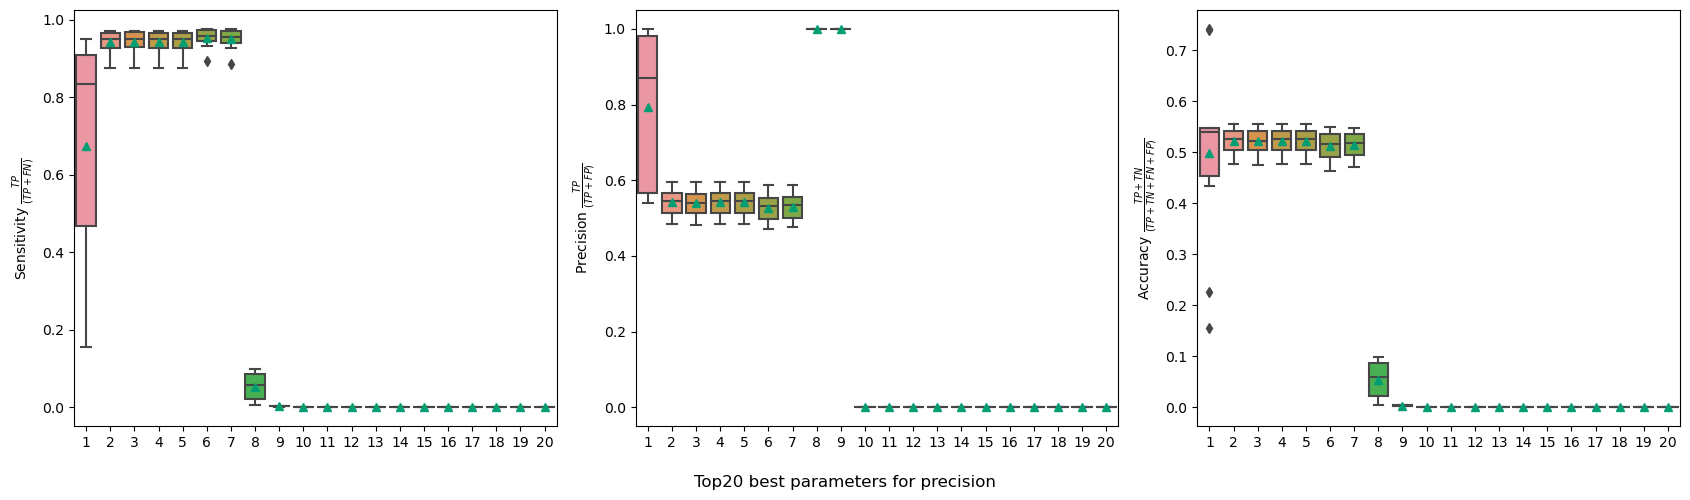

In [28]:
fig,ax = plt.subplots(1,3,figsize=(17,5))
sns.set_palette('colorblind')

sns.boxplot(data=df_best_params,x='top',y='sensitivity',showmeans=True,ax= ax[0])
sns.boxplot(data=df_best_params,x='top',y='precision',showmeans=True,ax= ax[1])
sns.boxplot(data=df_best_params,x='top',y='accuracy',showmeans=True,ax= ax[2])
ax[0].set_ylabel(r'Sensitivity $\frac{TP}{(TP+FN)}$')
ax[1].set_ylabel(r'Precision $\frac{TP}{(TP+FP)}$')
ax[2].set_ylabel(r'Accuracy $\frac{TP+TN}{(TP+TN+FN+FP)}$')
fig.supxlabel('Top20 best parameters for precision')
for ax in ax:
    ax.set_xlabel('')

plt.tight_layout()
#plt.savefig('results/plots/laptrack_top20_params.png',dpi=300)
plt.show()

In [5]:
def format_truth_table(path,n_top):

    # open the file and format 

    df_sweep = pd.read_csv(path)
    df_sweep['Unnamed: 0'] = [0,9]*int(len(df_sweep.index)/len([0,9]))
    df_sweep['Unnamed: 0.1'] = [1,1,3,3,5,5,7,7,9,9] * int(len(df_sweep.index)/len([0,0,3,3,5,5,7,7,9,9]))
    df_sweep.rename(columns={'Unnamed: 0':'Frame','Unnamed: 0.1':'Image'},inplace=True)

    df_heat = df_sweep.copy()
    for l,i in enumerate(df_heat.iloc):
        c = i.param
        df_heat.loc[l,'mins'] = round(float(re.findall(r"[-+]?\d*\.*\d+",c)[0]),3)
        df_heat.loc[l,'maxs'] = round(float(re.findall(r"[-+]?\d*\.*\d+",c)[1]),3)
        df_heat.loc[l,'threshold'] = round(float(re.findall(r"[-+]?\d*\.*\d+",c)[2]),3)

    # compute the f1 score 

    f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))

    df_heat['f1'] = f1

    #rank

    df_heat['ranking'] = df_heat['f1'].rank(method='first',ascending=False)
    df_heat = df_heat.sort_values(by='ranking')

    # df_heat_norm

    # Get the n_top top parameters 

    param = df_heat.iloc[0].param

    best_params = [df_heat.iloc[0].param] #list of the best params

    for i in df_heat.iloc:
        if i.param not in best_params :
            best_params.append(i.param)
            if len(best_params) >= n_top: # check that you only take n_top
                break                                                    

    df_best_params = pd.DataFrame()

    for l,i in enumerate(best_params):
        df = df_heat[df_heat.param == i]
        df.loc[:,'top'] = l+1
        df_best_params = pd.concat([df_best_params,df])

    df_best_params.reset_index(inplace=True,drop=True)
    df_best_params

    return df_best_params

In [77]:
df_sweep_denoised = format_truth_table('results/final/normalized/denoised_sweep/final/final_laptrack_denoised.csv',7)

/scratch/louaness/ipykernel_100871/3263702580.py:19: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))
/scratch/louaness/ipykernel_100871/3263702580.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_100871/3263702580.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_100871/

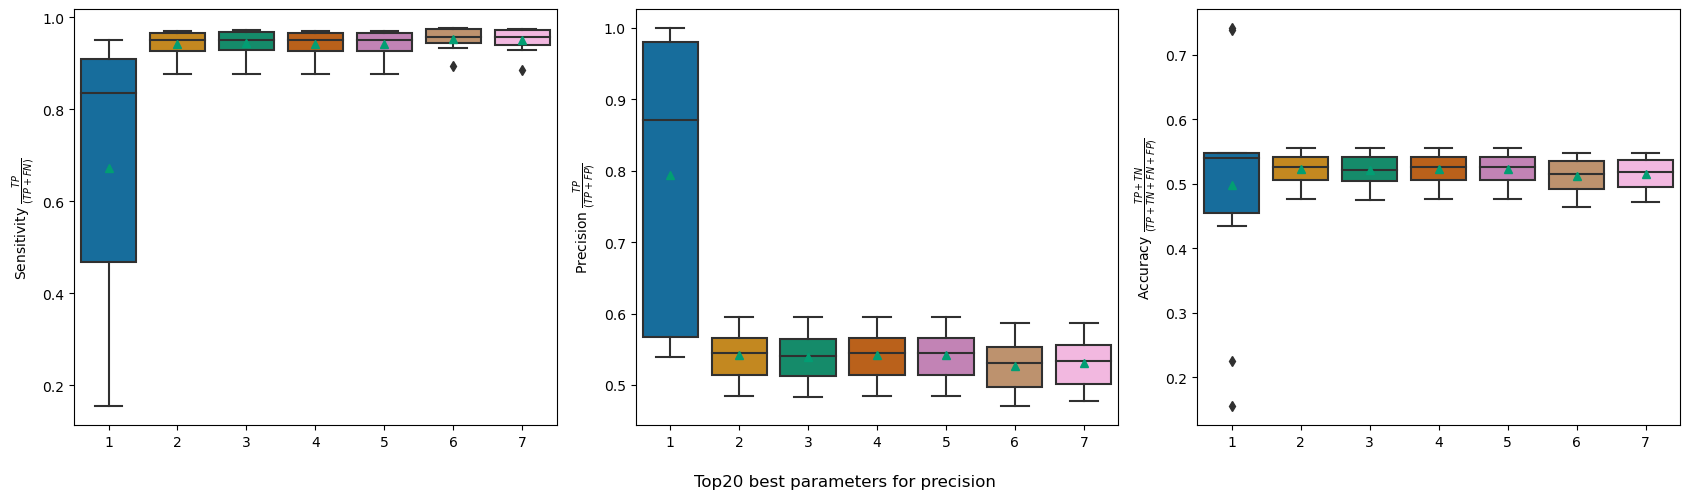

In [78]:
fig,ax = plt.subplots(1,3,figsize=(17,5))
sns.set_palette('colorblind')

sns.boxplot(data=df_sweep_denoised,x='top',y='sensitivity',showmeans=True,ax= ax[0])
sns.boxplot(data=df_sweep_denoised,x='top',y='precision',showmeans=True,ax= ax[1])
sns.boxplot(data=df_sweep_denoised,x='top',y='accuracy',showmeans=True,ax= ax[2])
ax[0].set_ylabel(r'Sensitivity $\frac{TP}{(TP+FN)}$')
ax[1].set_ylabel(r'Precision $\frac{TP}{(TP+FP)}$')
ax[2].set_ylabel(r'Accuracy $\frac{TP+TN}{(TP+TN+FN+FP)}$')
fig.supxlabel('Top20 best parameters for precision')
for ax in ax:
    ax.set_xlabel('')

plt.tight_layout()
#plt.savefig('results/plots/laptrack_top20_params.png',dpi=300)
plt.show()

In [9]:
df_sweep_clean = format_truth_table('results/final/normalized/finer_sweep/final_laptrack.csv',10)

/scratch/louaness/ipykernel_197258/3263702580.py:19: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))
/scratch/louaness/ipykernel_197258/3263702580.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_197258/3263702580.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_197258/

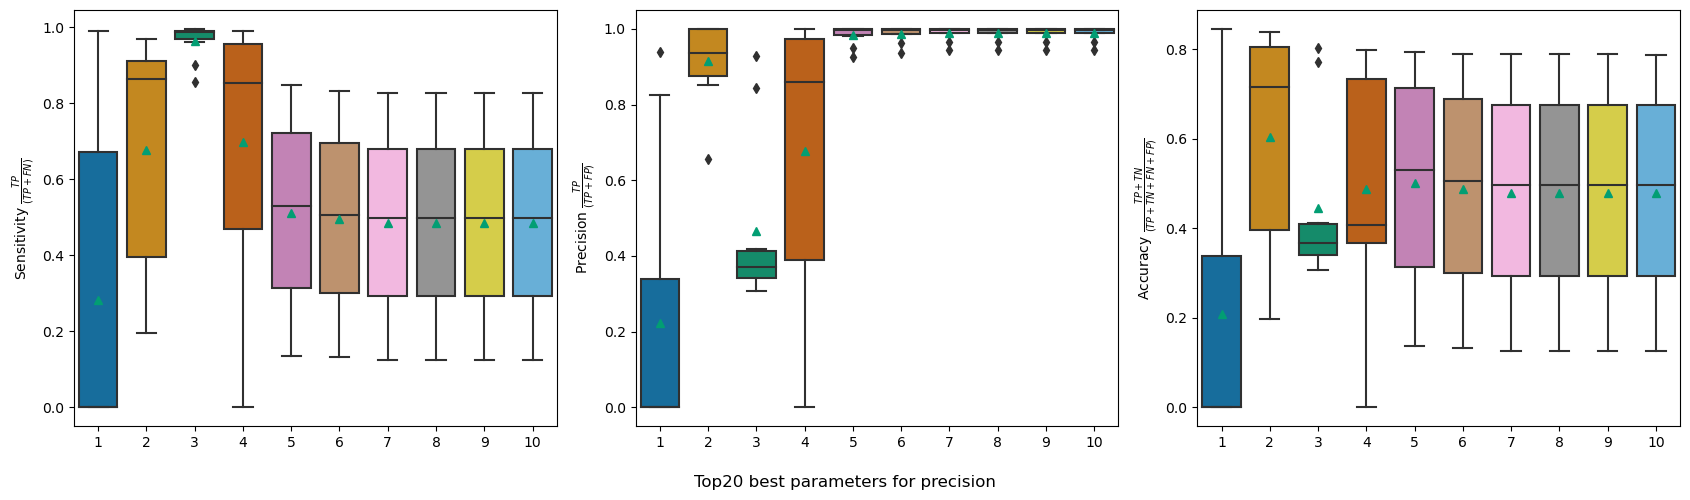

In [10]:
fig,ax = plt.subplots(1,3,figsize=(17,5))
sns.set_palette('colorblind')

sns.boxplot(data=df_sweep_clean,x='top',y='sensitivity',showmeans=True,ax= ax[0])
sns.boxplot(data=df_sweep_clean,x='top',y='precision',showmeans=True,ax= ax[1])
sns.boxplot(data=df_sweep_clean,x='top',y='accuracy',showmeans=True,ax= ax[2])
ax[0].set_ylabel(r'Sensitivity $\frac{TP}{(TP+FN)}$')
ax[1].set_ylabel(r'Precision $\frac{TP}{(TP+FP)}$')
ax[2].set_ylabel(r'Accuracy $\frac{TP+TN}{(TP+TN+FN+FP)}$')
fig.supxlabel('Top20 best parameters for precision')
for ax in ax:
    ax.set_xlabel('')

plt.tight_layout()
#plt.savefig('results/plots/laptrack_top20_params.png',dpi=300)
plt.show()

In [11]:
df_sweep_clean[df_sweep_clean.top == 2]

Image  Frame  precision  negative_predicted_value  sensitivity  \
10      5      9   0.909023                  0.008850     0.915216   
11      3      0   0.958269                  0.004785     0.856354   
12      7      0   0.912798                  0.004695     0.872825   
13      3      9   0.852063                  0.011628     0.933749   
14      9      0   0.863051                  0.007246     0.902837   
15      5      0   0.656918                  0.020833     0.969716   
16      1      0   0.997664                  0.001647     0.584932   
17      9      9   1.000000                  0.001224     0.332788   
18      7      9   1.000000                  0.000871     0.212766   
19      1      9   1.000000                  0.000983     0.196203   

    specificity  accuracy                                              param  \
10     0.008197  0.838531  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
11     0.018182  0.825682  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
12     0.007143  0.805755  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
13     0.004785  0.803619  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
14     0.004926  0.789833  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
15     0.001271  0.643865  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
16     0.333333  0.584416  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
17     1.000000  0.333333  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
18     1.000000  0.213306  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
19     1.000000  0.196838  mins_1.83684211_maxs_3.94736842_threshold_0.83...   

     mins   maxs  threshold        f1  ranking  top  
10  1.837  3.947      0.837  0.912109      2.0    2  
11  1.837  3.947      0.837  0.904449      3.0    2  
12  1.837  3.947      0.837  0.892364      4.0    2  
13  1.837  3.947      0.837  0.891038      5.0    2  
14  1.837  3.947      0.837  0.882496      9.0    2  
15  1.837  3.947      0.837  0.783242    304.0    2  
16  1.837  3.947      0.837  0.737478    545.0    2  
17  1.837  3.947      0.837  0.499387  27662.0    2  
18  1.837  3.947      0.837  0.350877  29184.0    2  
19  1.837  3.947      0.837  0.328042  29278.0    2

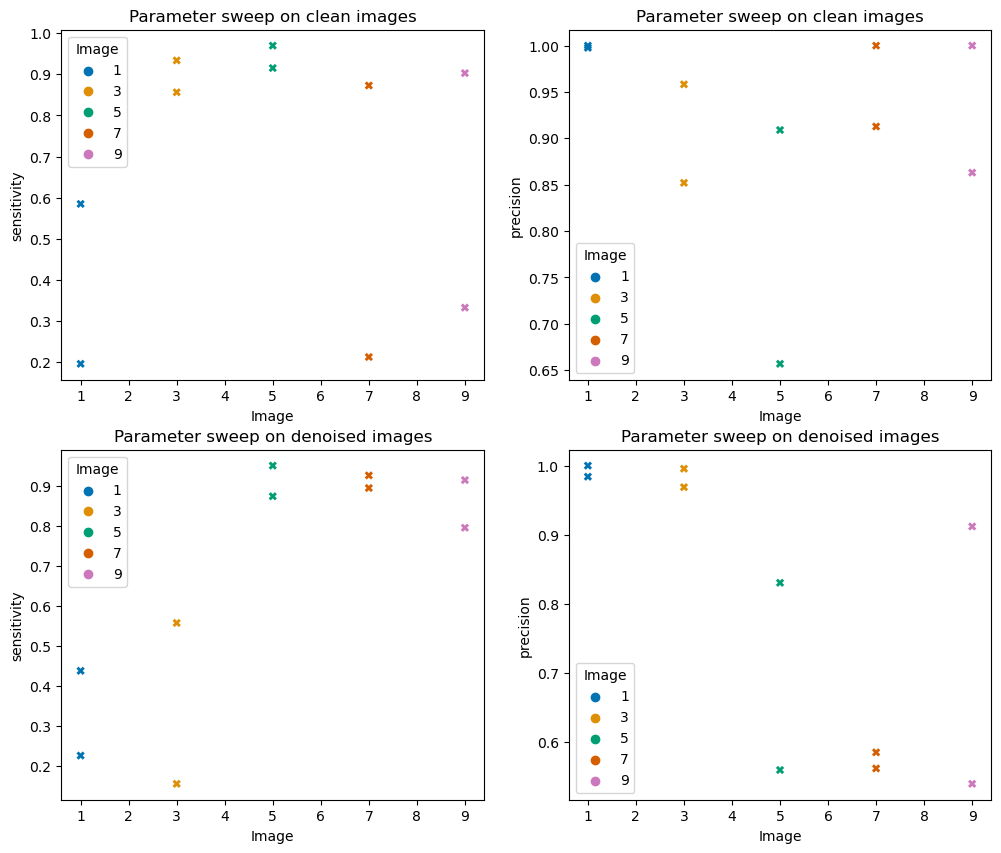

In [74]:
fig,ax = plt.subplots(2,2,figsize=(12,10))
ax = ax.flatten()

sns.scatterplot(data=df_sweep_clean[df_sweep_clean.top == 2],x='Image',y='sensitivity',marker="X",linewidth=0,ax=ax[0],hue='Image',palette='colorblind')
sns.scatterplot(data=df_sweep_clean[df_sweep_clean.top == 2],x='Image',y='precision',marker="X",linewidth=0,ax=ax[1],hue='Image',palette='colorblind')
sns.scatterplot(data=df_sweep_denoised[df_sweep_denoised.top == 1],x='Image',y='sensitivity',marker="X",linewidth=0,ax=ax[2],hue='Image',palette='colorblind')
sns.scatterplot(data=df_sweep_denoised[df_sweep_denoised.top == 1],x='Image',y='precision',marker="X",linewidth=0,ax=ax[3],hue='Image',palette='colorblind')

tit = ['Parameter sweep on clean images','Parameter sweep on clean images','Parameter sweep on denoised images','Parameter sweep on denoised images']

for l,t in enumerate(ax):
    t.set_title(tit[l])

In [95]:
df_clean_plot = df_sweep_clean[df_sweep_clean.top == 2]
df_denoised_plot = df_sweep_denoised[df_sweep_denoised.top == 1]

for i,l in zip([df_clean_plot,df_denoised_plot],['sweep on clean','sweep on denoised']):
    i['title'] = [l]*len(i.index)

df_comb = pd.concat([df_clean_plot,df_denoised_plot])

df_comb

/scratch/louaness/ipykernel_100871/1473530901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['title'] = [l]*len(i.index)
/scratch/louaness/ipykernel_100871/1473530901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['title'] = [l]*len(i.index)


Image  Frame  precision  negative_predicted_value  sensitivity  \
10      5      9   0.909023                  0.008850     0.915216   
11      3      0   0.958269                  0.004785     0.856354   
12      7      0   0.912798                  0.004695     0.872825   
13      3      9   0.852063                  0.011628     0.933749   
14      9      0   0.863051                  0.007246     0.902837   
15      5      0   0.656918                  0.020833     0.969716   
16      1      0   0.997664                  0.001647     0.584932   
17      9      9   1.000000                  0.001224     0.332788   
18      7      9   1.000000                  0.000871     0.212766   
19      1      9   1.000000                  0.000983     0.196203   
0       5      9   0.830338                  0.005988     0.874338   
1       9      9   0.911903                  0.003984     0.795585   
2       3      9   0.968835                  0.001757     0.557288   
3       7      0   0.584869                  0.005682     0.895021   
4       5      0   0.559303                  0.012987     0.951031   
5       7      9   0.561564                  0.009259     0.926561   
6       9      0   0.539298                  0.008264     0.914894   
7       1      9   0.983986                  0.001404     0.437500   
8       1      0   1.000000                  0.000883     0.225342   
9       3      0   0.995556                  0.000816     0.154696   

    specificity  accuracy                                              param  \
10     0.008197  0.838531  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
11     0.018182  0.825682  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
12     0.007143  0.805755  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
13     0.004785  0.803619  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
14     0.004926  0.789833  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
15     0.001271  0.643865  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
16     0.333333  0.584416  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
17     1.000000  0.333333  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
18     1.000000  0.213306  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
19     1.000000  0.196838  mins_1.83684211_maxs_3.94736842_threshold_0.83...   
0      0.004219  0.741977    mins_2.24736842_maxs_3.316_threshold_0.88421053   
1      0.010526  0.738998    mins_2.24736842_maxs_3.316_threshold_0.88421053   
2      0.041667  0.547819    mins_2.24736842_maxs_3.316_threshold_0.88421053   
3      0.000943  0.547488    mins_2.24736842_maxs_3.316_threshold_0.88421053   
4      0.000859  0.543814    mins_2.24736842_maxs_3.316_threshold_0.88421053   
5      0.000948  0.537818    mins_2.24736842_maxs_3.316_threshold_0.88421053   
6      0.000907  0.513729    mins_2.24736842_maxs_3.316_threshold_0.88421053   
7      0.100000  0.434851    mins_2.24736842_maxs_3.316_threshold_0.88421053   
8      1.000000  0.225873    mins_2.24736842_maxs_3.316_threshold_0.88421053   
9      0.500000  0.155172    mins_2.24736842_maxs_3.316_threshold_0.88421053   

     mins   maxs  threshold        f1  ranking  top              title  
10  1.837  3.947      0.837  0.912109      2.0    2     sweep on clean  
11  1.837  3.947      0.837  0.904449      3.0    2     sweep on clean  
12  1.837  3.947      0.837  0.892364      4.0    2     sweep on clean  
13  1.837  3.947      0.837  0.891038      5.0    2     sweep on clean  
14  1.837  3.947      0.837  0.882496      9.0    2     sweep on clean  
15  1.837  3.947      0.837  0.783242    304.0    2     sweep on clean  
16  1.837  3.947      0.837  0.737478    545.0    2     sweep on clean  
17  1.837  3.947      0.837  0.499387  27662.0    2     sweep on clean  
18  1.837  3.947      0.837  0.350877  29184.0    2     sweep on clean  
19  1.837  3.947      0.837  0.328042  29278.0    2     sweep on clean  
0   2.247  3.316      0.884  0.851770      1.0   

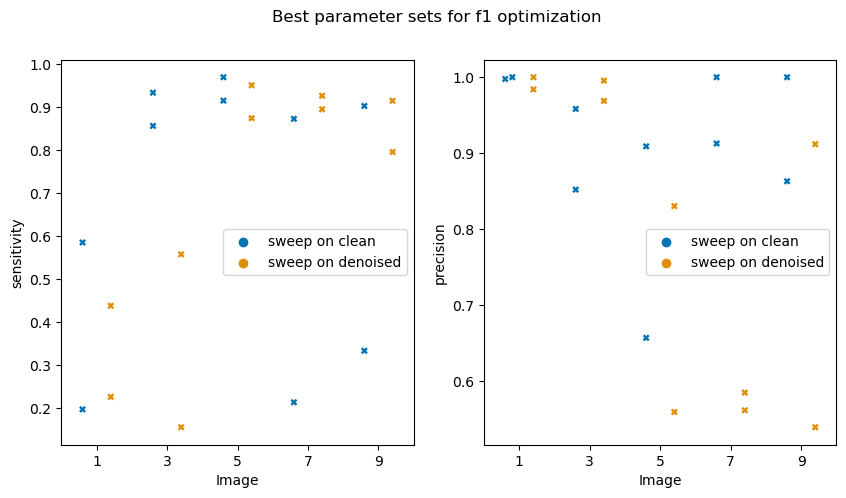

In [97]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

sns.swarmplot(data=df_comb,x='Image',y='sensitivity',marker="X",linewidth=0,ax=ax[0],hue='title',palette='colorblind',dodge=True)
sns.swarmplot(data=df_comb,x='Image',y='precision',marker="X",linewidth=0,ax=ax[1],hue='title',palette='colorblind',dodge=True)



for l,t in enumerate(ax):
    t.legend(title='')

fig.suptitle('Best parameter sets for f1 optimization')
# plt.savefig('results/plots/best_params_clean_denoised.png',dpi=300)
plt.show()

In [7]:
df_sweep_denoised_large = format_truth_table('results/final/normalized/denoised_sweep/large_sweep/final/final_laptrack_denoised.csv',10)

/scratch/louaness/ipykernel_209732/3263702580.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_209732/3263702580.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_209732/3263702580.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [8]:
df_sweep_denoised_large

Image  Frame  precision  negative_predicted_value  sensitivity  \
0       5      0   0.919366                  0.003623     0.822809   
1       5      9   0.904523                  0.004132     0.817562   
2       7      9   0.963066                  0.002410     0.715854   
3       7      0   0.981559                  0.002012     0.702460   
4       9      0   0.990398                  0.001451     0.512057   
..    ...    ...        ...                       ...          ...   
95      7      0   0.588120                  0.005780     0.896821   
96      3      9   0.974563                  0.001490     0.477786   
97      1      9   0.987755                  0.001280     0.382911   
98      1      0   1.000000                  0.000845     0.189726   
99      3      0   1.000000                  0.000793     0.129834   

    specificity  accuracy                                            param  \
0      0.008850  0.767568  mins_2.11052632_maxs_3.73684211_threshold_0.884   
1      0.008696  0.752786  mins_2.11052632_maxs_3.73684211_threshold_0.884   
2      0.024390  0.696929  mins_2.11052632_maxs_3.73684211_threshold_0.884   
3      0.043478  0.693491  mins_2.11052632_maxs_3.73684211_threshold_0.884   
4      0.125000  0.509873  mins_2.11052632_maxs_3.73684211_threshold_0.884   
..          ...       ...                                              ...   
95     0.000954  0.551013         mins_2.17894737_maxs_3.0_threshold_0.884   
96     0.058824  0.472308         mins_2.17894737_maxs_3.0_threshold_0.884   
97     0.142857  0.381589         mins_2.17894737_maxs_3.0_threshold_0.884   
98     1.000000  0.190281         mins_2.17894737_maxs_3.0_threshold_0.884   
99     1.000000  0.130435         mins_2.17894737_maxs_3.0_threshold_0.884   

     mins   maxs  threshold        f1  ranking  top  
0   2.111  3.737      0.884  0.868412      1.0    1  
1   2.111  3.737      0.884  0.858847     13.0    1  
2   2.111  3.737      0.884  0.821260    107.0    1  
3   2.111  3.737      0.884  0.818881    122.0    1  
4   2.111  3.737      0.884  0.675082   2158.0    1  
..    ...    ...        ...       ...      ...  ...  
95  2.179  3.000      0.884  0.710383   1329.0   10  
96  2.179  3.000      0.884  0.641213   2607.0   10  
97  2.179  3.000      0.884  0.551881   3285.0   10  
98  2.179  3.000      0.884  0.318941   3798.0   10  
99  2.179  3.000      0.884  0.229829   3871.0   10  

[100 rows x 14 columns]

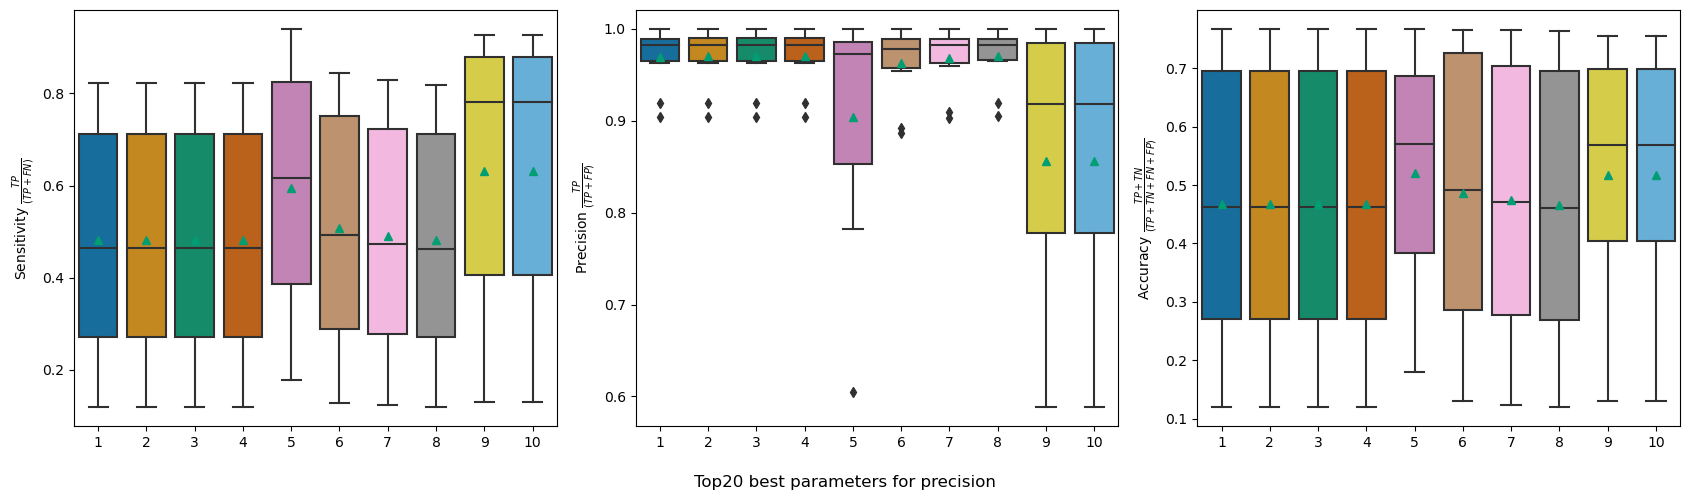

In [10]:
fig,ax = plt.subplots(1,3,figsize=(17,5))
sns.set_palette('colorblind')

sns.boxplot(data=df_sweep_denoised_large,x='top',y='sensitivity',showmeans=True,ax= ax[0])
sns.boxplot(data=df_sweep_denoised_large,x='top',y='precision',showmeans=True,ax= ax[1])
sns.boxplot(data=df_sweep_denoised_large,x='top',y='accuracy',showmeans=True,ax= ax[2])
ax[0].set_ylabel(r'Sensitivity $\frac{TP}{(TP+FN)}$')
ax[1].set_ylabel(r'Precision $\frac{TP}{(TP+FP)}$')
ax[2].set_ylabel(r'Accuracy $\frac{TP+TN}{(TP+TN+FN+FP)}$')
fig.supxlabel('Top20 best parameters for precision')
for ax in ax:
    ax.set_xlabel('')

plt.tight_layout()
#plt.savefig('results/plots/laptrack_top20_params.png',dpi=300)
plt.show()

In [11]:
df_sweep_noisy = format_truth_table('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_spot_detection/results/final/normalized/noisy_sweep/final_laptrack_noisy.csv',10)

/scratch/louaness/ipykernel_209732/3263702580.py:19: RuntimeWarning: invalid value encountered in divide
  f1  = np.array(2*((df_heat.precision.values*df_heat.sensitivity.values)/(df_heat.precision.values+df_heat.sensitivity.values)))
/scratch/louaness/ipykernel_209732/3263702580.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_209732/3263702580.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'top'] = l+1
/scratch/louaness/ipykernel_209732/

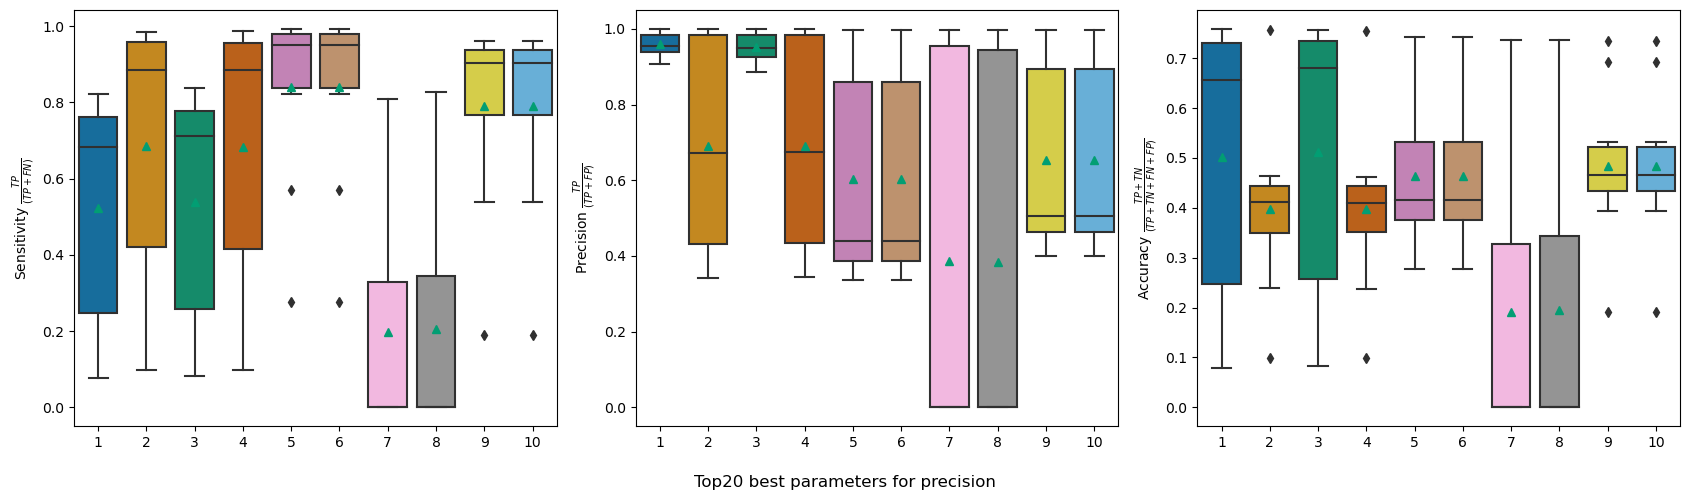

In [12]:
fig,ax = plt.subplots(1,3,figsize=(17,5))
sns.set_palette('colorblind')

sns.boxplot(data=df_sweep_noisy,x='top',y='sensitivity',showmeans=True,ax= ax[0])
sns.boxplot(data=df_sweep_noisy,x='top',y='precision',showmeans=True,ax= ax[1])
sns.boxplot(data=df_sweep_noisy,x='top',y='accuracy',showmeans=True,ax= ax[2])
ax[0].set_ylabel(r'Sensitivity $\frac{TP}{(TP+FN)}$')
ax[1].set_ylabel(r'Precision $\frac{TP}{(TP+FP)}$')
ax[2].set_ylabel(r'Accuracy $\frac{TP+TN}{(TP+TN+FN+FP)}$')
fig.supxlabel('Top20 best parameters for precision')
for ax in ax:
    ax.set_xlabel('')

plt.tight_layout()
#plt.savefig('results/plots/laptrack_top20_params.png',dpi=300)
plt.show()

In [13]:
df_sweep_noisy

Image  Frame  precision  negative_predicted_value  sensitivity  \
0       5      0   0.907539                  0.003610     0.822165   
1       9      0   0.936508                  0.003448     0.795035   
2       7      0   0.943959                  0.002695     0.778044   
3       7      9   0.959297                  0.002375     0.711736   
4       5      9   0.935419                  0.002532     0.701741   
..    ...    ...        ...                       ...          ...   
95      7      9   0.470669                  0.010638     0.936170   
96      5      9   0.459313                  0.019231     0.961393   
97      9      0   0.444217                  0.009174     0.923404   
98      9      9   0.399251                  0.019608     0.959117   
99      3      0   0.996377                  0.000852     0.189917   

    specificity  accuracy                                            param  \
0      0.007634  0.758764         mins_1.97368421_maxs_3.0_threshold_0.884   
1      0.012987  0.754539         mins_1.97368421_maxs_3.0_threshold_0.884   
2      0.012821  0.743840         mins_1.97368421_maxs_3.0_threshold_0.884   
3      0.022222  0.691079         mins_1.97368421_maxs_3.0_threshold_0.884   
4      0.015385  0.669553         mins_1.97368421_maxs_3.0_threshold_0.884   
..          ...       ...                                              ...   
95     0.000651  0.456217  mins_2.52105263_maxs_3.21052632_threshold_0.884   
96     0.000668  0.451189  mins_2.52105263_maxs_3.21052632_threshold_0.884   
97     0.000613  0.428618  mins_2.52105263_maxs_3.21052632_threshold_0.884   
98     0.000566  0.392774  mins_2.52105263_maxs_3.21052632_threshold_0.884   
99     0.500000  0.190345  mins_2.52105263_maxs_3.21052632_threshold_0.884   

     mins   maxs  threshold        f1  ranking  top  
0   1.974  3.000      0.884  0.862745      1.0    1  
1   1.974  3.000      0.884  0.859992      4.0    1  
2   1.974  3.000      0.884  0.853009      7.0    1  
3   1.974  3.000      0.884  0.817179     44.0    1  
4   1.974  3.000      0.884  0.801903     55.0    1  
..    ...    ...        ...       ...      ...  ...  
95  2.521  3.211      0.884  0.626406   2561.0   10  
96  2.521  3.211      0.884  0.621635   2646.0   10  
97  2.521  3.211      0.884  0.599862   2992.0   10  
98  2.521  3.211      0.884  0.563807   3360.0   10  
99  2.521  3.211      0.884  0.319026   3867.0   10  

[100 rows x 14 columns]